# Susceptibility to substitution

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
BIN_COUNT = 4

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from progressbar import ProgressBar
from statsmodels.stats.proportion import multinomial_proportions_confint

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope, stopwords
engine = init_db()

## 2 Susceptibility in absolute and sentence-relative values

Build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        # Prepare these arrays for stopword-checking.
        dslice = slice(substitution.start,
                       substitution.start + len(substitution.destination.tokens))
        lemmas = substitution.source.lemmas[dslice]
        tokens = substitution.source.tokens[dslice]
        tags = substitution.source.tags[dslice]
        
        for feature in Substitution.__features__:
            sentence_values, _ = substitution.source_destination_features(feature)
            sentence_values_rel, _ = substitution.source_destination_features(
                feature, sentence_relative='median')
            source_type, _ = Substitution.__features__[feature]
            # Stopword-check the arrays.
            words = getattr(substitution.source, source_type)[dslice]
            for i, (word, lemma, token, tag) in enumerate(zip(words, lemmas, tokens, tags)):
                if (token in stopwords) or (lemma in stopwords):
                    # Drop stopwords from this analysis since we exclude stopword-substitutions.
                    continue
                data.append({'cluster_id': substitution.source.cluster.sid,
                             'destination_id': substitution.destination.sid,
                             'occurrence': substitution.occurrence,
                             'source_id': substitution.source.sid,
                             'feature': feature,
                             'word': word,
                             'POS': tag,
                             'target': i == substitution.position,
                             'value': sentence_values[i],
                             'value_rel': sentence_values_rel[i]})

original_susties = pd.DataFrame(data)
del data

Got 72339 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=1)


  0% (    1 of 72339) |           | Elapsed Time: 0:00:04 ETA:  3 days, 15:21:41

  0% (  103 of 72339) |                    | Elapsed Time: 0:00:05 ETA:  0:11:44

  0% (  192 of 72339) |                    | Elapsed Time: 0:00:06 ETA:  0:12:32

  0% (  249 of 72339) |                    | Elapsed Time: 0:00:07 ETA:  0:14:31

  0% (  340 of 72339) |                    | Elapsed Time: 0:00:08 ETA:  0:14:09

  0% (  431 of 72339) |                    | Elapsed Time: 0:00:09 ETA:  0:13:55

  0% (  523 of 72339) |                    | Elapsed Time: 0:00:10 ETA:  0:13:45

  0% (  619 of 72339) |                    | Elapsed Time: 0:00:11 ETA:  0:13:32

  0% (  712 of 72339) |                    | Elapsed Time: 0:00:12 ETA:  0:13:26

  1% (  809 of 72339) |                    | Elapsed Time: 0:00:13 ETA:  0:13:16

  1% (  905 of 72339) |                    | Elapsed Time: 0:00:14 ETA:  0:13:17

  1% ( 1001 of 72339) |                    | Elapsed Time: 0:00:15 ETA:  0:13:09

  1% ( 1098 of 72339) |                    | Elapsed Time: 0:00:16 ETA:  0:12:30

  1% ( 1190 of 72339) |                    | Elapsed Time: 0:00:17 ETA:  0:12:27

  1% ( 1281 of 72339) |                    | Elapsed Time: 0:00:18 ETA:  0:12:27

  1% ( 1385 of 72339) |                    | Elapsed Time: 0:00:19 ETA:  0:12:15

  2% ( 1472 of 72339) |                    | Elapsed Time: 0:00:20 ETA:  0:12:23

  2% ( 1584 of 72339) |                    | Elapsed Time: 0:00:21 ETA:  0:12:06

  2% ( 1689 of 72339) |                    | Elapsed Time: 0:00:22 ETA:  0:11:58

  2% ( 1783 of 72339) |                    | Elapsed Time: 0:00:23 ETA:  0:12:03

  2% ( 1809 of 72339) |                    | Elapsed Time: 0:00:23 ETA:  0:12:01

  2% ( 1909 of 72339) |                    | Elapsed Time: 0:00:24 ETA:  0:11:57

  2% ( 2005 of 72339) |                    | Elapsed Time: 0:00:25 ETA:  0:11:52

  2% ( 2102 of 72339) |                    | Elapsed Time: 0:00:26 ETA:  0:11:45

  3% ( 2199 of 72339) |                    | Elapsed Time: 0:00:27 ETA:  0:11:50

  3% ( 2293 of 72339) |                    | Elapsed Time: 0:00:28 ETA:  0:11:41

  3% ( 2349 of 72339) |                    | Elapsed Time: 0:00:29 ETA:  0:12:34

  3% ( 2445 of 72339) |                    | Elapsed Time: 0:00:30 ETA:  0:12:42

  3% ( 2544 of 72339) |                    | Elapsed Time: 0:00:31 ETA:  0:12:37

  3% ( 2641 of 72339) |                    | Elapsed Time: 0:00:32 ETA:  0:12:32

  3% ( 2713 of 72339) |                    | Elapsed Time: 0:00:33 ETA:  0:12:36

  3% ( 2810 of 72339) |                    | Elapsed Time: 0:00:34 ETA:  0:12:35

  4% ( 2895 of 72339) |                    | Elapsed Time: 0:00:35 ETA:  0:12:46

  4% ( 2971 of 72339) |                    | Elapsed Time: 0:00:36 ETA:  0:13:07

  4% ( 3056 of 72339) |                    | Elapsed Time: 0:00:37 ETA:  0:13:15

  4% ( 3136 of 72339) |                    | Elapsed Time: 0:00:38 ETA:  0:12:50

  4% ( 3223 of 72339) |                    | Elapsed Time: 0:00:39 ETA:  0:12:58

  4% ( 3315 of 72339) |                    | Elapsed Time: 0:00:40 ETA:  0:13:04

  4% ( 3403 of 72339) |                    | Elapsed Time: 0:00:41 ETA:  0:13:13

  4% ( 3499 of 72339) |                    | Elapsed Time: 0:00:42 ETA:  0:13:10

  4% ( 3593 of 72339) |                    | Elapsed Time: 0:00:43 ETA:  0:13:12

  5% ( 3617 of 72339) |#                   | Elapsed Time: 0:00:43 ETA:  0:13:05

  5% ( 3722 of 72339) |#                   | Elapsed Time: 0:00:44 ETA:  0:12:33

  5% ( 3816 of 72339) |#                   | Elapsed Time: 0:00:45 ETA:  0:12:23

  5% ( 3912 of 72339) |#                   | Elapsed Time: 0:00:46 ETA:  0:12:04

  5% ( 4006 of 72339) |#                   | Elapsed Time: 0:00:47 ETA:  0:11:56

  5% ( 4105 of 72339) |#                   | Elapsed Time: 0:00:48 ETA:  0:11:49

  5% ( 4201 of 72339) |#                   | Elapsed Time: 0:00:49 ETA:  0:11:40

  5% ( 4296 of 72339) |#                   | Elapsed Time: 0:00:50 ETA:  0:11:40

  6% ( 4389 of 72339) |#                   | Elapsed Time: 0:00:51 ETA:  0:11:39

  6% ( 4489 of 72339) |#                   | Elapsed Time: 0:00:52 ETA:  0:11:37

  6% ( 4522 of 72339) |#                   | Elapsed Time: 0:00:53 ETA:  0:11:43

  6% ( 4615 of 72339) |#                   | Elapsed Time: 0:00:54 ETA:  0:11:44

  6% ( 4707 of 72339) |#                   | Elapsed Time: 0:00:55 ETA:  0:11:47

  6% ( 4801 of 72339) |#                   | Elapsed Time: 0:00:56 ETA:  0:11:45

  6% ( 4854 of 72339) |#                   | Elapsed Time: 0:00:57 ETA:  0:12:31

  6% ( 4948 of 72339) |#                   | Elapsed Time: 0:00:58 ETA:  0:12:32

  6% ( 5049 of 72339) |#                   | Elapsed Time: 0:00:59 ETA:  0:12:26

  7% ( 5147 of 72339) |#                   | Elapsed Time: 0:01:00 ETA:  0:12:19

  7% ( 5254 of 72339) |#                   | Elapsed Time: 0:01:01 ETA:  0:12:12

  7% ( 5355 of 72339) |#                   | Elapsed Time: 0:01:02 ETA:  0:12:04

  7% ( 5426 of 72339) |#                   | Elapsed Time: 0:01:03 ETA:  0:12:35

  7% ( 5492 of 72339) |#                   | Elapsed Time: 0:01:04 ETA:  0:13:08

  7% ( 5558 of 72339) |#                   | Elapsed Time: 0:01:05 ETA:  0:12:52

  7% ( 5622 of 72339) |#                   | Elapsed Time: 0:01:06 ETA:  0:13:29

  7% ( 5690 of 72339) |#                   | Elapsed Time: 0:01:07 ETA:  0:14:14

  7% ( 5756 of 72339) |#                   | Elapsed Time: 0:01:08 ETA:  0:15:01

  8% ( 5856 of 72339) |#                   | Elapsed Time: 0:01:09 ETA:  0:15:11

  8% ( 5937 of 72339) |#                   | Elapsed Time: 0:01:10 ETA:  0:15:42

  8% ( 6025 of 72339) |#                   | Elapsed Time: 0:01:11 ETA:  0:15:04

  8% ( 6110 of 72339) |#                   | Elapsed Time: 0:01:12 ETA:  0:14:48

  8% ( 6210 of 72339) |#                   | Elapsed Time: 0:01:13 ETA:  0:14:01

  8% ( 6306 of 72339) |#                   | Elapsed Time: 0:01:14 ETA:  0:13:23

  8% ( 6330 of 72339) |#                   | Elapsed Time: 0:01:14 ETA:  0:12:56

  8% ( 6421 of 72339) |#                   | Elapsed Time: 0:01:15 ETA:  0:12:28

  9% ( 6512 of 72339) |#                   | Elapsed Time: 0:01:16 ETA:  0:12:00

  9% ( 6602 of 72339) |#                   | Elapsed Time: 0:01:17 ETA:  0:12:09

  9% ( 6690 of 72339) |#                   | Elapsed Time: 0:01:18 ETA:  0:12:01

  9% ( 6782 of 72339) |#                   | Elapsed Time: 0:01:19 ETA:  0:11:55

  9% ( 6849 of 72339) |#                   | Elapsed Time: 0:01:20 ETA:  0:12:13

  9% ( 6938 of 72339) |#                   | Elapsed Time: 0:01:21 ETA:  0:12:24

  9% ( 7047 of 72339) |#                   | Elapsed Time: 0:01:22 ETA:  0:12:08

  9% ( 7155 of 72339) |#                   | Elapsed Time: 0:01:23 ETA:  0:11:50

 10% ( 7234 of 72339) |##                  | Elapsed Time: 0:01:24 ETA:  0:11:55

 10% ( 7318 of 72339) |##                  | Elapsed Time: 0:01:25 ETA:  0:12:01

 10% ( 7409 of 72339) |##                  | Elapsed Time: 0:01:26 ETA:  0:11:59

 10% ( 7498 of 72339) |##                  | Elapsed Time: 0:01:27 ETA:  0:11:57

 10% ( 7594 of 72339) |##                  | Elapsed Time: 0:01:28 ETA:  0:11:53

 10% ( 7671 of 72339) |##                  | Elapsed Time: 0:01:30 ETA:  0:12:12

 10% ( 7764 of 72339) |##                  | Elapsed Time: 0:01:31 ETA:  0:12:07

 10% ( 7857 of 72339) |##                  | Elapsed Time: 0:01:32 ETA:  0:12:22

 10% ( 7952 of 72339) |##                  | Elapsed Time: 0:01:33 ETA:  0:12:35

 11% ( 8048 of 72339) |##                  | Elapsed Time: 0:01:34 ETA:  0:12:21

 11% ( 8139 of 72339) |##                  | Elapsed Time: 0:01:35 ETA:  0:12:17

 11% ( 8225 of 72339) |##                  | Elapsed Time: 0:01:36 ETA:  0:12:20

 11% ( 8321 of 72339) |##                  | Elapsed Time: 0:01:37 ETA:  0:12:19

 11% ( 8415 of 72339) |##                  | Elapsed Time: 0:01:38 ETA:  0:11:24

 11% ( 8512 of 72339) |##                  | Elapsed Time: 0:01:39 ETA:  0:11:19

 11% ( 8609 of 72339) |##                  | Elapsed Time: 0:01:40 ETA:  0:11:14

 12% ( 8705 of 72339) |##                  | Elapsed Time: 0:01:41 ETA:  0:11:12

 12% ( 8797 of 72339) |##                  | Elapsed Time: 0:01:42 ETA:  0:11:16

 12% ( 8889 of 72339) |##                  | Elapsed Time: 0:01:43 ETA:  0:11:13

 12% ( 8978 of 72339) |##                  | Elapsed Time: 0:01:44 ETA:  0:11:16

 12% ( 9043 of 72339) |##                  | Elapsed Time: 0:01:44 ETA:  0:11:07

 12% ( 9135 of 72339) |##                  | Elapsed Time: 0:01:45 ETA:  0:11:10

 12% ( 9234 of 72339) |##                  | Elapsed Time: 0:01:46 ETA:  0:11:05

 12% ( 9335 of 72339) |##                  | Elapsed Time: 0:01:47 ETA:  0:11:00

 13% ( 9435 of 72339) |##                  | Elapsed Time: 0:01:48 ETA:  0:10:56

 13% ( 9539 of 72339) |##                  | Elapsed Time: 0:01:49 ETA:  0:10:48

 13% ( 9648 of 72339) |##                  | Elapsed Time: 0:01:50 ETA:  0:10:31

 13% ( 9750 of 72339) |##                  | Elapsed Time: 0:01:51 ETA:  0:10:21

 13% ( 9849 of 72339) |##                  | Elapsed Time: 0:01:52 ETA:  0:10:11

 13% ( 9947 of 72339) |##                  | Elapsed Time: 0:01:53 ETA:  0:10:09

 13% (10048 of 72339) |##                  | Elapsed Time: 0:01:54 ETA:  0:10:01

 14% (10157 of 72339) |##                  | Elapsed Time: 0:01:55 ETA:  0:09:52

 14% (10266 of 72339) |##                  | Elapsed Time: 0:01:56 ETA:  0:09:45

 14% (10375 of 72339) |##                  | Elapsed Time: 0:01:57 ETA:  0:09:37

 14% (10480 of 72339) |##                  | Elapsed Time: 0:01:58 ETA:  0:09:35

 14% (10575 of 72339) |##                  | Elapsed Time: 0:01:59 ETA:  0:09:45

 14% (10669 of 72339) |##                  | Elapsed Time: 0:02:00 ETA:  0:09:50

 14% (10761 of 72339) |##                  | Elapsed Time: 0:02:01 ETA:  0:09:54

 15% (10851 of 72339) |###                 | Elapsed Time: 0:02:02 ETA:  0:09:55

 15% (10946 of 72339) |###                 | Elapsed Time: 0:02:03 ETA:  0:09:59

 15% (11040 of 72339) |###                 | Elapsed Time: 0:02:04 ETA:  0:10:10

 15% (11136 of 72339) |###                 | Elapsed Time: 0:02:05 ETA:  0:10:20

 15% (11231 of 72339) |###                 | Elapsed Time: 0:02:06 ETA:  0:10:31

 15% (11324 of 72339) |###                 | Elapsed Time: 0:02:07 ETA:  0:10:41

 15% (11416 of 72339) |###                 | Elapsed Time: 0:02:08 ETA:  0:10:42

 15% (11517 of 72339) |###                 | Elapsed Time: 0:02:09 ETA:  0:10:35

 16% (11586 of 72339) |###                 | Elapsed Time: 0:02:11 ETA:  0:11:23

 16% (11682 of 72339) |###                 | Elapsed Time: 0:02:12 ETA:  0:11:22

 16% (11756 of 72339) |###                 | Elapsed Time: 0:02:12 ETA:  0:11:16

 16% (11854 of 72339) |###                 | Elapsed Time: 0:02:13 ETA:  0:11:11

 16% (11954 of 72339) |###                 | Elapsed Time: 0:02:14 ETA:  0:11:06

 16% (12052 of 72339) |###                 | Elapsed Time: 0:02:15 ETA:  0:11:02

 16% (12153 of 72339) |###                 | Elapsed Time: 0:02:16 ETA:  0:10:53

 16% (12253 of 72339) |###                 | Elapsed Time: 0:02:17 ETA:  0:10:45

 17% (12350 of 72339) |###                 | Elapsed Time: 0:02:18 ETA:  0:10:48

 17% (12454 of 72339) |###                 | Elapsed Time: 0:02:19 ETA:  0:09:48

 17% (12557 of 72339) |###                 | Elapsed Time: 0:02:20 ETA:  0:09:42

 17% (12660 of 72339) |###                 | Elapsed Time: 0:02:21 ETA:  0:09:42

 17% (12764 of 72339) |###                 | Elapsed Time: 0:02:22 ETA:  0:09:39

 17% (12865 of 72339) |###                 | Elapsed Time: 0:02:23 ETA:  0:09:36

 17% (12968 of 72339) |###                 | Elapsed Time: 0:02:25 ETA:  0:09:33

 18% (13070 of 72339) |###                 | Elapsed Time: 0:02:26 ETA:  0:09:30

 18% (13173 of 72339) |###                 | Elapsed Time: 0:02:27 ETA:  0:09:24

 18% (13269 of 72339) |###                 | Elapsed Time: 0:02:28 ETA:  0:09:29

 18% (13361 of 72339) |###                 | Elapsed Time: 0:02:29 ETA:  0:09:38

 18% (13451 of 72339) |###                 | Elapsed Time: 0:02:30 ETA:  0:09:45

 18% (13544 of 72339) |###                 | Elapsed Time: 0:02:31 ETA:  0:09:49

 18% (13564 of 72339) |###                 | Elapsed Time: 0:02:31 ETA:  0:09:57

 18% (13658 of 72339) |###                 | Elapsed Time: 0:02:32 ETA:  0:10:02

 19% (13751 of 72339) |###                 | Elapsed Time: 0:02:33 ETA:  0:10:10

 19% (13846 of 72339) |###                 | Elapsed Time: 0:02:34 ETA:  0:10:16

 19% (13947 of 72339) |###                 | Elapsed Time: 0:02:35 ETA:  0:10:17

 19% (14047 of 72339) |###                 | Elapsed Time: 0:02:36 ETA:  0:10:13

 19% (14152 of 72339) |###                 | Elapsed Time: 0:02:37 ETA:  0:09:59

 19% (14258 of 72339) |###                 | Elapsed Time: 0:02:38 ETA:  0:09:43

 19% (14357 of 72339) |###                 | Elapsed Time: 0:02:39 ETA:  0:09:36

 19% (14450 of 72339) |###                 | Elapsed Time: 0:02:40 ETA:  0:09:37

 20% (14468 of 72339) |####                | Elapsed Time: 0:02:40 ETA:  0:09:36

 20% (14560 of 72339) |####                | Elapsed Time: 0:02:41 ETA:  0:09:36

 20% (14657 of 72339) |####                | Elapsed Time: 0:02:42 ETA:  0:09:34

 20% (14753 of 72339) |####                | Elapsed Time: 0:02:43 ETA:  0:09:37

 20% (14844 of 72339) |####                | Elapsed Time: 0:02:44 ETA:  0:09:45

 20% (14940 of 72339) |####                | Elapsed Time: 0:02:45 ETA:  0:09:52

 20% (15038 of 72339) |####                | Elapsed Time: 0:02:46 ETA:  0:09:59

 20% (15139 of 72339) |####                | Elapsed Time: 0:02:47 ETA:  0:09:56

 21% (15235 of 72339) |####                | Elapsed Time: 0:02:48 ETA:  0:09:52

 21% (15327 of 72339) |####                | Elapsed Time: 0:02:49 ETA:  0:09:51

 21% (15373 of 72339) |####                | Elapsed Time: 0:02:50 ETA:  0:09:47

 21% (15475 of 72339) |####                | Elapsed Time: 0:02:51 ETA:  0:09:40

 21% (15571 of 72339) |####                | Elapsed Time: 0:02:52 ETA:  0:09:39

 21% (15673 of 72339) |####                | Elapsed Time: 0:02:53 ETA:  0:09:28

 21% (15775 of 72339) |####                | Elapsed Time: 0:02:54 ETA:  0:09:22

 21% (15845 of 72339) |####                | Elapsed Time: 0:02:55 ETA:  0:09:47

 22% (15924 of 72339) |####                | Elapsed Time: 0:02:56 ETA:  0:10:07

 22% (15998 of 72339) |####                | Elapsed Time: 0:02:57 ETA:  0:10:29

 22% (16076 of 72339) |####                | Elapsed Time: 0:02:58 ETA:  0:10:42

 22% (16147 of 72339) |####                | Elapsed Time: 0:02:59 ETA:  0:11:06

 22% (16221 of 72339) |####                | Elapsed Time: 0:03:00 ETA:  0:11:37

 22% (16277 of 72339) |####                | Elapsed Time: 0:03:00 ETA:  0:12:06

 22% (16353 of 72339) |####                | Elapsed Time: 0:03:01 ETA:  0:12:40

 22% (16367 of 72339) |####                | Elapsed Time: 0:03:02 ETA:  0:14:58

 22% (16442 of 72339) |####                | Elapsed Time: 0:03:03 ETA:  0:14:48

 22% (16513 of 72339) |####                | Elapsed Time: 0:03:04 ETA:  0:15:03

 22% (16586 of 72339) |####                | Elapsed Time: 0:03:05 ETA:  0:15:05

 23% (16661 of 72339) |####                | Elapsed Time: 0:03:06 ETA:  0:15:11

 23% (16734 of 72339) |####                | Elapsed Time: 0:03:07 ETA:  0:15:05

 23% (16823 of 72339) |####                | Elapsed Time: 0:03:08 ETA:  0:14:38

 23% (16908 of 72339) |####                | Elapsed Time: 0:03:09 ETA:  0:14:10

 23% (17006 of 72339) |####                | Elapsed Time: 0:03:10 ETA:  0:13:34

 23% (17098 of 72339) |####                | Elapsed Time: 0:03:11 ETA:  0:11:45

 23% (17181 of 72339) |####                | Elapsed Time: 0:03:12 ETA:  0:11:21

 23% (17275 of 72339) |####                | Elapsed Time: 0:03:13 ETA:  0:10:53

 24% (17369 of 72339) |####                | Elapsed Time: 0:03:14 ETA:  0:10:28

 24% (17462 of 72339) |####                | Elapsed Time: 0:03:15 ETA:  0:10:07

 24% (17558 of 72339) |####                | Elapsed Time: 0:03:16 ETA:  0:09:43

 24% (17655 of 72339) |####                | Elapsed Time: 0:03:17 ETA:  0:09:34

 24% (17752 of 72339) |####                | Elapsed Time: 0:03:18 ETA:  0:09:22

 24% (17846 of 72339) |####                | Elapsed Time: 0:03:19 ETA:  0:09:24

 24% (17941 of 72339) |####                | Elapsed Time: 0:03:20 ETA:  0:09:21

 24% (18040 of 72339) |####                | Elapsed Time: 0:03:21 ETA:  0:09:18

 25% (18085 of 72339) |#####               | Elapsed Time: 0:03:22 ETA:  0:09:15

 25% (18184 of 72339) |#####               | Elapsed Time: 0:03:23 ETA:  0:09:10

 25% (18274 of 72339) |#####               | Elapsed Time: 0:03:24 ETA:  0:09:12

 25% (18360 of 72339) |#####               | Elapsed Time: 0:03:25 ETA:  0:09:21

 25% (18450 of 72339) |#####               | Elapsed Time: 0:03:26 ETA:  0:09:27

 25% (18541 of 72339) |#####               | Elapsed Time: 0:03:27 ETA:  0:09:33

 25% (18625 of 72339) |#####               | Elapsed Time: 0:03:28 ETA:  0:09:42

 25% (18717 of 72339) |#####               | Elapsed Time: 0:03:29 ETA:  0:09:45

 26% (18821 of 72339) |#####               | Elapsed Time: 0:03:30 ETA:  0:09:38

 26% (18905 of 72339) |#####               | Elapsed Time: 0:03:31 ETA:  0:09:47

 26% (18989 of 72339) |#####               | Elapsed Time: 0:03:32 ETA:  0:09:41

 26% (19093 of 72339) |#####               | Elapsed Time: 0:03:33 ETA:  0:09:26

 26% (19197 of 72339) |#####               | Elapsed Time: 0:03:34 ETA:  0:09:08

 26% (19292 of 72339) |#####               | Elapsed Time: 0:03:35 ETA:  0:09:03

 26% (19376 of 72339) |#####               | Elapsed Time: 0:03:36 ETA:  0:09:08

 26% (19466 of 72339) |#####               | Elapsed Time: 0:03:37 ETA:  0:09:02

 27% (19550 of 72339) |#####               | Elapsed Time: 0:03:38 ETA:  0:09:08

 27% (19653 of 72339) |#####               | Elapsed Time: 0:03:39 ETA:  0:09:08

 27% (19748 of 72339) |#####               | Elapsed Time: 0:03:40 ETA:  0:08:57

 27% (19845 of 72339) |#####               | Elapsed Time: 0:03:41 ETA:  0:09:04

 27% (19894 of 72339) |#####               | Elapsed Time: 0:03:41 ETA:  0:09:20

 27% (19975 of 72339) |#####               | Elapsed Time: 0:03:42 ETA:  0:09:43

 27% (20062 of 72339) |#####               | Elapsed Time: 0:03:43 ETA:  0:09:49

 27% (20167 of 72339) |#####               | Elapsed Time: 0:03:44 ETA:  0:09:26

 28% (20265 of 72339) |#####               | Elapsed Time: 0:03:45 ETA:  0:09:17

 28% (20364 of 72339) |#####               | Elapsed Time: 0:03:46 ETA:  0:09:01

 28% (20455 of 72339) |#####               | Elapsed Time: 0:03:47 ETA:  0:09:12

 28% (20544 of 72339) |#####               | Elapsed Time: 0:03:48 ETA:  0:09:16

 28% (20623 of 72339) |#####               | Elapsed Time: 0:03:49 ETA:  0:09:32

 28% (20718 of 72339) |#####               | Elapsed Time: 0:03:50 ETA:  0:09:22

 28% (20798 of 72339) |#####               | Elapsed Time: 0:03:51 ETA:  0:09:09

 28% (20898 of 72339) |#####               | Elapsed Time: 0:03:52 ETA:  0:08:56

 29% (20981 of 72339) |#####               | Elapsed Time: 0:03:53 ETA:  0:09:16

 29% (21065 of 72339) |#####               | Elapsed Time: 0:03:54 ETA:  0:09:29

 29% (21155 of 72339) |#####               | Elapsed Time: 0:03:55 ETA:  0:09:38

 29% (21230 of 72339) |#####               | Elapsed Time: 0:03:56 ETA:  0:09:54

 29% (21320 of 72339) |#####               | Elapsed Time: 0:03:57 ETA:  0:09:52

 29% (21409 of 72339) |#####               | Elapsed Time: 0:03:58 ETA:  0:09:40

 29% (21513 of 72339) |#####               | Elapsed Time: 0:03:59 ETA:  0:09:30

 29% (21618 of 72339) |#####               | Elapsed Time: 0:04:00 ETA:  0:09:16

 30% (21702 of 72339) |######              | Elapsed Time: 0:04:02 ETA:  0:10:33

 30% (21802 of 72339) |######              | Elapsed Time: 0:04:03 ETA:  0:10:13

 30% (21909 of 72339) |######              | Elapsed Time: 0:04:04 ETA:  0:09:52

 30% (22020 of 72339) |######              | Elapsed Time: 0:04:05 ETA:  0:09:13

 30% (22123 of 72339) |######              | Elapsed Time: 0:04:06 ETA:  0:08:58

 30% (22213 of 72339) |######              | Elapsed Time: 0:04:07 ETA:  0:08:56

 30% (22303 of 72339) |######              | Elapsed Time: 0:04:08 ETA:  0:09:10

 30% (22398 of 72339) |######              | Elapsed Time: 0:04:09 ETA:  0:09:20

 31% (22493 of 72339) |######              | Elapsed Time: 0:04:10 ETA:  0:08:03

 31% (22586 of 72339) |######              | Elapsed Time: 0:04:11 ETA:  0:08:08

 31% (22606 of 72339) |######              | Elapsed Time: 0:04:11 ETA:  0:08:12

 31% (22696 of 72339) |######              | Elapsed Time: 0:04:12 ETA:  0:08:28

 31% (22788 of 72339) |######              | Elapsed Time: 0:04:13 ETA:  0:08:46

 31% (22866 of 72339) |######              | Elapsed Time: 0:04:14 ETA:  0:09:12

 31% (22949 of 72339) |######              | Elapsed Time: 0:04:15 ETA:  0:09:19

 31% (23039 of 72339) |######              | Elapsed Time: 0:04:16 ETA:  0:09:17

 31% (23126 of 72339) |######              | Elapsed Time: 0:04:17 ETA:  0:09:25

 32% (23224 of 72339) |######              | Elapsed Time: 0:04:18 ETA:  0:09:20

 32% (23319 of 72339) |######              | Elapsed Time: 0:04:19 ETA:  0:09:17

 32% (23425 of 72339) |######              | Elapsed Time: 0:04:20 ETA:  0:08:58

 32% (23511 of 72339) |######              | Elapsed Time: 0:04:21 ETA:  0:08:45

 32% (23587 of 72339) |######              | Elapsed Time: 0:04:22 ETA:  0:09:01

 32% (23667 of 72339) |######              | Elapsed Time: 0:04:23 ETA:  0:08:58

 32% (23762 of 72339) |######              | Elapsed Time: 0:04:24 ETA:  0:08:45

 32% (23857 of 72339) |######              | Elapsed Time: 0:04:25 ETA:  0:08:40

 33% (23953 of 72339) |######              | Elapsed Time: 0:04:26 ETA:  0:08:30

 33% (24055 of 72339) |######              | Elapsed Time: 0:04:27 ETA:  0:08:25

 33% (24148 of 72339) |######              | Elapsed Time: 0:04:28 ETA:  0:08:25

 33% (24239 of 72339) |######              | Elapsed Time: 0:04:29 ETA:  0:08:38

 33% (24324 of 72339) |######              | Elapsed Time: 0:04:30 ETA:  0:08:54

 33% (24415 of 72339) |######              | Elapsed Time: 0:04:31 ETA:  0:08:27

 33% (24517 of 72339) |######              | Elapsed Time: 0:04:32 ETA:  0:08:06

 34% (24628 of 72339) |######              | Elapsed Time: 0:04:33 ETA:  0:07:50

 34% (24738 of 72339) |######              | Elapsed Time: 0:04:34 ETA:  0:07:36

 34% (24848 of 72339) |######              | Elapsed Time: 0:04:35 ETA:  0:07:25

 34% (24957 of 72339) |######              | Elapsed Time: 0:04:36 ETA:  0:07:18

 34% (25056 of 72339) |######              | Elapsed Time: 0:04:37 ETA:  0:07:13

 34% (25168 of 72339) |######              | Elapsed Time: 0:04:38 ETA:  0:06:55

 34% (25262 of 72339) |######              | Elapsed Time: 0:04:39 ETA:  0:06:48

 35% (25319 of 72339) |#######             | Elapsed Time: 0:04:40 ETA:  0:07:02

 35% (25388 of 72339) |#######             | Elapsed Time: 0:04:41 ETA:  0:07:29

 35% (25471 of 72339) |#######             | Elapsed Time: 0:04:42 ETA:  0:07:53

 35% (25554 of 72339) |#######             | Elapsed Time: 0:04:43 ETA:  0:08:17

 35% (25628 of 72339) |#######             | Elapsed Time: 0:04:44 ETA:  0:08:51

 35% (25700 of 72339) |#######             | Elapsed Time: 0:04:45 ETA:  0:09:31

 35% (25784 of 72339) |#######             | Elapsed Time: 0:04:46 ETA:  0:09:48

 35% (25882 of 72339) |#######             | Elapsed Time: 0:04:47 ETA:  0:10:05

 35% (25981 of 72339) |#######             | Elapsed Time: 0:04:48 ETA:  0:09:58

 36% (26078 of 72339) |#######             | Elapsed Time: 0:04:49 ETA:  0:09:34

 36% (26158 of 72339) |#######             | Elapsed Time: 0:04:50 ETA:  0:09:20

 36% (26223 of 72339) |#######             | Elapsed Time: 0:04:51 ETA:  0:09:13

 36% (26312 of 72339) |#######             | Elapsed Time: 0:04:52 ETA:  0:09:05

 36% (26383 of 72339) |#######             | Elapsed Time: 0:04:53 ETA:  0:09:08

 36% (26458 of 72339) |#######             | Elapsed Time: 0:04:54 ETA:  0:09:05

 36% (26549 of 72339) |#######             | Elapsed Time: 0:04:55 ETA:  0:08:55

 36% (26643 of 72339) |#######             | Elapsed Time: 0:04:56 ETA:  0:08:58

 36% (26728 of 72339) |#######             | Elapsed Time: 0:04:57 ETA:  0:09:14

 37% (26815 of 72339) |#######             | Elapsed Time: 0:04:58 ETA:  0:09:24

 37% (26902 of 72339) |#######             | Elapsed Time: 0:04:59 ETA:  0:09:15

 37% (26996 of 72339) |#######             | Elapsed Time: 0:05:00 ETA:  0:09:07

 37% (27085 of 72339) |#######             | Elapsed Time: 0:05:01 ETA:  0:09:06

 37% (27128 of 72339) |#######             | Elapsed Time: 0:05:01 ETA:  0:08:57

 37% (27214 of 72339) |#######             | Elapsed Time: 0:05:02 ETA:  0:08:44

 37% (27281 of 72339) |#######             | Elapsed Time: 0:05:03 ETA:  0:09:10

 37% (27346 of 72339) |#######             | Elapsed Time: 0:05:04 ETA:  0:09:44

 37% (27409 of 72339) |#######             | Elapsed Time: 0:05:05 ETA:  0:10:12

 37% (27474 of 72339) |#######             | Elapsed Time: 0:05:06 ETA:  0:10:41

 38% (27574 of 72339) |#######             | Elapsed Time: 0:05:07 ETA:  0:10:23

 38% (27675 of 72339) |#######             | Elapsed Time: 0:05:08 ETA:  0:10:12

 38% (27785 of 72339) |#######             | Elapsed Time: 0:05:09 ETA:  0:09:44

 38% (27877 of 72339) |#######             | Elapsed Time: 0:05:10 ETA:  0:09:24

 38% (27962 of 72339) |#######             | Elapsed Time: 0:05:11 ETA:  0:09:24

 38% (28032 of 72339) |#######             | Elapsed Time: 0:05:12 ETA:  0:08:57

 38% (28076 of 72339) |#######             | Elapsed Time: 0:05:14 ETA:  0:10:19

 38% (28159 of 72339) |#######             | Elapsed Time: 0:05:15 ETA:  0:09:53

 39% (28257 of 72339) |#######             | Elapsed Time: 0:05:16 ETA:  0:09:13

 39% (28355 of 72339) |#######             | Elapsed Time: 0:05:17 ETA:  0:09:14

 39% (28458 of 72339) |#######             | Elapsed Time: 0:05:18 ETA:  0:09:11

 39% (28558 of 72339) |#######             | Elapsed Time: 0:05:19 ETA:  0:09:21

 39% (28661 of 72339) |#######             | Elapsed Time: 0:05:20 ETA:  0:09:07

 39% (28763 of 72339) |#######             | Elapsed Time: 0:05:21 ETA:  0:08:47

 39% (28865 of 72339) |#######             | Elapsed Time: 0:05:22 ETA:  0:08:34

 40% (28936 of 72339) |########            | Elapsed Time: 0:05:23 ETA:  0:06:51

 40% (29020 of 72339) |########            | Elapsed Time: 0:05:24 ETA:  0:06:50

 40% (29111 of 72339) |########            | Elapsed Time: 0:05:25 ETA:  0:06:54

 40% (29202 of 72339) |########            | Elapsed Time: 0:05:26 ETA:  0:07:00

 40% (29291 of 72339) |########            | Elapsed Time: 0:05:27 ETA:  0:07:12

 40% (29371 of 72339) |########            | Elapsed Time: 0:05:28 ETA:  0:07:29

 40% (29465 of 72339) |########            | Elapsed Time: 0:05:29 ETA:  0:07:38

 40% (29569 of 72339) |########            | Elapsed Time: 0:05:30 ETA:  0:07:35

 41% (29665 of 72339) |########            | Elapsed Time: 0:05:31 ETA:  0:07:41

 41% (29758 of 72339) |########            | Elapsed Time: 0:05:32 ETA:  0:07:45

 41% (29840 of 72339) |########            | Elapsed Time: 0:05:33 ETA:  0:07:42

 41% (29928 of 72339) |########            | Elapsed Time: 0:05:34 ETA:  0:07:45

 41% (30014 of 72339) |########            | Elapsed Time: 0:05:35 ETA:  0:07:48

 41% (30100 of 72339) |########            | Elapsed Time: 0:05:36 ETA:  0:07:50

 41% (30190 of 72339) |########            | Elapsed Time: 0:05:37 ETA:  0:07:39

 41% (30305 of 72339) |########            | Elapsed Time: 0:05:38 ETA:  0:07:18

 42% (30415 of 72339) |########            | Elapsed Time: 0:05:39 ETA:  0:07:12

 42% (30533 of 72339) |########            | Elapsed Time: 0:05:40 ETA:  0:06:51

 42% (30636 of 72339) |########            | Elapsed Time: 0:05:41 ETA:  0:06:41

 42% (30745 of 72339) |########            | Elapsed Time: 0:05:42 ETA:  0:06:12

 42% (30850 of 72339) |########            | Elapsed Time: 0:05:43 ETA:  0:05:56

 42% (30952 of 72339) |########            | Elapsed Time: 0:05:44 ETA:  0:05:42

 42% (31020 of 72339) |########            | Elapsed Time: 0:05:45 ETA:  0:05:59

 42% (31104 of 72339) |########            | Elapsed Time: 0:05:46 ETA:  0:06:26

 43% (31188 of 72339) |########            | Elapsed Time: 0:05:47 ETA:  0:06:50

 43% (31274 of 72339) |########            | Elapsed Time: 0:05:48 ETA:  0:07:21

 43% (31350 of 72339) |########            | Elapsed Time: 0:05:49 ETA:  0:07:50

 43% (31463 of 72339) |########            | Elapsed Time: 0:05:50 ETA:  0:07:42

 43% (31563 of 72339) |########            | Elapsed Time: 0:05:51 ETA:  0:07:31

 43% (31649 of 72339) |########            | Elapsed Time: 0:05:52 ETA:  0:07:31

 43% (31747 of 72339) |########            | Elapsed Time: 0:05:53 ETA:  0:07:34

 44% (31854 of 72339) |########            | Elapsed Time: 0:05:54 ETA:  0:06:55

 44% (31954 of 72339) |########            | Elapsed Time: 0:05:55 ETA:  0:06:39

 44% (32054 of 72339) |########            | Elapsed Time: 0:05:56 ETA:  0:06:23

 44% (32140 of 72339) |########            | Elapsed Time: 0:05:57 ETA:  0:06:23

 44% (32239 of 72339) |########            | Elapsed Time: 0:05:58 ETA:  0:06:03

 44% (32340 of 72339) |########            | Elapsed Time: 0:05:59 ETA:  0:06:10

 44% (32435 of 72339) |########            | Elapsed Time: 0:06:00 ETA:  0:06:13

 45% (32553 of 72339) |#########           | Elapsed Time: 0:06:01 ETA:  0:06:06

 45% (32649 of 72339) |#########           | Elapsed Time: 0:06:02 ETA:  0:06:15

 45% (32744 of 72339) |#########           | Elapsed Time: 0:06:03 ETA:  0:06:19

 45% (32848 of 72339) |#########           | Elapsed Time: 0:06:04 ETA:  0:06:14

 45% (32943 of 72339) |#########           | Elapsed Time: 0:06:05 ETA:  0:06:04

 45% (33032 of 72339) |#########           | Elapsed Time: 0:06:06 ETA:  0:06:13

 45% (33106 of 72339) |#########           | Elapsed Time: 0:06:07 ETA:  0:06:38

 45% (33169 of 72339) |#########           | Elapsed Time: 0:06:08 ETA:  0:07:12

 45% (33250 of 72339) |#########           | Elapsed Time: 0:06:09 ETA:  0:07:46

 46% (33330 of 72339) |#########           | Elapsed Time: 0:06:10 ETA:  0:07:54

 46% (33419 of 72339) |#########           | Elapsed Time: 0:06:11 ETA:  0:08:01

 46% (33457 of 72339) |#########           | Elapsed Time: 0:06:11 ETA:  0:08:07

 46% (33539 of 72339) |#########           | Elapsed Time: 0:06:12 ETA:  0:08:33

 46% (33630 of 72339) |#########           | Elapsed Time: 0:06:13 ETA:  0:08:38

 46% (33724 of 72339) |#########           | Elapsed Time: 0:06:14 ETA:  0:08:29

 46% (33812 of 72339) |#########           | Elapsed Time: 0:06:15 ETA:  0:08:10

 46% (33908 of 72339) |#########           | Elapsed Time: 0:06:16 ETA:  0:07:30

 46% (33998 of 72339) |#########           | Elapsed Time: 0:06:17 ETA:  0:07:18

 47% (34073 of 72339) |#########           | Elapsed Time: 0:06:18 ETA:  0:07:22

 47% (34157 of 72339) |#########           | Elapsed Time: 0:06:19 ETA:  0:07:27

 47% (34249 of 72339) |#########           | Elapsed Time: 0:06:20 ETA:  0:07:25

 47% (34362 of 72339) |#########           | Elapsed Time: 0:06:21 ETA:  0:07:05

 47% (34452 of 72339) |#########           | Elapsed Time: 0:06:22 ETA:  0:07:10

 47% (34559 of 72339) |#########           | Elapsed Time: 0:06:23 ETA:  0:06:48

 47% (34642 of 72339) |#########           | Elapsed Time: 0:06:24 ETA:  0:07:01

 48% (34731 of 72339) |#########           | Elapsed Time: 0:06:25 ETA:  0:07:01

 48% (34838 of 72339) |#########           | Elapsed Time: 0:06:26 ETA:  0:06:27

 48% (34938 of 72339) |#########           | Elapsed Time: 0:06:27 ETA:  0:06:10

 48% (35036 of 72339) |#########           | Elapsed Time: 0:06:28 ETA:  0:06:03

 48% (35141 of 72339) |#########           | Elapsed Time: 0:06:29 ETA:  0:05:58

 48% (35244 of 72339) |#########           | Elapsed Time: 0:06:30 ETA:  0:05:52

 48% (35266 of 72339) |#########           | Elapsed Time: 0:06:31 ETA:  0:05:45

 48% (35369 of 72339) |#########           | Elapsed Time: 0:06:32 ETA:  0:05:48

 49% (35486 of 72339) |#########           | Elapsed Time: 0:06:33 ETA:  0:05:16

 49% (35588 of 72339) |#########           | Elapsed Time: 0:06:34 ETA:  0:05:04

 49% (35665 of 72339) |#########           | Elapsed Time: 0:06:35 ETA:  0:05:29

 49% (35725 of 72339) |#########           | Elapsed Time: 0:06:36 ETA:  0:06:05

 49% (35802 of 72339) |#########           | Elapsed Time: 0:06:37 ETA:  0:06:25

 49% (35907 of 72339) |#########           | Elapsed Time: 0:06:38 ETA:  0:06:24

 49% (36015 of 72339) |#########           | Elapsed Time: 0:06:39 ETA:  0:06:18

 49% (36025 of 72339) |#########           | Elapsed Time: 0:06:40 ETA:  0:08:30

 49% (36112 of 72339) |#########           | Elapsed Time: 0:06:41 ETA:  0:08:48

 50% (36170 of 72339) |##########          | Elapsed Time: 0:06:42 ETA:  0:09:39

 50% (36233 of 72339) |##########          | Elapsed Time: 0:06:43 ETA:  0:10:38

 50% (36284 of 72339) |##########          | Elapsed Time: 0:06:44 ETA:  0:11:20

 50% (36347 of 72339) |##########          | Elapsed Time: 0:06:45 ETA:  0:11:14

 50% (36427 of 72339) |##########          | Elapsed Time: 0:06:46 ETA:  0:11:08

 50% (36531 of 72339) |##########          | Elapsed Time: 0:06:47 ETA:  0:11:09

 50% (36626 of 72339) |##########          | Elapsed Time: 0:06:48 ETA:  0:11:31

 50% (36692 of 72339) |##########          | Elapsed Time: 0:06:49 ETA:  0:09:02

 50% (36758 of 72339) |##########          | Elapsed Time: 0:06:50 ETA:  0:09:32

 50% (36816 of 72339) |##########          | Elapsed Time: 0:06:51 ETA:  0:10:02

 50% (36882 of 72339) |##########          | Elapsed Time: 0:06:52 ETA:  0:09:57

 51% (36975 of 72339) |##########          | Elapsed Time: 0:06:53 ETA:  0:08:54

 51% (37074 of 72339) |##########          | Elapsed Time: 0:06:54 ETA:  0:08:16

 51% (37164 of 72339) |##########          | Elapsed Time: 0:06:55 ETA:  0:08:36

 51% (37246 of 72339) |##########          | Elapsed Time: 0:06:56 ETA:  0:08:53

 51% (37320 of 72339) |##########          | Elapsed Time: 0:06:57 ETA:  0:08:41

 51% (37408 of 72339) |##########          | Elapsed Time: 0:06:58 ETA:  0:08:08

 51% (37513 of 72339) |##########          | Elapsed Time: 0:06:59 ETA:  0:07:06

 52% (37620 of 72339) |##########          | Elapsed Time: 0:07:00 ETA:  0:06:17

 52% (37727 of 72339) |##########          | Elapsed Time: 0:07:01 ETA:  0:06:01

 52% (37837 of 72339) |##########          | Elapsed Time: 0:07:02 ETA:  0:05:39

 52% (37943 of 72339) |##########          | Elapsed Time: 0:07:03 ETA:  0:05:28

 52% (37978 of 72339) |##########          | Elapsed Time: 0:07:03 ETA:  0:05:17

 52% (38086 of 72339) |##########          | Elapsed Time: 0:07:04 ETA:  0:04:53

 52% (38190 of 72339) |##########          | Elapsed Time: 0:07:05 ETA:  0:04:27

 52% (38274 of 72339) |##########          | Elapsed Time: 0:07:06 ETA:  0:04:30

 53% (38356 of 72339) |##########          | Elapsed Time: 0:07:07 ETA:  0:04:48

 53% (38445 of 72339) |##########          | Elapsed Time: 0:07:08 ETA:  0:05:03

 53% (38557 of 72339) |##########          | Elapsed Time: 0:07:09 ETA:  0:04:58

 53% (38657 of 72339) |##########          | Elapsed Time: 0:07:10 ETA:  0:05:06

 53% (38753 of 72339) |##########          | Elapsed Time: 0:07:11 ETA:  0:05:14

 53% (38850 of 72339) |##########          | Elapsed Time: 0:07:12 ETA:  0:05:17

 53% (38883 of 72339) |##########          | Elapsed Time: 0:07:13 ETA:  0:05:26

 53% (38977 of 72339) |##########          | Elapsed Time: 0:07:14 ETA:  0:05:34

 54% (39069 of 72339) |##########          | Elapsed Time: 0:07:15 ETA:  0:05:26

 54% (39182 of 72339) |##########          | Elapsed Time: 0:07:16 ETA:  0:04:56

 54% (39292 of 72339) |##########          | Elapsed Time: 0:07:17 ETA:  0:04:37

 54% (39398 of 72339) |##########          | Elapsed Time: 0:07:18 ETA:  0:04:41

 54% (39499 of 72339) |##########          | Elapsed Time: 0:07:19 ETA:  0:04:39

 54% (39599 of 72339) |##########          | Elapsed Time: 0:07:20 ETA:  0:04:35

 54% (39697 of 72339) |##########          | Elapsed Time: 0:07:21 ETA:  0:04:33

 55% (39787 of 72339) |###########         | Elapsed Time: 0:07:22 ETA:  0:04:32

 55% (39877 of 72339) |###########         | Elapsed Time: 0:07:23 ETA:  0:04:34

 55% (39943 of 72339) |###########         | Elapsed Time: 0:07:24 ETA:  0:04:54

 55% (40034 of 72339) |###########         | Elapsed Time: 0:07:25 ETA:  0:05:12

 55% (40130 of 72339) |###########         | Elapsed Time: 0:07:26 ETA:  0:05:24

 55% (40202 of 72339) |###########         | Elapsed Time: 0:07:27 ETA:  0:05:56

 55% (40296 of 72339) |###########         | Elapsed Time: 0:07:28 ETA:  0:06:01

 55% (40397 of 72339) |###########         | Elapsed Time: 0:07:29 ETA:  0:05:59

 55% (40497 of 72339) |###########         | Elapsed Time: 0:07:30 ETA:  0:05:56

 56% (40605 of 72339) |###########         | Elapsed Time: 0:07:31 ETA:  0:05:49

 56% (40691 of 72339) |###########         | Elapsed Time: 0:07:32 ETA:  0:05:43

 56% (40761 of 72339) |###########         | Elapsed Time: 0:07:33 ETA:  0:06:06

 56% (40851 of 72339) |###########         | Elapsed Time: 0:07:34 ETA:  0:06:11

 56% (40935 of 72339) |###########         | Elapsed Time: 0:07:35 ETA:  0:05:56

 56% (41031 of 72339) |###########         | Elapsed Time: 0:07:36 ETA:  0:05:53

 56% (41123 of 72339) |###########         | Elapsed Time: 0:07:37 ETA:  0:06:02

 56% (41231 of 72339) |###########         | Elapsed Time: 0:07:38 ETA:  0:05:52

 57% (41334 of 72339) |###########         | Elapsed Time: 0:07:39 ETA:  0:05:56

 57% (41424 of 72339) |###########         | Elapsed Time: 0:07:40 ETA:  0:05:38

 57% (41521 of 72339) |###########         | Elapsed Time: 0:07:41 ETA:  0:05:27

 57% (41595 of 72339) |###########         | Elapsed Time: 0:07:42 ETA:  0:05:04

 57% (41692 of 72339) |###########         | Elapsed Time: 0:07:43 ETA:  0:04:57

 57% (41785 of 72339) |###########         | Elapsed Time: 0:07:44 ETA:  0:04:48

 57% (41881 of 72339) |###########         | Elapsed Time: 0:07:45 ETA:  0:04:47

 58% (41979 of 72339) |###########         | Elapsed Time: 0:07:46 ETA:  0:04:41

 58% (42080 of 72339) |###########         | Elapsed Time: 0:07:47 ETA:  0:04:46

 58% (42165 of 72339) |###########         | Elapsed Time: 0:07:48 ETA:  0:05:01

 58% (42251 of 72339) |###########         | Elapsed Time: 0:07:49 ETA:  0:05:06

 58% (42359 of 72339) |###########         | Elapsed Time: 0:07:50 ETA:  0:04:54

 58% (42462 of 72339) |###########         | Elapsed Time: 0:07:51 ETA:  0:04:45

 58% (42500 of 72339) |###########         | Elapsed Time: 0:07:51 ETA:  0:04:50

 58% (42601 of 72339) |###########         | Elapsed Time: 0:07:52 ETA:  0:04:42

 59% (42693 of 72339) |###########         | Elapsed Time: 0:07:53 ETA:  0:04:45

 59% (42801 of 72339) |###########         | Elapsed Time: 0:07:54 ETA:  0:04:35

 59% (42883 of 72339) |###########         | Elapsed Time: 0:07:55 ETA:  0:04:52

 59% (42974 of 72339) |###########         | Elapsed Time: 0:07:56 ETA:  0:04:46

 59% (43064 of 72339) |###########         | Elapsed Time: 0:07:57 ETA:  0:04:38

 59% (43175 of 72339) |###########         | Elapsed Time: 0:07:58 ETA:  0:04:34

 59% (43266 of 72339) |###########         | Elapsed Time: 0:07:59 ETA:  0:04:45

 59% (43364 of 72339) |###########         | Elapsed Time: 0:08:00 ETA:  0:04:36

 60% (43404 of 72339) |############        | Elapsed Time: 0:08:01 ETA:  0:04:38

 60% (43502 of 72339) |############        | Elapsed Time: 0:08:02 ETA:  0:04:31

 60% (43592 of 72339) |############        | Elapsed Time: 0:08:03 ETA:  0:04:47

 60% (43682 of 72339) |############        | Elapsed Time: 0:08:04 ETA:  0:04:38

 60% (43771 of 72339) |############        | Elapsed Time: 0:08:05 ETA:  0:04:39

 60% (43851 of 72339) |############        | Elapsed Time: 0:08:06 ETA:  0:04:48

 60% (43949 of 72339) |############        | Elapsed Time: 0:08:07 ETA:  0:05:00

 60% (44051 of 72339) |############        | Elapsed Time: 0:08:08 ETA:  0:04:48

 61% (44145 of 72339) |############        | Elapsed Time: 0:08:09 ETA:  0:04:51

 61% (44222 of 72339) |############        | Elapsed Time: 0:08:10 ETA:  0:05:09

 61% (44308 of 72339) |############        | Elapsed Time: 0:08:11 ETA:  0:05:03

 61% (44419 of 72339) |############        | Elapsed Time: 0:08:12 ETA:  0:04:42

 61% (44531 of 72339) |############        | Elapsed Time: 0:08:13 ETA:  0:04:21

 61% (44639 of 72339) |############        | Elapsed Time: 0:08:14 ETA:  0:04:03

 61% (44746 of 72339) |############        | Elapsed Time: 0:08:15 ETA:  0:03:40

 61% (44850 of 72339) |############        | Elapsed Time: 0:08:16 ETA:  0:03:34

 62% (44964 of 72339) |############        | Elapsed Time: 0:08:17 ETA:  0:03:23

 62% (45073 of 72339) |############        | Elapsed Time: 0:08:18 ETA:  0:03:11

 62% (45173 of 72339) |############        | Elapsed Time: 0:08:19 ETA:  0:02:54

 62% (45212 of 72339) |############        | Elapsed Time: 0:08:19 ETA:  0:03:02

 62% (45298 of 72339) |############        | Elapsed Time: 0:08:20 ETA:  0:03:20

 62% (45404 of 72339) |############        | Elapsed Time: 0:08:21 ETA:  0:03:24

 62% (45490 of 72339) |############        | Elapsed Time: 0:08:22 ETA:  0:03:41

 62% (45570 of 72339) |############        | Elapsed Time: 0:08:23 ETA:  0:04:04

 63% (45644 of 72339) |############        | Elapsed Time: 0:08:24 ETA:  0:04:31

 63% (45742 of 72339) |############        | Elapsed Time: 0:08:25 ETA:  0:04:46

 63% (45763 of 72339) |############        | Elapsed Time: 0:08:27 ETA:  0:07:51

 63% (45865 of 72339) |############        | Elapsed Time: 0:08:28 ETA:  0:07:47

 63% (45958 of 72339) |############        | Elapsed Time: 0:08:29 ETA:  0:07:25

 63% (46055 of 72339) |############        | Elapsed Time: 0:08:30 ETA:  0:07:11

 63% (46117 of 72339) |############        | Elapsed Time: 0:08:31 ETA:  0:07:38

 63% (46202 of 72339) |############        | Elapsed Time: 0:08:32 ETA:  0:07:38

 63% (46280 of 72339) |############        | Elapsed Time: 0:08:33 ETA:  0:07:40

 64% (46352 of 72339) |############        | Elapsed Time: 0:08:34 ETA:  0:07:42

 64% (46426 of 72339) |############        | Elapsed Time: 0:08:35 ETA:  0:08:16

 64% (46525 of 72339) |############        | Elapsed Time: 0:08:36 ETA:  0:05:13

 64% (46626 of 72339) |############        | Elapsed Time: 0:08:37 ETA:  0:05:13

 64% (46727 of 72339) |############        | Elapsed Time: 0:08:38 ETA:  0:05:04

 64% (46824 of 72339) |############        | Elapsed Time: 0:08:39 ETA:  0:05:02

 64% (46917 of 72339) |############        | Elapsed Time: 0:08:40 ETA:  0:04:56

 65% (47021 of 72339) |#############       | Elapsed Time: 0:08:41 ETA:  0:04:31

 65% (47115 of 72339) |#############       | Elapsed Time: 0:08:42 ETA:  0:04:08

 65% (47201 of 72339) |#############       | Elapsed Time: 0:08:43 ETA:  0:03:54

 65% (47308 of 72339) |#############       | Elapsed Time: 0:08:44 ETA:  0:03:46

 65% (47414 of 72339) |#############       | Elapsed Time: 0:08:45 ETA:  0:03:40

 65% (47510 of 72339) |#############       | Elapsed Time: 0:08:46 ETA:  0:03:44

 65% (47599 of 72339) |#############       | Elapsed Time: 0:08:47 ETA:  0:03:52

 65% (47691 of 72339) |#############       | Elapsed Time: 0:08:48 ETA:  0:03:51

 66% (47794 of 72339) |#############       | Elapsed Time: 0:08:49 ETA:  0:03:43

 66% (47891 of 72339) |#############       | Elapsed Time: 0:08:50 ETA:  0:03:42

 66% (47925 of 72339) |#############       | Elapsed Time: 0:08:50 ETA:  0:03:38

 66% (48016 of 72339) |#############       | Elapsed Time: 0:08:51 ETA:  0:03:33

 66% (48120 of 72339) |#############       | Elapsed Time: 0:08:52 ETA:  0:03:34

 66% (48218 of 72339) |#############       | Elapsed Time: 0:08:53 ETA:  0:03:40

 66% (48322 of 72339) |#############       | Elapsed Time: 0:08:54 ETA:  0:03:31

 66% (48431 of 72339) |#############       | Elapsed Time: 0:08:55 ETA:  0:03:12

 67% (48540 of 72339) |#############       | Elapsed Time: 0:08:56 ETA:  0:02:57

 67% (48654 of 72339) |#############       | Elapsed Time: 0:08:57 ETA:  0:02:47

 67% (48756 of 72339) |#############       | Elapsed Time: 0:08:58 ETA:  0:02:41

 67% (48829 of 72339) |#############       | Elapsed Time: 0:08:59 ETA:  0:02:44

 67% (48927 of 72339) |#############       | Elapsed Time: 0:09:00 ETA:  0:02:37

 67% (49024 of 72339) |#############       | Elapsed Time: 0:09:01 ETA:  0:02:42

 67% (49121 of 72339) |#############       | Elapsed Time: 0:09:02 ETA:  0:02:42

 68% (49212 of 72339) |#############       | Elapsed Time: 0:09:03 ETA:  0:02:51

 68% (49314 of 72339) |#############       | Elapsed Time: 0:09:04 ETA:  0:02:55

 68% (49420 of 72339) |#############       | Elapsed Time: 0:09:05 ETA:  0:02:57

 68% (49531 of 72339) |#############       | Elapsed Time: 0:09:06 ETA:  0:02:58

 68% (49642 of 72339) |#############       | Elapsed Time: 0:09:07 ETA:  0:02:49

 68% (49734 of 72339) |#############       | Elapsed Time: 0:09:08 ETA:  0:02:49

 68% (49822 of 72339) |#############       | Elapsed Time: 0:09:09 ETA:  0:02:56

 69% (49933 of 72339) |#############       | Elapsed Time: 0:09:10 ETA:  0:02:43

 69% (50024 of 72339) |#############       | Elapsed Time: 0:09:11 ETA:  0:02:47

 69% (50124 of 72339) |#############       | Elapsed Time: 0:09:12 ETA:  0:02:40

 69% (50226 of 72339) |#############       | Elapsed Time: 0:09:13 ETA:  0:02:39

 69% (50319 of 72339) |#############       | Elapsed Time: 0:09:14 ETA:  0:02:49

 69% (50418 of 72339) |#############       | Elapsed Time: 0:09:15 ETA:  0:02:57

 69% (50529 of 72339) |#############       | Elapsed Time: 0:09:16 ETA:  0:02:56

 70% (50638 of 72339) |##############      | Elapsed Time: 0:09:17 ETA:  0:02:45

 70% (50742 of 72339) |##############      | Elapsed Time: 0:09:18 ETA:  0:02:31

 70% (50844 of 72339) |##############      | Elapsed Time: 0:09:19 ETA:  0:02:38

 70% (50956 of 72339) |##############      | Elapsed Time: 0:09:20 ETA:  0:02:20

 70% (51064 of 72339) |##############      | Elapsed Time: 0:09:21 ETA:  0:02:12

 70% (51151 of 72339) |##############      | Elapsed Time: 0:09:22 ETA:  0:02:22

 70% (51239 of 72339) |##############      | Elapsed Time: 0:09:23 ETA:  0:02:25

 70% (51313 of 72339) |##############      | Elapsed Time: 0:09:24 ETA:  0:02:44

 71% (51410 of 72339) |##############      | Elapsed Time: 0:09:25 ETA:  0:02:55

 71% (51517 of 72339) |##############      | Elapsed Time: 0:09:26 ETA:  0:02:57

 71% (51542 of 72339) |##############      | Elapsed Time: 0:09:26 ETA:  0:03:03

 71% (51648 of 72339) |##############      | Elapsed Time: 0:09:27 ETA:  0:02:57

 71% (51759 of 72339) |##############      | Elapsed Time: 0:09:28 ETA:  0:02:57

 71% (51854 of 72339) |##############      | Elapsed Time: 0:09:29 ETA:  0:03:09

 71% (51942 of 72339) |##############      | Elapsed Time: 0:09:30 ETA:  0:03:07

 71% (52036 of 72339) |##############      | Elapsed Time: 0:09:31 ETA:  0:03:00

 72% (52135 of 72339) |##############      | Elapsed Time: 0:09:32 ETA:  0:02:36

 72% (52250 of 72339) |##############      | Elapsed Time: 0:09:33 ETA:  0:02:20

 72% (52358 of 72339) |##############      | Elapsed Time: 0:09:34 ETA:  0:02:18

 72% (52446 of 72339) |##############      | Elapsed Time: 0:09:35 ETA:  0:02:33

 72% (52552 of 72339) |##############      | Elapsed Time: 0:09:36 ETA:  0:02:36

 72% (52650 of 72339) |##############      | Elapsed Time: 0:09:37 ETA:  0:02:33

 72% (52739 of 72339) |##############      | Elapsed Time: 0:09:38 ETA:  0:02:31

 73% (52831 of 72339) |##############      | Elapsed Time: 0:09:39 ETA:  0:02:32

 73% (52928 of 72339) |##############      | Elapsed Time: 0:09:40 ETA:  0:02:32

 73% (53018 of 72339) |##############      | Elapsed Time: 0:09:41 ETA:  0:02:56

 73% (53111 of 72339) |##############      | Elapsed Time: 0:09:42 ETA:  0:03:10

 73% (53219 of 72339) |##############      | Elapsed Time: 0:09:43 ETA:  0:02:49

 73% (53314 of 72339) |##############      | Elapsed Time: 0:09:44 ETA:  0:02:50

 73% (53351 of 72339) |##############      | Elapsed Time: 0:09:45 ETA:  0:03:15

 73% (53429 of 72339) |##############      | Elapsed Time: 0:09:46 ETA:  0:03:34

 73% (53508 of 72339) |##############      | Elapsed Time: 0:09:47 ETA:  0:03:43

 74% (53595 of 72339) |##############      | Elapsed Time: 0:09:48 ETA:  0:03:48

 74% (53689 of 72339) |##############      | Elapsed Time: 0:09:49 ETA:  0:03:50

 74% (53774 of 72339) |##############      | Elapsed Time: 0:09:50 ETA:  0:03:54

 74% (53845 of 72339) |##############      | Elapsed Time: 0:09:51 ETA:  0:04:18

 74% (53944 of 72339) |##############      | Elapsed Time: 0:09:52 ETA:  0:04:27

 74% (54040 of 72339) |##############      | Elapsed Time: 0:09:53 ETA:  0:04:24

 74% (54127 of 72339) |##############      | Elapsed Time: 0:09:54 ETA:  0:04:08

 74% (54211 of 72339) |##############      | Elapsed Time: 0:09:55 ETA:  0:04:01

 75% (54255 of 72339) |###############     | Elapsed Time: 0:09:55 ETA:  0:03:44

 75% (54365 of 72339) |###############     | Elapsed Time: 0:09:56 ETA:  0:03:18

 75% (54457 of 72339) |###############     | Elapsed Time: 0:09:57 ETA:  0:03:19

 75% (54520 of 72339) |###############     | Elapsed Time: 0:09:59 ETA:  0:03:43

 75% (54605 of 72339) |###############     | Elapsed Time: 0:10:00 ETA:  0:03:26

 75% (54696 of 72339) |###############     | Elapsed Time: 0:10:01 ETA:  0:03:33

 75% (54779 of 72339) |###############     | Elapsed Time: 0:10:02 ETA:  0:03:48

 75% (54876 of 72339) |###############     | Elapsed Time: 0:10:03 ETA:  0:03:36

 76% (54985 of 72339) |###############     | Elapsed Time: 0:10:04 ETA:  0:03:08

 76% (55080 of 72339) |###############     | Elapsed Time: 0:10:05 ETA:  0:03:09

 76% (55159 of 72339) |###############     | Elapsed Time: 0:10:05 ETA:  0:03:24

 76% (55245 of 72339) |###############     | Elapsed Time: 0:10:06 ETA:  0:03:28

 76% (55351 of 72339) |###############     | Elapsed Time: 0:10:07 ETA:  0:02:44

 76% (55452 of 72339) |###############     | Elapsed Time: 0:10:08 ETA:  0:02:29

 76% (55553 of 72339) |###############     | Elapsed Time: 0:10:09 ETA:  0:02:20

 76% (55656 of 72339) |###############     | Elapsed Time: 0:10:10 ETA:  0:02:01

 77% (55746 of 72339) |###############     | Elapsed Time: 0:10:11 ETA:  0:02:07

 77% (55843 of 72339) |###############     | Elapsed Time: 0:10:12 ETA:  0:02:16

 77% (55945 of 72339) |###############     | Elapsed Time: 0:10:13 ETA:  0:02:08

 77% (56063 of 72339) |###############     | Elapsed Time: 0:10:15 ETA:  0:01:52

 77% (56153 of 72339) |###############     | Elapsed Time: 0:10:16 ETA:  0:02:07

 77% (56247 of 72339) |###############     | Elapsed Time: 0:10:17 ETA:  0:02:12

 77% (56338 of 72339) |###############     | Elapsed Time: 0:10:18 ETA:  0:02:20

 78% (56439 of 72339) |###############     | Elapsed Time: 0:10:19 ETA:  0:02:20

 78% (56546 of 72339) |###############     | Elapsed Time: 0:10:20 ETA:  0:02:02

 78% (56622 of 72339) |###############     | Elapsed Time: 0:10:21 ETA:  0:02:21

 78% (56713 of 72339) |###############     | Elapsed Time: 0:10:22 ETA:  0:02:31

 78% (56789 of 72339) |###############     | Elapsed Time: 0:10:23 ETA:  0:02:53

 78% (56875 of 72339) |###############     | Elapsed Time: 0:10:24 ETA:  0:03:00

 78% (56967 of 72339) |###############     | Elapsed Time: 0:10:25 ETA:  0:02:57

 78% (57061 of 72339) |###############     | Elapsed Time: 0:10:26 ETA:  0:02:57

 78% (57131 of 72339) |###############     | Elapsed Time: 0:10:27 ETA:  0:03:17

 79% (57225 of 72339) |###############     | Elapsed Time: 0:10:28 ETA:  0:03:24

 79% (57325 of 72339) |###############     | Elapsed Time: 0:10:29 ETA:  0:03:30

 79% (57410 of 72339) |###############     | Elapsed Time: 0:10:30 ETA:  0:03:20

 79% (57436 of 72339) |###############     | Elapsed Time: 0:10:32 ETA:  0:06:57

 79% (57508 of 72339) |###############     | Elapsed Time: 0:10:33 ETA:  0:07:04

 79% (57600 of 72339) |###############     | Elapsed Time: 0:10:34 ETA:  0:06:54

 79% (57668 of 72339) |###############     | Elapsed Time: 0:10:35 ETA:  0:07:29

 79% (57738 of 72339) |###############     | Elapsed Time: 0:10:36 ETA:  0:08:07

 79% (57830 of 72339) |###############     | Elapsed Time: 0:10:37 ETA:  0:07:31

 80% (57872 of 72339) |################    | Elapsed Time: 0:10:38 ETA:  0:07:59

 80% (57969 of 72339) |################    | Elapsed Time: 0:10:39 ETA:  0:08:03

 80% (58065 of 72339) |################    | Elapsed Time: 0:10:40 ETA:  0:07:43

 80% (58151 of 72339) |################    | Elapsed Time: 0:10:41 ETA:  0:03:44

 80% (58241 of 72339) |################    | Elapsed Time: 0:10:42 ETA:  0:03:20

 80% (58323 of 72339) |################    | Elapsed Time: 0:10:43 ETA:  0:03:31

 80% (58423 of 72339) |################    | Elapsed Time: 0:10:44 ETA:  0:02:53

 80% (58513 of 72339) |################    | Elapsed Time: 0:10:45 ETA:  0:02:30

 80% (58594 of 72339) |################    | Elapsed Time: 0:10:46 ETA:  0:02:41

 81% (58684 of 72339) |################    | Elapsed Time: 0:10:47 ETA:  0:02:39

 81% (58776 of 72339) |################    | Elapsed Time: 0:10:48 ETA:  0:02:39

 81% (58869 of 72339) |################    | Elapsed Time: 0:10:49 ETA:  0:02:40

 81% (58964 of 72339) |################    | Elapsed Time: 0:10:50 ETA:  0:02:30

 81% (59049 of 72339) |################    | Elapsed Time: 0:10:51 ETA:  0:02:33

 81% (59140 of 72339) |################    | Elapsed Time: 0:10:52 ETA:  0:02:23

 81% (59234 of 72339) |################    | Elapsed Time: 0:10:53 ETA:  0:02:28

 82% (59339 of 72339) |################    | Elapsed Time: 0:10:54 ETA:  0:02:13

 82% (59439 of 72339) |################    | Elapsed Time: 0:10:55 ETA:  0:01:55

 82% (59533 of 72339) |################    | Elapsed Time: 0:10:56 ETA:  0:01:50

 82% (59625 of 72339) |################    | Elapsed Time: 0:10:57 ETA:  0:01:53

 82% (59680 of 72339) |################    | Elapsed Time: 0:10:57 ETA:  0:01:51

 82% (59765 of 72339) |################    | Elapsed Time: 0:10:58 ETA:  0:02:00

 82% (59849 of 72339) |################    | Elapsed Time: 0:10:59 ETA:  0:02:00

 82% (59942 of 72339) |################    | Elapsed Time: 0:11:00 ETA:  0:01:57

 82% (60027 of 72339) |################    | Elapsed Time: 0:11:01 ETA:  0:02:05

 83% (60111 of 72339) |################    | Elapsed Time: 0:11:02 ETA:  0:02:25

 83% (60194 of 72339) |################    | Elapsed Time: 0:11:03 ETA:  0:02:42

 83% (60283 of 72339) |################    | Elapsed Time: 0:11:04 ETA:  0:02:47

 83% (60387 of 72339) |################    | Elapsed Time: 0:11:05 ETA:  0:02:33

 83% (60467 of 72339) |################    | Elapsed Time: 0:11:06 ETA:  0:02:44

 83% (60565 of 72339) |################    | Elapsed Time: 0:11:07 ETA:  0:02:30

 83% (60584 of 72339) |################    | Elapsed Time: 0:11:08 ETA:  0:02:26

 83% (60662 of 72339) |################    | Elapsed Time: 0:11:09 ETA:  0:02:42

 83% (60738 of 72339) |################    | Elapsed Time: 0:11:10 ETA:  0:02:53

 84% (60827 of 72339) |################    | Elapsed Time: 0:11:11 ETA:  0:02:47

 84% (60922 of 72339) |################    | Elapsed Time: 0:11:12 ETA:  0:02:32

 84% (61013 of 72339) |################    | Elapsed Time: 0:11:13 ETA:  0:02:28

 84% (61106 of 72339) |################    | Elapsed Time: 0:11:14 ETA:  0:02:39

 84% (61191 of 72339) |################    | Elapsed Time: 0:11:15 ETA:  0:02:32

 84% (61266 of 72339) |################    | Elapsed Time: 0:11:16 ETA:  0:02:59

 84% (61354 of 72339) |################    | Elapsed Time: 0:11:17 ETA:  0:02:55

 84% (61445 of 72339) |################    | Elapsed Time: 0:11:18 ETA:  0:02:40

 85% (61489 of 72339) |#################   | Elapsed Time: 0:11:18 ETA:  0:02:32

 85% (61563 of 72339) |#################   | Elapsed Time: 0:11:19 ETA:  0:02:47

 85% (61647 of 72339) |#################   | Elapsed Time: 0:11:20 ETA:  0:03:00

 85% (61717 of 72339) |#################   | Elapsed Time: 0:11:21 ETA:  0:03:25

 85% (61760 of 72339) |#################   | Elapsed Time: 0:11:23 ETA:  0:05:27

 85% (61834 of 72339) |#################   | Elapsed Time: 0:11:24 ETA:  0:05:44

 85% (61904 of 72339) |#################   | Elapsed Time: 0:11:25 ETA:  0:05:49

 85% (61979 of 72339) |#################   | Elapsed Time: 0:11:26 ETA:  0:06:09

 85% (62066 of 72339) |#################   | Elapsed Time: 0:11:27 ETA:  0:06:13

 85% (62140 of 72339) |#################   | Elapsed Time: 0:11:28 ETA:  0:06:13

 85% (62161 of 72339) |#################   | Elapsed Time: 0:11:29 ETA:  0:08:07

 86% (62222 of 72339) |#################   | Elapsed Time: 0:11:30 ETA:  0:08:53

 86% (62254 of 72339) |#################   | Elapsed Time: 0:11:32 ETA:  0:11:26

 86% (62317 of 72339) |#################   | Elapsed Time: 0:11:33 ETA:  0:09:31

 86% (62367 of 72339) |#################   | Elapsed Time: 0:11:34 ETA:  0:10:26

 86% (62393 of 72339) |#################   | Elapsed Time: 0:11:34 ETA:  0:10:40

 86% (62460 of 72339) |#################   | Elapsed Time: 0:11:35 ETA:  0:11:14

 86% (62533 of 72339) |#################   | Elapsed Time: 0:11:36 ETA:  0:11:54

 86% (62567 of 72339) |#################   | Elapsed Time: 0:11:37 ETA:  0:14:04

 86% (62614 of 72339) |#################   | Elapsed Time: 0:11:38 ETA:  0:12:06

 86% (62672 of 72339) |#################   | Elapsed Time: 0:11:39 ETA:  0:12:54

 86% (62712 of 72339) |#################   | Elapsed Time: 0:11:40 ETA:  0:11:07

 86% (62786 of 72339) |#################   | Elapsed Time: 0:11:41 ETA:  0:10:35

 86% (62859 of 72339) |#################   | Elapsed Time: 0:11:42 ETA:  0:09:32

 86% (62916 of 72339) |#################   | Elapsed Time: 0:11:43 ETA:  0:09:54

 87% (62954 of 72339) |#################   | Elapsed Time: 0:11:44 ETA:  0:11:01

 87% (63019 of 72339) |#################   | Elapsed Time: 0:11:45 ETA:  0:11:22

 87% (63085 of 72339) |#################   | Elapsed Time: 0:11:46 ETA:  0:09:55

 87% (63146 of 72339) |#################   | Elapsed Time: 0:11:47 ETA:  0:09:19

 87% (63200 of 72339) |#################   | Elapsed Time: 0:11:48 ETA:  0:08:53

 87% (63256 of 72339) |#################   | Elapsed Time: 0:11:49 ETA:  0:08:16

 87% (63297 of 72339) |#################   | Elapsed Time: 0:11:50 ETA:  0:08:17

 87% (63355 of 72339) |#################   | Elapsed Time: 0:11:51 ETA:  0:08:54

 87% (63424 of 72339) |#################   | Elapsed Time: 0:11:52 ETA:  0:08:24

 87% (63492 of 72339) |#################   | Elapsed Time: 0:11:53 ETA:  0:07:12

 87% (63554 of 72339) |#################   | Elapsed Time: 0:11:54 ETA:  0:07:18

 87% (63637 of 72339) |#################   | Elapsed Time: 0:11:55 ETA:  0:06:42

 88% (63691 of 72339) |#################   | Elapsed Time: 0:11:56 ETA:  0:07:44

 88% (63703 of 72339) |#################   | Elapsed Time: 0:11:58 ETA:  0:11:01

 88% (63745 of 72339) |#################   | Elapsed Time: 0:11:59 ETA:  0:11:40

 88% (63765 of 72339) |#################   | Elapsed Time: 0:12:00 ETA:  0:15:15

 88% (63780 of 72339) |#################   | Elapsed Time: 0:12:02 ETA:  0:19:25

 88% (63812 of 72339) |#################   | Elapsed Time: 0:12:03 ETA:  0:23:41

 88% (63813 of 72339) |#################   | Elapsed Time: 0:12:04 ETA:  0:32:00

 88% (63846 of 72339) |#################   | Elapsed Time: 0:12:06 ETA:  0:37:08

 88% (63895 of 72339) |#################   | Elapsed Time: 0:12:07 ETA:  0:43:35

 88% (63911 of 72339) |#################   | Elapsed Time: 0:12:08 ETA:  0:51:16

 88% (63954 of 72339) |#################   | Elapsed Time: 0:12:09 ETA:  0:40:06

 88% (64000 of 72339) |#################   | Elapsed Time: 0:12:10 ETA:  0:39:21

 88% (64038 of 72339) |#################   | Elapsed Time: 0:12:11 ETA:  0:33:54

 88% (64085 of 72339) |#################   | Elapsed Time: 0:12:12 ETA:  0:27:01

 88% (64136 of 72339) |#################   | Elapsed Time: 0:12:13 ETA:  0:23:08

 88% (64150 of 72339) |#################   | Elapsed Time: 0:12:14 ETA:  0:21:03

 88% (64201 of 72339) |#################   | Elapsed Time: 0:12:15 ETA:  0:20:25

 88% (64241 of 72339) |#################   | Elapsed Time: 0:12:16 ETA:  0:18:05

 88% (64279 of 72339) |#################   | Elapsed Time: 0:12:17 ETA:  0:18:37

 88% (64326 of 72339) |#################   | Elapsed Time: 0:12:18 ETA:  0:18:25

 88% (64347 of 72339) |#################   | Elapsed Time: 0:12:19 ETA:  0:20:57

 89% (64400 of 72339) |#################   | Elapsed Time: 0:12:20 ETA:  0:20:18

 89% (64441 of 72339) |#################   | Elapsed Time: 0:12:21 ETA:  0:21:22

 89% (64502 of 72339) |#################   | Elapsed Time: 0:12:22 ETA:  0:16:42

 89% (64566 of 72339) |#################   | Elapsed Time: 0:12:23 ETA:  0:14:59

 89% (64590 of 72339) |#################   | Elapsed Time: 0:12:24 ETA:  0:16:27

 89% (64602 of 72339) |#################   | Elapsed Time: 0:12:26 ETA:  0:22:27

 89% (64627 of 72339) |#################   | Elapsed Time: 0:12:28 ETA:  0:23:44

 89% (64670 of 72339) |#################   | Elapsed Time: 0:12:29 ETA:  0:24:10

 89% (64710 of 72339) |#################   | Elapsed Time: 0:12:30 ETA:  0:21:47

 89% (64754 of 72339) |#################   | Elapsed Time: 0:12:31 ETA:  0:22:37

 89% (64800 of 72339) |#################   | Elapsed Time: 0:12:32 ETA:  0:22:16

 89% (64833 of 72339) |#################   | Elapsed Time: 0:12:33 ETA:  0:25:13

 89% (64850 of 72339) |#################   | Elapsed Time: 0:12:34 ETA:  0:33:04

 89% (64903 of 72339) |#################   | Elapsed Time: 0:12:35 ETA:  0:28:50

 89% (64942 of 72339) |#################   | Elapsed Time: 0:12:36 ETA:  0:21:23

 89% (64968 of 72339) |#################   | Elapsed Time: 0:12:37 ETA:  0:21:10

 89% (65028 of 72339) |#################   | Elapsed Time: 0:12:38 ETA:  0:19:38

 89% (65063 of 72339) |#################   | Elapsed Time: 0:12:39 ETA:  0:19:49

 90% (65106 of 72339) |##################  | Elapsed Time: 0:12:40 ETA:  0:19:38

 90% (65165 of 72339) |##################  | Elapsed Time: 0:12:41 ETA:  0:18:18

 90% (65226 of 72339) |##################  | Elapsed Time: 0:12:42 ETA:  0:16:05

 90% (65271 of 72339) |##################  | Elapsed Time: 0:12:43 ETA:  0:13:05

 90% (65325 of 72339) |##################  | Elapsed Time: 0:12:44 ETA:  0:13:00

 90% (65372 of 72339) |##################  | Elapsed Time: 0:12:45 ETA:  0:12:30

 90% (65423 of 72339) |##################  | Elapsed Time: 0:12:46 ETA:  0:11:07

 90% (65463 of 72339) |##################  | Elapsed Time: 0:12:47 ETA:  0:12:55

 90% (65508 of 72339) |##################  | Elapsed Time: 0:12:48 ETA:  0:12:23

 90% (65570 of 72339) |##################  | Elapsed Time: 0:12:49 ETA:  0:11:31

 90% (65624 of 72339) |##################  | Elapsed Time: 0:12:50 ETA:  0:11:47

 90% (65677 of 72339) |##################  | Elapsed Time: 0:12:51 ETA:  0:12:14

 90% (65739 of 72339) |##################  | Elapsed Time: 0:12:52 ETA:  0:11:16

 90% (65785 of 72339) |##################  | Elapsed Time: 0:12:53 ETA:  0:11:40

 91% (65848 of 72339) |##################  | Elapsed Time: 0:12:54 ETA:  0:10:50

 91% (65894 of 72339) |##################  | Elapsed Time: 0:12:55 ETA:  0:11:04

 91% (65925 of 72339) |##################  | Elapsed Time: 0:12:56 ETA:  0:10:45

 91% (65977 of 72339) |##################  | Elapsed Time: 0:12:57 ETA:  0:10:19

 91% (66010 of 72339) |##################  | Elapsed Time: 0:12:58 ETA:  0:10:36

 91% (66070 of 72339) |##################  | Elapsed Time: 0:12:59 ETA:  0:10:14

 91% (66129 of 72339) |##################  | Elapsed Time: 0:13:00 ETA:  0:09:53

 91% (66183 of 72339) |##################  | Elapsed Time: 0:13:01 ETA:  0:10:18

 91% (66237 of 72339) |##################  | Elapsed Time: 0:13:02 ETA:  0:09:56

 91% (66284 of 72339) |##################  | Elapsed Time: 0:13:03 ETA:  0:10:44

 91% (66301 of 72339) |##################  | Elapsed Time: 0:13:04 ETA:  0:12:45

 91% (66313 of 72339) |##################  | Elapsed Time: 0:13:07 ETA:  0:20:56

 91% (66314 of 72339) |##################  | Elapsed Time: 0:13:08 ETA:  0:26:07

 91% (66345 of 72339) |##################  | Elapsed Time: 0:13:10 ETA:  0:28:59

 91% (66385 of 72339) |##################  | Elapsed Time: 0:13:11 ETA:  0:31:39

 91% (66418 of 72339) |##################  | Elapsed Time: 0:13:12 ETA:  0:36:13

 91% (66488 of 72339) |##################  | Elapsed Time: 0:13:13 ETA:  0:33:37

 91% (66547 of 72339) |##################  | Elapsed Time: 0:13:14 ETA:  0:32:53

 92% (66581 of 72339) |##################  | Elapsed Time: 0:13:15 ETA:  0:34:53

 92% (66597 of 72339) |##################  | Elapsed Time: 0:13:16 ETA:  0:35:04

 92% (66639 of 72339) |##################  | Elapsed Time: 0:13:17 ETA:  0:22:54

 92% (66665 of 72339) |##################  | Elapsed Time: 0:13:18 ETA:  0:20:57

 92% (66698 of 72339) |##################  | Elapsed Time: 0:13:19 ETA:  0:19:47

 92% (66755 of 72339) |##################  | Elapsed Time: 0:13:20 ETA:  0:18:15

 92% (66809 of 72339) |##################  | Elapsed Time: 0:13:22 ETA:  0:17:22

 92% (66847 of 72339) |##################  | Elapsed Time: 0:13:23 ETA:  0:20:04

 92% (66891 of 72339) |##################  | Elapsed Time: 0:13:24 ETA:  0:21:24

 92% (66914 of 72339) |##################  | Elapsed Time: 0:13:24 ETA:  0:21:02

 92% (66951 of 72339) |##################  | Elapsed Time: 0:13:25 ETA:  0:18:44

 92% (67002 of 72339) |##################  | Elapsed Time: 0:13:27 ETA:  0:17:23

 92% (67025 of 72339) |##################  | Elapsed Time: 0:13:28 ETA:  0:16:57

 92% (67049 of 72339) |##################  | Elapsed Time: 0:13:29 ETA:  0:18:09

 92% (67077 of 72339) |##################  | Elapsed Time: 0:13:30 ETA:  0:21:00

 92% (67134 of 72339) |##################  | Elapsed Time: 0:13:31 ETA:  0:19:12

 92% (67195 of 72339) |##################  | Elapsed Time: 0:13:32 ETA:  0:18:05

 92% (67222 of 72339) |##################  | Elapsed Time: 0:13:33 ETA:  0:19:42

 93% (67279 of 72339) |##################  | Elapsed Time: 0:13:34 ETA:  0:17:58

 93% (67346 of 72339) |##################  | Elapsed Time: 0:13:35 ETA:  0:15:26

 93% (67404 of 72339) |##################  | Elapsed Time: 0:13:36 ETA:  0:14:54

 93% (67449 of 72339) |##################  | Elapsed Time: 0:13:37 ETA:  0:13:24

 93% (67489 of 72339) |##################  | Elapsed Time: 0:13:38 ETA:  0:12:43

 93% (67529 of 72339) |##################  | Elapsed Time: 0:13:39 ETA:  0:11:59

 93% (67591 of 72339) |##################  | Elapsed Time: 0:13:40 ETA:  0:11:41

 93% (67639 of 72339) |##################  | Elapsed Time: 0:13:41 ETA:  0:11:39

 93% (67668 of 72339) |##################  | Elapsed Time: 0:13:42 ETA:  0:11:35

 93% (67717 of 72339) |##################  | Elapsed Time: 0:13:43 ETA:  0:12:07

 93% (67784 of 72339) |##################  | Elapsed Time: 0:13:44 ETA:  0:12:19

 93% (67818 of 72339) |##################  | Elapsed Time: 0:13:45 ETA:  0:12:55

 93% (67862 of 72339) |##################  | Elapsed Time: 0:13:46 ETA:  0:13:00

 93% (67913 of 72339) |##################  | Elapsed Time: 0:13:47 ETA:  0:11:36

 93% (67970 of 72339) |##################  | Elapsed Time: 0:13:48 ETA:  0:10:36

 94% (68026 of 72339) |##################  | Elapsed Time: 0:13:49 ETA:  0:10:56

 94% (68084 of 72339) |##################  | Elapsed Time: 0:13:50 ETA:  0:10:17

 94% (68132 of 72339) |##################  | Elapsed Time: 0:13:51 ETA:  0:09:15

 94% (68182 of 72339) |##################  | Elapsed Time: 0:13:52 ETA:  0:09:06

 94% (68231 of 72339) |##################  | Elapsed Time: 0:13:53 ETA:  0:09:44

 94% (68292 of 72339) |##################  | Elapsed Time: 0:13:54 ETA:  0:09:13

 94% (68346 of 72339) |##################  | Elapsed Time: 0:13:56 ETA:  0:09:39

 94% (68373 of 72339) |##################  | Elapsed Time: 0:13:57 ETA:  0:11:24

 94% (68400 of 72339) |##################  | Elapsed Time: 0:13:58 ETA:  0:13:10

 94% (68444 of 72339) |##################  | Elapsed Time: 0:13:59 ETA:  0:13:58

 94% (68511 of 72339) |##################  | Elapsed Time: 0:14:00 ETA:  0:13:23

 94% (68557 of 72339) |##################  | Elapsed Time: 0:14:01 ETA:  0:13:26

 94% (68587 of 72339) |##################  | Elapsed Time: 0:14:02 ETA:  0:14:47

 94% (68643 of 72339) |##################  | Elapsed Time: 0:14:04 ETA:  0:15:58

 94% (68671 of 72339) |##################  | Elapsed Time: 0:14:05 ETA:  0:19:08

 95% (68723 of 72339) |################### | Elapsed Time: 0:14:06 ETA:  0:16:53

 95% (68759 of 72339) |################### | Elapsed Time: 0:14:07 ETA:  0:16:06

 95% (68788 of 72339) |################### | Elapsed Time: 0:14:08 ETA:  0:17:18

 95% (68808 of 72339) |################### | Elapsed Time: 0:14:09 ETA:  0:22:40

 95% (68851 of 72339) |################### | Elapsed Time: 0:14:10 ETA:  0:23:06

 95% (68883 of 72339) |################### | Elapsed Time: 0:14:11 ETA:  0:24:21

 95% (68912 of 72339) |################### | Elapsed Time: 0:14:13 ETA:  0:29:14

 95% (68927 of 72339) |################### | Elapsed Time: 0:14:14 ETA:  0:30:43

 95% (68967 of 72339) |################### | Elapsed Time: 0:14:16 ETA:  0:32:38

 95% (69001 of 72339) |################### | Elapsed Time: 0:14:17 ETA:  0:34:03

 95% (69049 of 72339) |################### | Elapsed Time: 0:14:18 ETA:  0:32:05

 95% (69101 of 72339) |################### | Elapsed Time: 0:14:19 ETA:  0:28:39

 95% (69141 of 72339) |################### | Elapsed Time: 0:14:20 ETA:  0:25:42

 95% (69164 of 72339) |################### | Elapsed Time: 0:14:21 ETA:  0:28:24

 95% (69197 of 72339) |################### | Elapsed Time: 0:14:23 ETA:  0:28:50

 95% (69240 of 72339) |################### | Elapsed Time: 0:14:24 ETA:  0:24:16

 95% (69267 of 72339) |################### | Elapsed Time: 0:14:25 ETA:  0:22:44

 95% (69303 of 72339) |################### | Elapsed Time: 0:14:26 ETA:  0:22:20

 95% (69344 of 72339) |################### | Elapsed Time: 0:14:27 ETA:  0:20:11

 95% (69388 of 72339) |################### | Elapsed Time: 0:14:28 ETA:  0:20:32

 95% (69431 of 72339) |################### | Elapsed Time: 0:14:29 ETA:  0:21:30

 95% (69444 of 72339) |################### | Elapsed Time: 0:14:30 ETA:  0:26:04

 96% (69472 of 72339) |################### | Elapsed Time: 0:14:31 ETA:  0:25:11

 96% (69517 of 72339) |################### | Elapsed Time: 0:14:32 ETA:  0:21:57

 96% (69539 of 72339) |################### | Elapsed Time: 0:14:35 ETA:  0:31:58

 96% (69569 of 72339) |################### | Elapsed Time: 0:14:36 ETA:  0:31:39

 96% (69617 of 72339) |################### | Elapsed Time: 0:14:37 ETA:  0:29:26

 96% (69627 of 72339) |################### | Elapsed Time: 0:14:38 ETA:  0:31:45

 96% (69670 of 72339) |################### | Elapsed Time: 0:14:39 ETA:  0:32:10

 96% (69705 of 72339) |################### | Elapsed Time: 0:14:40 ETA:  0:33:29

 96% (69755 of 72339) |################### | Elapsed Time: 0:14:41 ETA:  0:26:27

 96% (69773 of 72339) |################### | Elapsed Time: 0:14:42 ETA:  0:28:32

 96% (69804 of 72339) |################### | Elapsed Time: 0:14:43 ETA:  0:31:02

 96% (69858 of 72339) |################### | Elapsed Time: 0:14:44 ETA:  0:19:04

 96% (69874 of 72339) |################### | Elapsed Time: 0:14:47 ETA:  0:26:00

 96% (69905 of 72339) |################### | Elapsed Time: 0:14:48 ETA:  0:29:00

 96% (69933 of 72339) |################### | Elapsed Time: 0:14:57 ETA:  1:01:37

 96% (69949 of 72339) |################### | Elapsed Time: 0:14:58 ETA:  1:08:44

 96% (69986 of 72339) |################### | Elapsed Time: 0:14:59 ETA:  1:08:06

 96% (70033 of 72339) |################### | Elapsed Time: 0:15:00 ETA:  1:09:49

 96% (70081 of 72339) |################### | Elapsed Time: 0:15:02 ETA:  1:01:46

 96% (70114 of 72339) |################### | Elapsed Time: 0:15:03 ETA:  1:00:45

 96% (70157 of 72339) |################### | Elapsed Time: 0:15:04 ETA:  1:03:40

 97% (70204 of 72339) |################### | Elapsed Time: 0:15:05 ETA:  0:51:04

 97% (70236 of 72339) |################### | Elapsed Time: 0:15:06 ETA:  0:51:39

 97% (70244 of 72339) |################### | Elapsed Time: 0:15:08 ETA:  0:27:51

 97% (70270 of 72339) |################### | Elapsed Time: 0:15:09 ETA:  0:26:30

 97% (70302 of 72339) |################### | Elapsed Time: 0:15:10 ETA:  0:27:17

 97% (70352 of 72339) |################### | Elapsed Time: 0:15:12 ETA:  0:26:50

 97% (70379 of 72339) |################### | Elapsed Time: 0:15:13 ETA:  0:29:47

 97% (70416 of 72339) |################### | Elapsed Time: 0:15:14 ETA:  0:29:05

 97% (70453 of 72339) |################### | Elapsed Time: 0:15:15 ETA:  0:31:20

 97% (70475 of 72339) |################### | Elapsed Time: 0:15:16 ETA:  0:36:24

 97% (70512 of 72339) |################### | Elapsed Time: 0:15:17 ETA:  0:33:52

 97% (70531 of 72339) |################### | Elapsed Time: 0:15:18 ETA:  0:25:09

 97% (70571 of 72339) |################### | Elapsed Time: 0:15:19 ETA:  0:23:15

 97% (70604 of 72339) |################### | Elapsed Time: 0:15:20 ETA:  0:23:35

 97% (70639 of 72339) |################### | Elapsed Time: 0:15:21 ETA:  0:24:46

 97% (70684 of 72339) |################### | Elapsed Time: 0:15:22 ETA:  0:21:37

 97% (70721 of 72339) |################### | Elapsed Time: 0:15:23 ETA:  0:21:54

 97% (70770 of 72339) |################### | Elapsed Time: 0:15:24 ETA:  0:19:05

 97% (70809 of 72339) |################### | Elapsed Time: 0:15:25 ETA:  0:16:41

 97% (70835 of 72339) |################### | Elapsed Time: 0:15:27 ETA:  0:19:04

 97% (70882 of 72339) |################### | Elapsed Time: 0:15:28 ETA:  0:18:12

 97% (70888 of 72339) |################### | Elapsed Time: 0:16:47 ETA:  5:17:36

 98% (70907 of 72339) |################### | Elapsed Time: 0:16:48 ETA:  5:32:28

 98% (70955 of 72339) |################### | Elapsed Time: 0:16:49 ETA:  5:18:19

 98% (71014 of 72339) |################### | Elapsed Time: 0:16:50 ETA:  5:03:55

 98% (71055 of 72339) |################### | Elapsed Time: 0:16:51 ETA:  5:00:41

 98% (71077 of 72339) |################### | Elapsed Time: 0:16:52 ETA:  5:28:34

 98% (71103 of 72339) |################### | Elapsed Time: 0:16:53 ETA:  5:43:59

 98% (71140 of 72339) |################### | Elapsed Time: 0:16:55 ETA:  5:30:28

 98% (71188 of 72339) |################### | Elapsed Time: 0:16:56 ETA:  5:28:59

 98% (71212 of 72339) |################### | Elapsed Time: 0:16:57 ETA:  0:19:47

 98% (71229 of 72339) |################### | Elapsed Time: 0:16:58 ETA:  0:20:57

 98% (71252 of 72339) |################### | Elapsed Time: 0:16:59 ETA:  0:24:22

 98% (71286 of 72339) |################### | Elapsed Time: 0:17:00 ETA:  0:29:07

 98% (71304 of 72339) |################### | Elapsed Time: 0:17:01 ETA:  0:32:10

 98% (71345 of 72339) |################### | Elapsed Time: 0:17:02 ETA:  0:28:42

 98% (71355 of 72339) |################### | Elapsed Time: 0:17:03 ETA:  0:31:24

 98% (71396 of 72339) |################### | Elapsed Time: 0:17:04 ETA:  0:29:45

 98% (71423 of 72339) |################### | Elapsed Time: 0:17:06 ETA:  0:35:50

 98% (71435 of 72339) |################### | Elapsed Time: 0:17:07 ETA:  0:36:42

 98% (71469 of 72339) |################### | Elapsed Time: 0:17:08 ETA:  0:35:04

 98% (71503 of 72339) |################### | Elapsed Time: 0:17:09 ETA:  0:32:05

 98% (71535 of 72339) |################### | Elapsed Time: 0:17:11 ETA:  0:33:28

 98% (71549 of 72339) |################### | Elapsed Time: 0:17:12 ETA:  0:34:41

 98% (71585 of 72339) |################### | Elapsed Time: 0:17:13 ETA:  0:35:43

 98% (71607 of 72339) |################### | Elapsed Time: 0:17:14 ETA:  0:33:44

 99% (71636 of 72339) |################### | Elapsed Time: 0:17:15 ETA:  0:36:26

 99% (71674 of 72339) |################### | Elapsed Time: 0:17:16 ETA:  0:32:21

 99% (71706 of 72339) |################### | Elapsed Time: 0:17:17 ETA:  0:30:15

 99% (71735 of 72339) |################### | Elapsed Time: 0:17:19 ETA:  0:28:40

 99% (71754 of 72339) |################### | Elapsed Time: 0:17:20 ETA:  0:34:57

 99% (71806 of 72339) |################### | Elapsed Time: 0:17:22 ETA:  0:30:48

 99% (71828 of 72339) |################### | Elapsed Time: 0:17:23 ETA:  0:29:00

 99% (71849 of 72339) |################### | Elapsed Time: 0:17:24 ETA:  0:31:36

 99% (71871 of 72339) |################### | Elapsed Time: 0:17:25 ETA:  0:32:04

 99% (71904 of 72339) |################### | Elapsed Time: 0:17:26 ETA:  0:31:31

 99% (71924 of 72339) |################### | Elapsed Time: 0:17:27 ETA:  0:35:35

 99% (71943 of 72339) |################### | Elapsed Time: 0:17:28 ETA:  0:37:48

 99% (71968 of 72339) |################### | Elapsed Time: 0:17:29 ETA:  0:37:55

 99% (71990 of 72339) |################### | Elapsed Time: 0:17:30 ETA:  0:33:54

 99% (72020 of 72339) |################### | Elapsed Time: 0:17:32 ETA:  0:37:58

 99% (72041 of 72339) |################### | Elapsed Time: 0:17:33 ETA:  0:40:18

 99% (72062 of 72339) |################### | Elapsed Time: 0:17:34 ETA:  0:42:25

 99% (72092 of 72339) |################### | Elapsed Time: 0:17:36 ETA:  0:40:38

 99% (72123 of 72339) |################### | Elapsed Time: 0:17:37 ETA:  0:41:48

 99% (72157 of 72339) |################### | Elapsed Time: 0:17:38 ETA:  0:37:32

 99% (72183 of 72339) |################### | Elapsed Time: 0:17:39 ETA:  0:38:44

 99% (72217 of 72339) |################### | Elapsed Time: 0:17:41 ETA:  0:38:06

 99% (72233 of 72339) |################### | Elapsed Time: 0:17:42 ETA:  0:39:21

 99% (72253 of 72339) |################### | Elapsed Time: 0:17:43 ETA:  0:41:00

 99% (72270 of 72339) |################### | Elapsed Time: 0:17:44 ETA:  0:41:33

 99% (72291 of 72339) |################### | Elapsed Time: 0:17:45 ETA:  0:39:43

 99% (72309 of 72339) |################### | Elapsed Time: 0:17:46 ETA:  0:41:56

100% (72339 of 72339) |####################| Elapsed Time: 0:17:47 Time: 0:17:47


Assign proper weight to each substitution.

In [4]:
susty_words = original_susties.copy()
divide_target_sum = lambda x: x / (susty_words.loc[x.index].target *
                                   susty_words.loc[x.index].weight).sum()

# Weight is 1, at first.
susty_words['weight'] = 1
# Divided by the number of substitutions that share a durl.
susty_words['weight'] = susty_words\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_target_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_target_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
susty_words['weight'] = susty_words\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_target_sum)

# Finally, add a weight measure for word appearances that we use in the POS analysis,
# weighing a word by the number of words that appear with it in its sentence.
susty_words['weight_appeared'] = susty_words\
    .groupby(['source_id', 'destination_id', 'occurrence', 'feature'])['weight']\
    .transform(lambda x: x / len(x))

Compute susceptibility for each feature value and each feature sentence_relative value.

In [5]:
susty = lambda x: ((x * susty_words.loc[x.index, 'weight']).sum() /
                   susty_words.loc[x.index, 'weight'].sum())
susties = susty_words\
    .groupby(['feature', 'value'], as_index=False)['target']\
    .aggregate({'susty': susty})
susties_rel = susty_words\
    .groupby(['feature', 'value_rel'], as_index=False)['target']\
    .aggregate({'susty': susty})\
    .rename(columns={'value_rel': 'value'})

Bin and plot susceptibilities for each feature, in absolute value and sentence-relative.

In [6]:
def plot_susties(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    x = data['value']
    s = data['susty']
    
    # Compute binning.
    x_bins, bins = pd.cut(x, BIN_COUNT, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    heights = np.zeros(BIN_COUNT)
    cis = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = s[x_bins == i].mean()
        cis[i] = 1.96 * s[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    sigmaphi = r'\sigma_{/phi' + (',r' if relative else '') + '}'
    plt.plot(middles, heights, '-', lw=2, color=color, label='${}$'.format(sigmaphi))
    plt.fill_between(middles, heights - cis, heights + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xlim(middles[0], middles[-1])
    plt.ylim(0, .5)

### 2.1 All feature susceptibilities

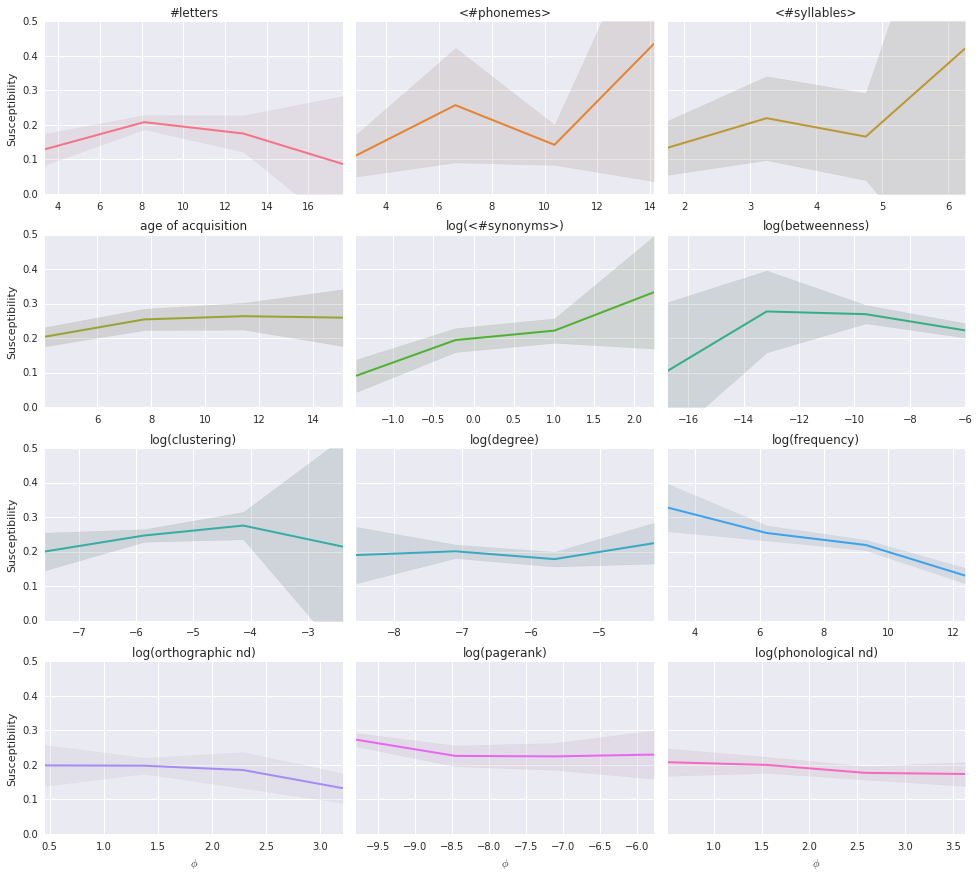

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=susties, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

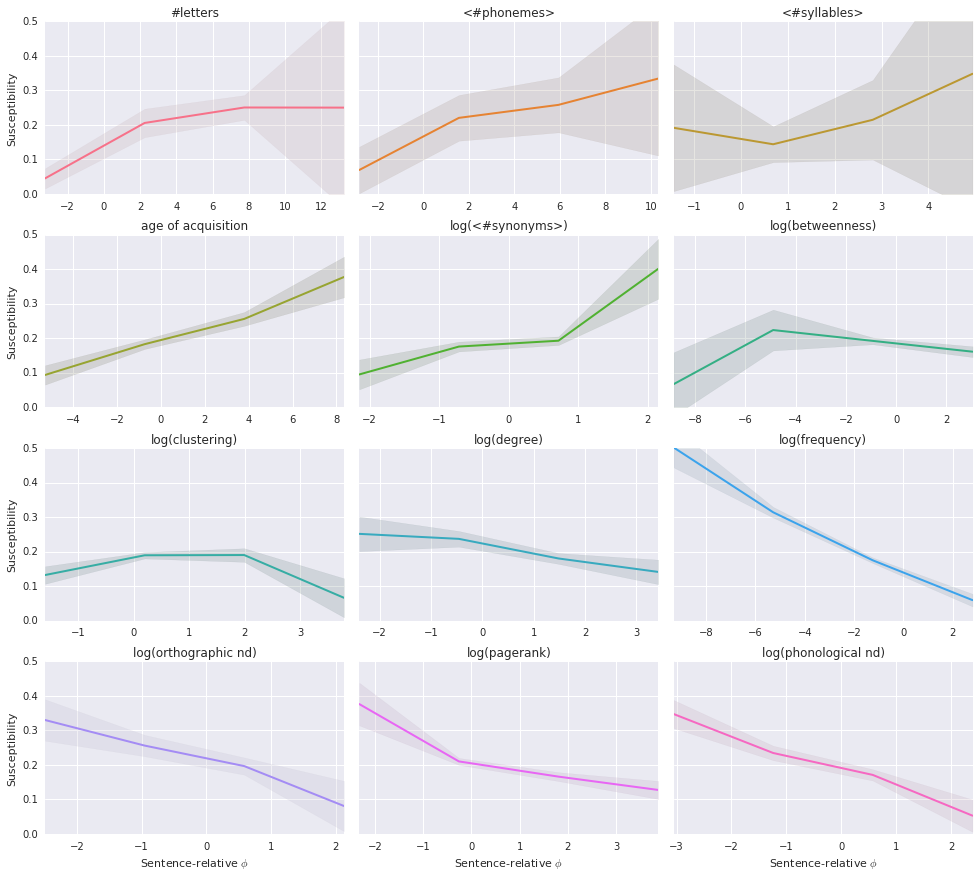

In [8]:
g = sb.FacetGrid(data=susties_rel, col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on how confidence intervals are computed here**

There are three ways I can conceive of the computation represented in the graphs above:
1. For each word, we look at how many times it is substituted versus how many times it appears in a position where it could have been substituted. This is the *word*'s susceptibility, $\sigma(w)$. Then for each feature bin $b_i$ we take all the words such that $\phi(w) \in b_i$, average, and compute an asymptotic confidence interval based on how many words are in the bin. This fails for sentence-relative features, because a given word has different feature values depending on the sentence it appears in. So we discard this.
2. Do the same but at the feature value level. So we define a *feature value* susceptibility, $\sigma(f)$, and compute a confidence interval based on how many different feature values we have in the bin. The idea behind (1) and (2) is to look at the bin middle-value like the relevant object we're measuring, and we have several measures for each bin middle-value, hence the confidence interval. This is the way CIs are computed above.
3. Consider that we sample a multinomial process: each substitution is in fact the sampling of a feature value from one of the four bins. In that case, we can compute multinomial proportion CIs. This is also not satisfactory since in most cases not all feature values are available at the time of sampling, since most sentences don't range over all the feature's values. So for now I'm sticking with (2).

### 2.2 Feature susceptibilities, reduced to features we expose in the paper

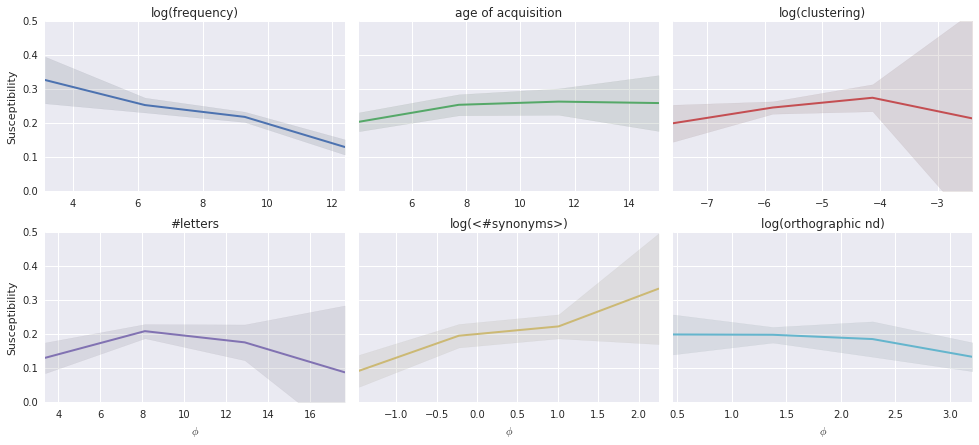

In [9]:
g = sb.FacetGrid(data=susties[susties['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative values.

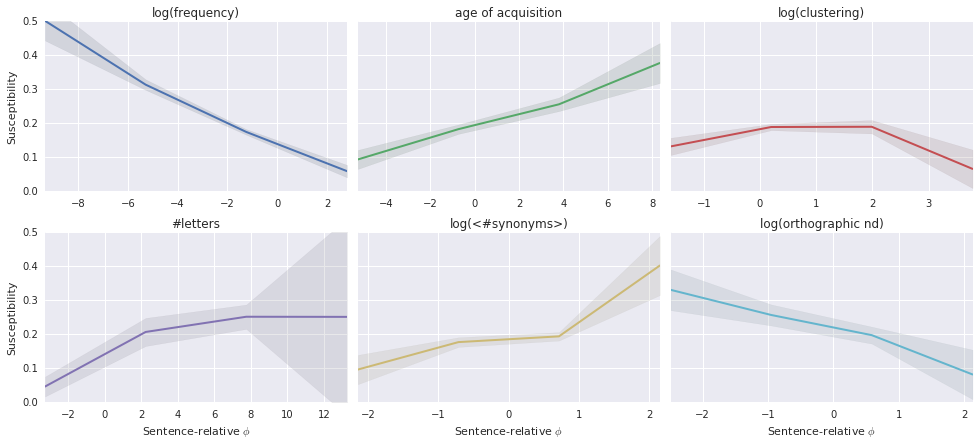

In [10]:
g = sb.FacetGrid(data=susties_rel[susties_rel['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=True, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_susties, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'Sentence-relative $\phi$')
g.set_ylabels('Susceptibility')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

## 3 On which POS tags do substitutions fall?

In [11]:
poses = susty_words[susty_words.feature == 'aoa'][['POS', 'cluster_id', 'destination_id',
                                                   'occurrence', 'source_id', 'target',
                                                   'weight', 'weight_appeared', 'word']]
# Only take first letter of POS code to denote categories,
# and group stopword-like categories together.
stop_poses = ['C', 'F', 'I', 'M', 'P', 'S', 'U']
poses['rPOS'] = poses['POS']\
    .apply(lambda x: x[0])\
    .apply(lambda x: 'Stopword-like' if x in stop_poses else x)

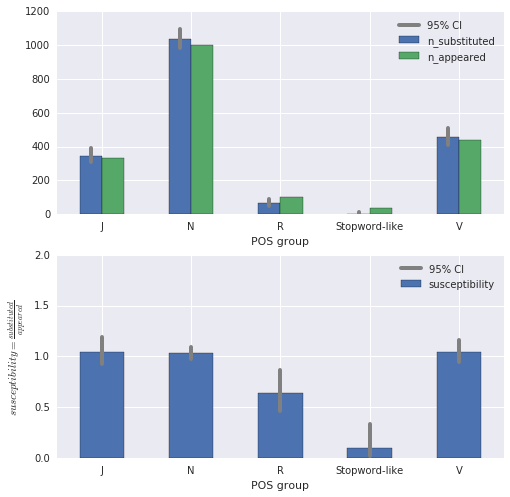

In [12]:
# Compute POS counts.
susty_pos = lambda x: ((x * poses.loc[x.index, 'weight']).sum() /
                       poses.loc[x.index, 'weight_appeared'].sum())
susties_pos = poses.groupby('rPOS')['target'].aggregate(
    {'susceptibility': susty_pos,
     'n_substituted': lambda x: (x * poses.loc[x.index, 'weight']).sum(),
     'n_appeared': lambda x: poses.loc[x.index, 'weight_appeared'].sum()}
).rename_axis('POS group')

# Plot.

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
# Raw substituted and appeared values.
susties_pos[['n_substituted', 'n_appeared']].plot(ax=axes[0], kind='bar', rot=0)
# With their CIs.
total_substituted = susties_pos.n_substituted.sum()
cis = multinomial_proportions_confint(susties_pos.n_substituted.round(), method='goodman')
for i in range(len(susties_pos)):
    axes[0].plot([i-.125, i-.125], cis[i] * total_substituted, lw=4, color='grey',
                 label='95% CI' if i == 0 else None)
axes[0].legend()
# Substitutability values.
susties_pos['susceptibility'].plot(ax=axes[1], kind='bar', legend=True, ylim=(0, 2), rot=0)
axes[1].set_ylabel(r'$susceptibility = \frac{substituted}{appeared}$')
# With their CIs.
for i in range(len(susties_pos)):
    axes[1].plot([i, i], cis[i] * total_substituted / susties_pos.n_appeared.iloc[i],
                 lw=4, color='grey', label='95% CI' if i == 0 else None)
axes[1].legend(loc='best')
# Save if necessary.
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-pos_susceptibilities'),
                bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all POS tags are available to sample from in all the sentences. There's no way out of this, so we're going to use multinomial CIs. We can safely scale all the bars and CIs to their respective `n_appeared` values, since that is an independent given before the sampling.

**Are the appeared and substituted proportions statistically different?**

The only test we can easily do is a multinomial goodness-of-fit. This tells us if the `n_substituted` counts are significantly different from the reference `n_appeared` counts.

From there on we know a few things:
* Comparing a given POS's `n_substituted` count to its reference `n_appeared` count tells us if it's statistically different (< or >). We know this will be true individually for any POS that is out of its confidence region for the global goodness-of-fit test, since it's a weaker hypothesis (so the null rejection region will be wider, and the POS we're looking at is already in the rejection region for the global test). We don't know if it'll be true or not for POSes that are in their confidence region for the global test.
* Jointly comparing two POS's `n_substituted` counts to their reference `n_appeared` counts tells us if there is bias for one w.r.t. the other. This is also true for all pairs of POSes that are on alternate sides of their confidence region in the global test (for the same reasons as in the previous point). We don't know if it's true for the other POSes though.

In [13]:
# Test the n_substituted proportions are different from the n_appeared proportions
total_appeared = susties_pos.n_appeared.sum()
appeared_cis = multinomial_proportions_confint(susties_pos.n_appeared.round(), method='goodman')
differences = [(s < ci[0] * total_appeared) or (s > ci[1] * total_appeared)
               for s, ci in zip(susties_pos.n_substituted, appeared_cis)]
are_different = np.any(differences)
if are_different:
    print("Appeared and substituted proportions are different with p < .05")
    print("The following POS tags are out of their confidence region:",
          list(susties_pos.index[np.where(differences)[0]]))
else:
    print("Appeared and substituted proportions cannot be "
          "said different with p value better than .05")

Appeared and substituted proportions are different with p < .05
The following POS tags are out of their confidence region: ['R', 'Stopword-like']


## 4 Susceptibility in terms of absolute fractiles

In [14]:
def plot_absolute_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')

    # Compute feature bins.
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_fractiles = pd.qcut(data.value, bin_count, labels=False)
            break
        except ValueError:
            pass

    # Compute bin counts
    heights = np.zeros(bin_count)
    for i in range(bin_count):
        heights[i] = data[data.target & (x_fractiles == i)].weight.sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, bin_count + 1), heights, color=color)
    plt.fill_between(range(1, bin_count + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, bin_count + 1))
    plt.xlim(1, bin_count)
    plt.ylim(0, None)

### 4.1 All features susceptibilities

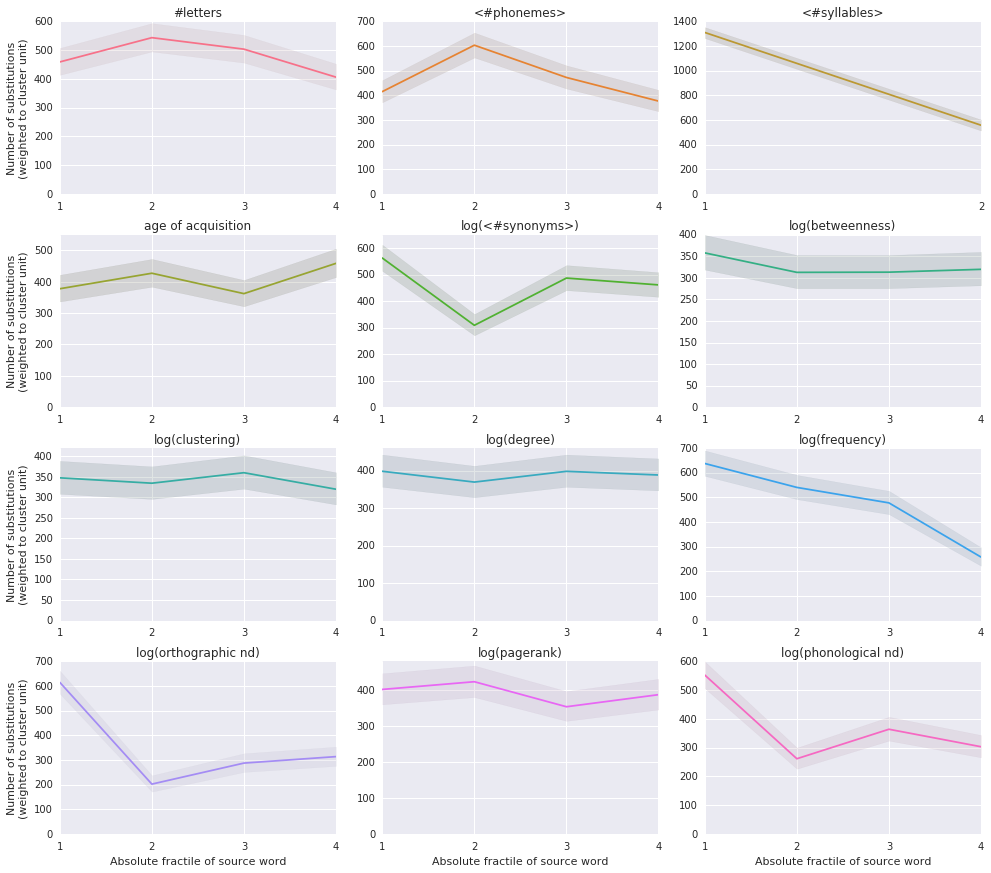

In [15]:
# Now plot.
g = sb.FacetGrid(data=susty_words, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're again in case (3) of the above explanation on confidence intervals (in section 2): it's really like a multinomial sampling, but not quite since not all absolute feature fractiles are available to sample from in all the sentences. Again, there's no way out of this, so we're going to use multinomial CIs.

### 4.2 Feature susceptibilities, reduced to features we expose in the paper

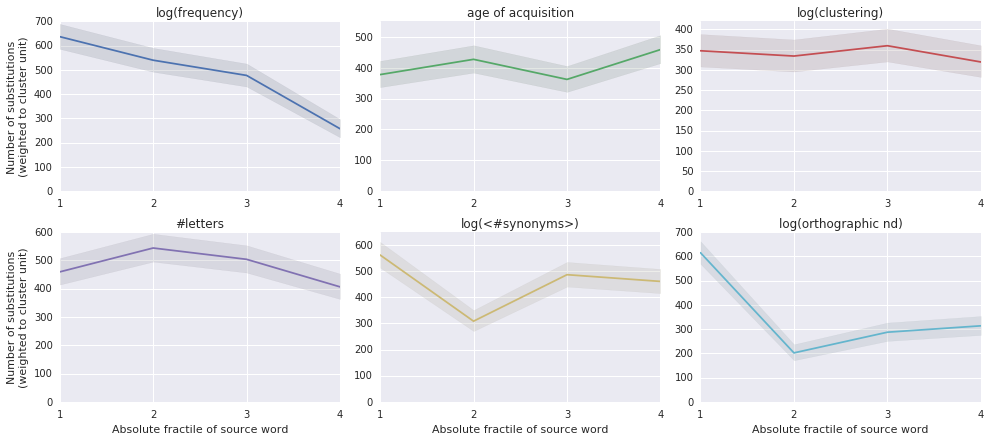

In [16]:
# Now plot.
g = sb.FacetGrid(data=susty_words[susty_words['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_absolute_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Absolute fractile of source word')
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-absolute'),
                  bbox_inches='tight', dpi=300)

## 5 Susceptibility in terms of sentence fractiles

Build our data.

In [17]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, _ = substitution.features(feature)
            if np.isnan(source):
                # The source word has no feature value. We drop this substitution.
                continue
            sentence, _ = substitution.source_destination_features(feature)
            # Remove stopwords from this analysis, since we dropped substitutions on stopwords.
            dslice = slice(substitution.start,
                           substitution.start + len(substitution.destination.tokens))
            is_stopword = np.array([(lemma in stopwords) or (token in stopwords)
                                    for (lemma, token) in
                                    zip(substitution.source.lemmas[dslice],
                                        substitution.source.tokens[dslice])])
            sentence[is_stopword] = np.nan
            # Find the number of bins we'll use.
            values = set(sentence[np.isfinite(sentence)])
            if len(values) == 0 or len(values) == 1:
                # Only NaNs, or only one feature value. Drop this.
                continue
            start, stop = None, None
            power = 0
            while start is None:
                if int(BIN_COUNT / 2**power) * 2**power != BIN_COUNT:
                    raise ValueError('BIN_COUNT must be a power of 2')
                try:
                    start = 2**power * pd.qcut(sentence, int(BIN_COUNT / 2**power),
                                               labels=False)[substitution.position]
                    stop = start + 2**power
                except ValueError:
                    power += 1
            # And finally save the bin.
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'start': start,
                         'stop': stop})

original_fractiles = pd.DataFrame(data)
del data

  0% (    1 of 72339) |            | Elapsed Time: 0:00:01 ETA:  1 day, 10:47:30

  0% (    5 of 72339) |                    | Elapsed Time: 0:00:02 ETA:  5:04:53

  0% (   12 of 72339) |                    | Elapsed Time: 0:00:04 ETA:  4:21:52

  0% (   17 of 72339) |                    | Elapsed Time: 0:00:05 ETA:  4:21:25

  0% (   28 of 72339) |                    | Elapsed Time: 0:00:06 ETA:  3:25:09

  0% (   41 of 72339) |                    | Elapsed Time: 0:00:07 ETA:  2:50:29

  0% (   52 of 72339) |                    | Elapsed Time: 0:00:08 ETA:  2:39:31

  0% (   56 of 72339) |                    | Elapsed Time: 0:00:09 ETA:  2:57:29

  0% (   67 of 72339) |                    | Elapsed Time: 0:00:10 ETA:  2:46:21

  0% (   71 of 72339) |                    | Elapsed Time: 0:00:11 ETA:  2:54:17

  0% (   74 of 72339) |                    | Elapsed Time: 0:00:12 ETA:  2:58:42

  0% (   78 of 72339) |                    | Elapsed Time: 0:00:14 ETA:  3:01:44

  0% (   85 of 72339) |                    | Elapsed Time: 0:00:15 ETA:  2:57:12

  0% (  104 of 72339) |                    | Elapsed Time: 0:00:16 ETA:  2:36:35

  0% (  112 of 72339) |                    | Elapsed Time: 0:00:17 ETA:  2:49:20

  0% (  122 of 72339) |                    | Elapsed Time: 0:00:18 ETA:  2:52:10

  0% (  135 of 72339) |                    | Elapsed Time: 0:00:19 ETA:  2:27:12

  0% (  142 of 72339) |                    | Elapsed Time: 0:00:20 ETA:  2:34:57

  0% (  161 of 72339) |                    | Elapsed Time: 0:00:21 ETA:  2:09:53

  0% (  168 of 72339) |                    | Elapsed Time: 0:00:22 ETA:  2:03:01

  0% (  171 of 72339) |                    | Elapsed Time: 0:00:23 ETA:  2:04:28

  0% (  179 of 72339) |                    | Elapsed Time: 0:00:24 ETA:  2:03:16

  0% (  186 of 72339) |                    | Elapsed Time: 0:00:25 ETA:  2:21:25

  0% (  192 of 72339) |                    | Elapsed Time: 0:00:27 ETA:  2:27:33

  0% (  198 of 72339) |                    | Elapsed Time: 0:00:28 ETA:  2:34:06

  0% (  206 of 72339) |                    | Elapsed Time: 0:00:29 ETA:  2:45:40

  0% (  215 of 72339) |                    | Elapsed Time: 0:00:30 ETA:  2:42:44

  0% (  223 of 72339) |                    | Elapsed Time: 0:00:31 ETA:  3:11:22

  0% (  234 of 72339) |                    | Elapsed Time: 0:00:32 ETA:  3:01:14

  0% (  247 of 72339) |                    | Elapsed Time: 0:00:33 ETA:  2:36:15

  0% (  253 of 72339) |                    | Elapsed Time: 0:00:34 ETA:  2:39:40

  0% (  261 of 72339) |                    | Elapsed Time: 0:00:35 ETA:  2:38:47

  0% (  271 of 72339) |                    | Elapsed Time: 0:00:36 ETA:  2:27:25

  0% (  281 of 72339) |                    | Elapsed Time: 0:00:37 ETA:  2:20:06

  0% (  290 of 72339) |                    | Elapsed Time: 0:00:38 ETA:  2:18:24

  0% (  298 of 72339) |                    | Elapsed Time: 0:00:40 ETA:  2:23:16

  0% (  304 of 72339) |                    | Elapsed Time: 0:00:41 ETA:  2:29:39

  0% (  307 of 72339) |                    | Elapsed Time: 0:00:42 ETA:  2:46:22

  0% (  313 of 72339) |                    | Elapsed Time: 0:00:43 ETA:  3:04:24

  0% (  324 of 72339) |                    | Elapsed Time: 0:00:44 ETA:  2:50:07

  0% (  333 of 72339) |                    | Elapsed Time: 0:00:45 ETA:  2:46:53

  0% (  337 of 72339) |                    | Elapsed Time: 0:00:46 ETA:  3:00:03

  0% (  343 of 72339) |                    | Elapsed Time: 0:00:47 ETA:  3:11:23

  0% (  357 of 72339) |                    | Elapsed Time: 0:00:48 ETA:  2:57:46

  0% (  368 of 72339) |                    | Elapsed Time: 0:00:49 ETA:  2:44:46

  0% (  379 of 72339) |                    | Elapsed Time: 0:00:50 ETA:  2:30:40

  0% (  388 of 72339) |                    | Elapsed Time: 0:00:52 ETA:  2:18:44

  0% (  394 of 72339) |                    | Elapsed Time: 0:00:53 ETA:  2:18:26

  0% (  401 of 72339) |                    | Elapsed Time: 0:00:54 ETA:  2:25:45

  0% (  411 of 72339) |                    | Elapsed Time: 0:00:55 ETA:  2:27:06

  0% (  417 of 72339) |                    | Elapsed Time: 0:00:56 ETA:  2:29:00

  0% (  427 of 72339) |                    | Elapsed Time: 0:00:57 ETA:  2:22:33

  0% (  442 of 72339) |                    | Elapsed Time: 0:00:58 ETA:  2:19:50

  0% (  452 of 72339) |                    | Elapsed Time: 0:01:00 ETA:  2:29:03

  0% (  457 of 72339) |                    | Elapsed Time: 0:01:01 ETA:  2:40:33

  0% (  469 of 72339) |                    | Elapsed Time: 0:01:02 ETA:  2:40:27

  0% (  474 of 72339) |                    | Elapsed Time: 0:01:04 ETA:  2:50:06

  0% (  478 of 72339) |                    | Elapsed Time: 0:01:06 ETA:  3:05:42

  0% (  480 of 72339) |                    | Elapsed Time: 0:01:07 ETA:  3:25:35

  0% (  483 of 72339) |                    | Elapsed Time: 0:01:08 ETA:  3:35:43

  0% (  491 of 72339) |                    | Elapsed Time: 0:01:09 ETA:  3:41:27

  0% (  497 of 72339) |                    | Elapsed Time: 0:01:10 ETA:  4:22:34

  0% (  500 of 72339) |                    | Elapsed Time: 0:01:12 ETA:  4:57:19

  0% (  502 of 72339) |                    | Elapsed Time: 0:01:13 ETA:  5:26:51

  0% (  504 of 72339) |                    | Elapsed Time: 0:01:15 ETA:  7:12:46

  0% (  506 of 72339) |                    | Elapsed Time: 0:01:17 ETA:  7:51:31

  0% (  509 of 72339) |                    | Elapsed Time: 0:01:18 ETA:  7:45:17

  0% (  513 of 72339) |                    | Elapsed Time: 0:01:19 ETA:  7:12:06

  0% (  521 of 72339) |                    | Elapsed Time: 0:01:20 ETA:  6:16:17

  0% (  524 of 72339) |                    | Elapsed Time: 0:01:21 ETA:  7:21:27

  0% (  528 of 72339) |                    | Elapsed Time: 0:01:23 ETA:  8:00:12

  0% (  532 of 72339) |                    | Elapsed Time: 0:01:24 ETA:  7:33:50

  0% (  537 of 72339) |                    | Elapsed Time: 0:01:25 ETA:  6:50:06

  0% (  543 of 72339) |                    | Elapsed Time: 0:01:26 ETA:  5:45:02

  0% (  552 of 72339) |                    | Elapsed Time: 0:01:27 ETA:  4:40:10

  0% (  558 of 72339) |                    | Elapsed Time: 0:01:29 ETA:  4:36:29

  0% (  561 of 72339) |                    | Elapsed Time: 0:01:30 ETA:  4:46:04

  0% (  565 of 72339) |                    | Elapsed Time: 0:01:31 ETA:  5:07:53

  0% (  573 of 72339) |                    | Elapsed Time: 0:01:32 ETA:  4:33:34

  0% (  581 of 72339) |                    | Elapsed Time: 0:01:34 ETA:  4:03:29

  0% (  585 of 72339) |                    | Elapsed Time: 0:01:35 ETA:  4:04:07

  0% (  589 of 72339) |                    | Elapsed Time: 0:01:36 ETA:  4:02:34

  0% (  594 of 72339) |                    | Elapsed Time: 0:01:37 ETA:  4:08:16

  0% (  601 of 72339) |                    | Elapsed Time: 0:01:38 ETA:  4:18:22

  0% (  609 of 72339) |                    | Elapsed Time: 0:01:39 ETA:  3:54:21

  0% (  613 of 72339) |                    | Elapsed Time: 0:01:40 ETA:  3:51:48

  0% (  616 of 72339) |                    | Elapsed Time: 0:01:41 ETA:  3:50:40

  0% (  619 of 72339) |                    | Elapsed Time: 0:01:42 ETA:  4:14:36

  0% (  623 of 72339) |                    | Elapsed Time: 0:01:43 ETA:  4:42:45

  0% (  627 of 72339) |                    | Elapsed Time: 0:01:44 ETA:  4:39:26

  0% (  638 of 72339) |                    | Elapsed Time: 0:01:46 ETA:  4:07:51

  0% (  645 of 72339) |                    | Elapsed Time: 0:01:47 ETA:  4:03:30

  0% (  650 of 72339) |                    | Elapsed Time: 0:01:48 ETA:  4:18:53

  0% (  656 of 72339) |                    | Elapsed Time: 0:01:50 ETA:  4:32:47

  0% (  664 of 72339) |                    | Elapsed Time: 0:01:51 ETA:  4:06:19

  0% (  669 of 72339) |                    | Elapsed Time: 0:01:52 ETA:  3:55:37

  0% (  674 of 72339) |                    | Elapsed Time: 0:01:53 ETA:  3:48:24

  0% (  679 of 72339) |                    | Elapsed Time: 0:01:54 ETA:  3:43:51

  0% (  687 of 72339) |                    | Elapsed Time: 0:01:55 ETA:  3:29:43

  0% (  694 of 72339) |                    | Elapsed Time: 0:01:56 ETA:  3:40:45

  0% (  699 of 72339) |                    | Elapsed Time: 0:01:57 ETA:  3:48:25

  0% (  703 of 72339) |                    | Elapsed Time: 0:01:59 ETA:  3:50:00

  0% (  706 of 72339) |                    | Elapsed Time: 0:02:00 ETA:  4:05:42

  0% (  714 of 72339) |                    | Elapsed Time: 0:02:01 ETA:  4:05:43

  0% (  722 of 72339) |                    | Elapsed Time: 0:02:02 ETA:  3:51:33

  1% (  727 of 72339) |                    | Elapsed Time: 0:02:03 ETA:  3:50:50

  1% (  732 of 72339) |                    | Elapsed Time: 0:02:04 ETA:  3:46:53

  1% (  736 of 72339) |                    | Elapsed Time: 0:02:05 ETA:  4:09:15

  1% (  744 of 72339) |                    | Elapsed Time: 0:02:06 ETA:  4:00:09

  1% (  751 of 72339) |                    | Elapsed Time: 0:02:07 ETA:  3:47:21

  1% (  756 of 72339) |                    | Elapsed Time: 0:02:08 ETA:  3:40:52

  1% (  762 of 72339) |                    | Elapsed Time: 0:02:10 ETA:  3:29:43

  1% (  770 of 72339) |                    | Elapsed Time: 0:02:11 ETA:  3:30:06

  1% (  780 of 72339) |                    | Elapsed Time: 0:02:12 ETA:  3:25:27

  1% (  785 of 72339) |                    | Elapsed Time: 0:02:13 ETA:  3:23:59

  1% (  789 of 72339) |                    | Elapsed Time: 0:02:14 ETA:  3:30:58

  1% (  793 of 72339) |                    | Elapsed Time: 0:02:15 ETA:  3:31:52

  1% (  805 of 72339) |                    | Elapsed Time: 0:02:16 ETA:  3:18:26

  1% (  811 of 72339) |                    | Elapsed Time: 0:02:17 ETA:  3:19:16

  1% (  817 of 72339) |                    | Elapsed Time: 0:02:19 ETA:  3:18:12

  1% (  822 of 72339) |                    | Elapsed Time: 0:02:20 ETA:  3:19:14

  1% (  837 of 72339) |                    | Elapsed Time: 0:02:21 ETA:  2:58:24

  1% (  844 of 72339) |                    | Elapsed Time: 0:02:22 ETA:  3:06:39

  1% (  863 of 72339) |                    | Elapsed Time: 0:02:23 ETA:  2:33:21

  1% (  876 of 72339) |                    | Elapsed Time: 0:02:24 ETA:  2:15:02

  1% (  887 of 72339) |                    | Elapsed Time: 0:02:25 ETA:  2:02:08

  1% (  897 of 72339) |                    | Elapsed Time: 0:02:26 ETA:  2:07:34

  1% (  901 of 72339) |                    | Elapsed Time: 0:02:27 ETA:  2:09:55

  1% (  905 of 72339) |                    | Elapsed Time: 0:02:28 ETA:  2:01:54

  1% (  914 of 72339) |                    | Elapsed Time: 0:02:29 ETA:  1:54:54

  1% (  923 of 72339) |                    | Elapsed Time: 0:02:30 ETA:  2:02:04

  1% (  928 of 72339) |                    | Elapsed Time: 0:02:31 ETA:  2:04:22

  1% (  935 of 72339) |                    | Elapsed Time: 0:02:32 ETA:  2:27:27

  1% (  945 of 72339) |                    | Elapsed Time: 0:02:33 ETA:  2:35:17

  1% (  952 of 72339) |                    | Elapsed Time: 0:02:34 ETA:  2:45:31

  1% (  960 of 72339) |                    | Elapsed Time: 0:02:35 ETA:  2:46:11

  1% (  973 of 72339) |                    | Elapsed Time: 0:02:36 ETA:  2:25:09

  1% (  987 of 72339) |                    | Elapsed Time: 0:02:37 ETA:  2:18:18

  1% (  994 of 72339) |                    | Elapsed Time: 0:02:39 ETA:  2:27:51

  1% ( 1006 of 72339) |                    | Elapsed Time: 0:02:40 ETA:  2:25:01

  1% ( 1011 of 72339) |                    | Elapsed Time: 0:02:41 ETA:  2:24:19

  1% ( 1020 of 72339) |                    | Elapsed Time: 0:02:42 ETA:  2:19:09

  1% ( 1033 of 72339) |                    | Elapsed Time: 0:02:43 ETA:  2:12:59

  1% ( 1042 of 72339) |                    | Elapsed Time: 0:02:44 ETA:  2:10:23

  1% ( 1052 of 72339) |                    | Elapsed Time: 0:02:45 ETA:  2:08:06

  1% ( 1066 of 72339) |                    | Elapsed Time: 0:02:46 ETA:  2:06:34

  1% ( 1078 of 72339) |                    | Elapsed Time: 0:02:47 ETA:  2:08:29

  1% ( 1087 of 72339) |                    | Elapsed Time: 0:02:48 ETA:  2:00:30

  1% ( 1096 of 72339) |                    | Elapsed Time: 0:02:49 ETA:  2:02:41

  1% ( 1099 of 72339) |                    | Elapsed Time: 0:02:50 ETA:  2:06:21

  1% ( 1105 of 72339) |                    | Elapsed Time: 0:02:51 ETA:  2:11:40

  1% ( 1114 of 72339) |                    | Elapsed Time: 0:02:52 ETA:  2:18:55

  1% ( 1123 of 72339) |                    | Elapsed Time: 0:02:53 ETA:  2:17:42

  1% ( 1132 of 72339) |                    | Elapsed Time: 0:02:55 ETA:  2:19:53

  1% ( 1141 of 72339) |                    | Elapsed Time: 0:02:56 ETA:  2:29:42

  1% ( 1155 of 72339) |                    | Elapsed Time: 0:02:57 ETA:  2:25:20

  1% ( 1163 of 72339) |                    | Elapsed Time: 0:02:58 ETA:  2:28:07

  1% ( 1179 of 72339) |                    | Elapsed Time: 0:02:59 ETA:  2:16:53

  1% ( 1188 of 72339) |                    | Elapsed Time: 0:03:00 ETA:  2:06:46

  1% ( 1200 of 72339) |                    | Elapsed Time: 0:03:01 ETA:  1:57:30

  1% ( 1215 of 72339) |                    | Elapsed Time: 0:03:02 ETA:  1:51:21

  1% ( 1233 of 72339) |                    | Elapsed Time: 0:03:03 ETA:  1:42:36

  1% ( 1248 of 72339) |                    | Elapsed Time: 0:03:04 ETA:  1:36:49

  1% ( 1258 of 72339) |                    | Elapsed Time: 0:03:05 ETA:  1:35:43

  1% ( 1270 of 72339) |                    | Elapsed Time: 0:03:06 ETA:  1:38:33

  1% ( 1282 of 72339) |                    | Elapsed Time: 0:03:07 ETA:  1:34:51

  1% ( 1299 of 72339) |                    | Elapsed Time: 0:03:08 ETA:  1:32:44

  1% ( 1318 of 72339) |                    | Elapsed Time: 0:03:09 ETA:  1:25:10

  1% ( 1331 of 72339) |                    | Elapsed Time: 0:03:10 ETA:  1:24:06

  1% ( 1350 of 72339) |                    | Elapsed Time: 0:03:11 ETA:  1:20:38

  1% ( 1361 of 72339) |                    | Elapsed Time: 0:03:12 ETA:  1:24:33

  1% ( 1371 of 72339) |                    | Elapsed Time: 0:03:13 ETA:  1:27:44

  1% ( 1378 of 72339) |                    | Elapsed Time: 0:03:15 ETA:  1:31:21

  1% ( 1386 of 72339) |                    | Elapsed Time: 0:03:16 ETA:  1:33:35

  1% ( 1392 of 72339) |                    | Elapsed Time: 0:03:17 ETA:  1:40:03

  1% ( 1404 of 72339) |                    | Elapsed Time: 0:03:18 ETA:  1:45:50

  1% ( 1409 of 72339) |                    | Elapsed Time: 0:03:19 ETA:  2:02:22

  1% ( 1418 of 72339) |                    | Elapsed Time: 0:03:20 ETA:  2:09:02

  1% ( 1433 of 72339) |                    | Elapsed Time: 0:03:21 ETA:  2:19:36

  1% ( 1440 of 72339) |                    | Elapsed Time: 0:03:22 ETA:  2:27:00

  1% ( 1446 of 72339) |                    | Elapsed Time: 0:03:23 ETA:  2:37:24

  2% ( 1449 of 72339) |                    | Elapsed Time: 0:03:25 ETA:  2:46:03

  2% ( 1458 of 72339) |                    | Elapsed Time: 0:03:26 ETA:  2:43:33

  2% ( 1461 of 72339) |                    | Elapsed Time: 0:03:27 ETA:  2:54:50

  2% ( 1463 of 72339) |                    | Elapsed Time: 0:03:28 ETA:  3:24:01

  2% ( 1466 of 72339) |                    | Elapsed Time: 0:03:30 ETA:  3:47:56

  2% ( 1468 of 72339) |                    | Elapsed Time: 0:03:31 ETA:  4:32:33

  2% ( 1472 of 72339) |                    | Elapsed Time: 0:03:33 ETA:  5:51:08

  2% ( 1475 of 72339) |                    | Elapsed Time: 0:03:34 ETA:  6:31:19

  2% ( 1477 of 72339) |                    | Elapsed Time: 0:03:35 ETA:  7:31:12

  2% ( 1484 of 72339) |                    | Elapsed Time: 0:03:36 ETA:  6:39:44

  2% ( 1489 of 72339) |                    | Elapsed Time: 0:03:37 ETA:  7:33:16

  2% ( 1492 of 72339) |                    | Elapsed Time: 0:03:39 ETA:  7:35:44

  2% ( 1496 of 72339) |                    | Elapsed Time: 0:03:40 ETA:  7:17:32

  2% ( 1499 of 72339) |                    | Elapsed Time: 0:03:42 ETA:  7:12:34

  2% ( 1501 of 72339) |                    | Elapsed Time: 0:03:43 ETA:  6:56:18

  2% ( 1504 of 72339) |                    | Elapsed Time: 0:03:44 ETA:  6:57:52

  2% ( 1509 of 72339) |                    | Elapsed Time: 0:03:45 ETA:  6:40:01

  2% ( 1517 of 72339) |                    | Elapsed Time: 0:03:46 ETA:  5:30:56

  2% ( 1523 of 72339) |                    | Elapsed Time: 0:03:47 ETA:  5:36:47

  2% ( 1526 of 72339) |                    | Elapsed Time: 0:03:48 ETA:  5:53:16

  2% ( 1531 of 72339) |                    | Elapsed Time: 0:03:50 ETA:  5:37:08

  2% ( 1540 of 72339) |                    | Elapsed Time: 0:03:51 ETA:  4:50:29

  2% ( 1545 of 72339) |                    | Elapsed Time: 0:03:52 ETA:  4:24:35

  2% ( 1549 of 72339) |                    | Elapsed Time: 0:03:53 ETA:  4:13:19

  2% ( 1555 of 72339) |                    | Elapsed Time: 0:03:54 ETA:  3:57:20

  2% ( 1559 of 72339) |                    | Elapsed Time: 0:03:55 ETA:  3:58:25

  2% ( 1574 of 72339) |                    | Elapsed Time: 0:03:56 ETA:  3:28:50

  2% ( 1583 of 72339) |                    | Elapsed Time: 0:03:57 ETA:  3:19:50

  2% ( 1596 of 72339) |                    | Elapsed Time: 0:03:58 ETA:  2:51:21

  2% ( 1608 of 72339) |                    | Elapsed Time: 0:03:59 ETA:  2:27:29

  2% ( 1629 of 72339) |                    | Elapsed Time: 0:04:01 ETA:  2:08:02

  2% ( 1636 of 72339) |                    | Elapsed Time: 0:04:02 ETA:  2:03:07

  2% ( 1647 of 72339) |                    | Elapsed Time: 0:04:03 ETA:  1:52:31

  2% ( 1673 of 72339) |                    | Elapsed Time: 0:04:04 ETA:  1:33:04

  2% ( 1689 of 72339) |                    | Elapsed Time: 0:04:05 ETA:  1:23:50

  2% ( 1705 of 72339) |                    | Elapsed Time: 0:04:06 ETA:  1:22:31

  2% ( 1721 of 72339) |                    | Elapsed Time: 0:04:07 ETA:  1:17:15

  2% ( 1738 of 72339) |                    | Elapsed Time: 0:04:08 ETA:  1:15:07

  2% ( 1765 of 72339) |                    | Elapsed Time: 0:04:09 ETA:  1:07:54

  2% ( 1784 of 72339) |                    | Elapsed Time: 0:04:10 ETA:  1:08:05

  2% ( 1809 of 72339) |                    | Elapsed Time: 0:04:11 ETA:  0:59:03

  2% ( 1840 of 72339) |                    | Elapsed Time: 0:04:12 ETA:  0:52:35

  2% ( 1872 of 72339) |                    | Elapsed Time: 0:04:13 ETA:  0:50:45

  2% ( 1903 of 72339) |                    | Elapsed Time: 0:04:14 ETA:  0:46:46

  2% ( 1926 of 72339) |                    | Elapsed Time: 0:04:15 ETA:  0:44:54

  2% ( 1955 of 72339) |                    | Elapsed Time: 0:04:16 ETA:  0:42:09

  2% ( 1982 of 72339) |                    | Elapsed Time: 0:04:17 ETA:  0:40:07

  2% ( 2006 of 72339) |                    | Elapsed Time: 0:04:18 ETA:  0:40:31

  2% ( 2024 of 72339) |                    | Elapsed Time: 0:04:19 ETA:  0:40:47

  2% ( 2044 of 72339) |                    | Elapsed Time: 0:04:20 ETA:  0:43:03

  2% ( 2070 of 72339) |                    | Elapsed Time: 0:04:21 ETA:  0:44:01

  2% ( 2102 of 72339) |                    | Elapsed Time: 0:04:22 ETA:  0:43:58

  2% ( 2135 of 72339) |                    | Elapsed Time: 0:04:23 ETA:  0:43:37

  3% ( 2191 of 72339) |                    | Elapsed Time: 0:04:24 ETA:  0:37:35

  3% ( 2239 of 72339) |                    | Elapsed Time: 0:04:25 ETA:  0:34:40

  3% ( 2290 of 72339) |                    | Elapsed Time: 0:04:26 ETA:  0:31:29

  3% ( 2346 of 72339) |                    | Elapsed Time: 0:04:27 ETA:  0:28:03

  3% ( 2397 of 72339) |                    | Elapsed Time: 0:04:28 ETA:  0:25:08

  3% ( 2444 of 72339) |                    | Elapsed Time: 0:04:29 ETA:  0:23:00

  3% ( 2502 of 72339) |                    | Elapsed Time: 0:04:30 ETA:  0:20:57

  3% ( 2559 of 72339) |                    | Elapsed Time: 0:04:31 ETA:  0:19:31

  3% ( 2616 of 72339) |                    | Elapsed Time: 0:04:32 ETA:  0:18:15

  3% ( 2656 of 72339) |                    | Elapsed Time: 0:04:33 ETA:  0:19:03

  3% ( 2701 of 72339) |                    | Elapsed Time: 0:04:34 ETA:  0:19:11

  3% ( 2713 of 72339) |                    | Elapsed Time: 0:04:34 ETA:  0:19:17

  3% ( 2768 of 72339) |                    | Elapsed Time: 0:04:35 ETA:  0:19:20

  3% ( 2815 of 72339) |                    | Elapsed Time: 0:04:36 ETA:  0:19:32

  3% ( 2859 of 72339) |                    | Elapsed Time: 0:04:37 ETA:  0:19:48

  4% ( 2896 of 72339) |                    | Elapsed Time: 0:04:38 ETA:  0:21:03

  4% ( 2932 of 72339) |                    | Elapsed Time: 0:04:39 ETA:  0:22:29

  4% ( 2984 of 72339) |                    | Elapsed Time: 0:04:40 ETA:  0:22:53

  4% ( 3031 of 72339) |                    | Elapsed Time: 0:04:41 ETA:  0:22:20

  4% ( 3083 of 72339) |                    | Elapsed Time: 0:04:43 ETA:  0:21:54

  4% ( 3142 of 72339) |                    | Elapsed Time: 0:04:44 ETA:  0:21:04

  4% ( 3177 of 72339) |                    | Elapsed Time: 0:04:45 ETA:  0:22:18

  4% ( 3220 of 72339) |                    | Elapsed Time: 0:04:46 ETA:  0:22:32

  4% ( 3245 of 72339) |                    | Elapsed Time: 0:04:47 ETA:  0:23:46

  4% ( 3264 of 72339) |                    | Elapsed Time: 0:04:48 ETA:  0:25:32

  4% ( 3292 of 72339) |                    | Elapsed Time: 0:04:49 ETA:  0:26:10

  4% ( 3329 of 72339) |                    | Elapsed Time: 0:04:50 ETA:  0:27:28

  4% ( 3361 of 72339) |                    | Elapsed Time: 0:04:51 ETA:  0:28:59

  4% ( 3397 of 72339) |                    | Elapsed Time: 0:04:52 ETA:  0:30:36

  4% ( 3431 of 72339) |                    | Elapsed Time: 0:04:53 ETA:  0:33:38

  4% ( 3453 of 72339) |                    | Elapsed Time: 0:04:54 ETA:  0:35:27

  4% ( 3474 of 72339) |                    | Elapsed Time: 0:04:55 ETA:  0:39:02

  4% ( 3490 of 72339) |                    | Elapsed Time: 0:04:56 ETA:  0:41:07

  4% ( 3507 of 72339) |                    | Elapsed Time: 0:04:57 ETA:  0:41:00

  4% ( 3529 of 72339) |                    | Elapsed Time: 0:04:58 ETA:  0:42:14

  4% ( 3545 of 72339) |                    | Elapsed Time: 0:04:59 ETA:  0:46:53

  4% ( 3565 of 72339) |                    | Elapsed Time: 0:05:00 ETA:  0:50:02

  4% ( 3604 of 72339) |                    | Elapsed Time: 0:05:01 ETA:  0:49:15

  5% ( 3617 of 72339) |#                   | Elapsed Time: 0:05:01 ETA:  0:50:19

  5% ( 3672 of 72339) |#                   | Elapsed Time: 0:05:02 ETA:  0:41:59

  5% ( 3730 of 72339) |#                   | Elapsed Time: 0:05:03 ETA:  0:35:01

  5% ( 3795 of 72339) |#                   | Elapsed Time: 0:05:04 ETA:  0:28:13

  5% ( 3856 of 72339) |#                   | Elapsed Time: 0:05:05 ETA:  0:23:55

  5% ( 3920 of 72339) |#                   | Elapsed Time: 0:05:06 ETA:  0:20:46

  5% ( 3972 of 72339) |#                   | Elapsed Time: 0:05:07 ETA:  0:18:28

  5% ( 4025 of 72339) |#                   | Elapsed Time: 0:05:08 ETA:  0:16:39

  5% ( 4087 of 72339) |#                   | Elapsed Time: 0:05:09 ETA:  0:15:35

  5% ( 4149 of 72339) |#                   | Elapsed Time: 0:05:10 ETA:  0:15:26

  5% ( 4207 of 72339) |#                   | Elapsed Time: 0:05:11 ETA:  0:15:16

  5% ( 4262 of 72339) |#                   | Elapsed Time: 0:05:12 ETA:  0:15:23

  5% ( 4319 of 72339) |#                   | Elapsed Time: 0:05:13 ETA:  0:15:38

  6% ( 4372 of 72339) |#                   | Elapsed Time: 0:05:14 ETA:  0:15:57

  6% ( 4425 of 72339) |#                   | Elapsed Time: 0:05:15 ETA:  0:16:24

  6% ( 4486 of 72339) |#                   | Elapsed Time: 0:05:16 ETA:  0:16:01

  6% ( 4522 of 72339) |#                   | Elapsed Time: 0:05:17 ETA:  0:15:46

  6% ( 4574 of 72339) |#                   | Elapsed Time: 0:05:18 ETA:  0:16:11

  6% ( 4636 of 72339) |#                   | Elapsed Time: 0:05:19 ETA:  0:16:08

  6% ( 4697 of 72339) |#                   | Elapsed Time: 0:05:20 ETA:  0:16:00

  6% ( 4759 of 72339) |#                   | Elapsed Time: 0:05:21 ETA:  0:15:40

  6% ( 4828 of 72339) |#                   | Elapsed Time: 0:05:22 ETA:  0:15:11

  6% ( 4889 of 72339) |#                   | Elapsed Time: 0:05:23 ETA:  0:14:51

  6% ( 4942 of 72339) |#                   | Elapsed Time: 0:05:24 ETA:  0:14:49

  6% ( 5007 of 72339) |#                   | Elapsed Time: 0:05:25 ETA:  0:14:38

  7% ( 5072 of 72339) |#                   | Elapsed Time: 0:05:26 ETA:  0:14:26

  7% ( 5136 of 72339) |#                   | Elapsed Time: 0:05:27 ETA:  0:14:00

  7% ( 5191 of 72339) |#                   | Elapsed Time: 0:05:28 ETA:  0:14:13

  7% ( 5247 of 72339) |#                   | Elapsed Time: 0:05:29 ETA:  0:14:22

  7% ( 5318 of 72339) |#                   | Elapsed Time: 0:05:30 ETA:  0:14:04

  7% ( 5386 of 72339) |#                   | Elapsed Time: 0:05:31 ETA:  0:14:05

  7% ( 5426 of 72339) |#                   | Elapsed Time: 0:05:32 ETA:  0:14:00

  7% ( 5492 of 72339) |#                   | Elapsed Time: 0:05:33 ETA:  0:13:32

  7% ( 5559 of 72339) |#                   | Elapsed Time: 0:05:34 ETA:  0:13:27

  7% ( 5625 of 72339) |#                   | Elapsed Time: 0:05:35 ETA:  0:13:23

  7% ( 5685 of 72339) |#                   | Elapsed Time: 0:05:36 ETA:  0:13:32

  7% ( 5751 of 72339) |#                   | Elapsed Time: 0:05:37 ETA:  0:13:09

  8% ( 5812 of 72339) |#                   | Elapsed Time: 0:05:38 ETA:  0:12:57

  8% ( 5868 of 72339) |#                   | Elapsed Time: 0:05:39 ETA:  0:13:28

  8% ( 5931 of 72339) |#                   | Elapsed Time: 0:05:40 ETA:  0:13:36

  8% ( 5992 of 72339) |#                   | Elapsed Time: 0:05:41 ETA:  0:13:41

  8% ( 6056 of 72339) |#                   | Elapsed Time: 0:05:42 ETA:  0:13:45

  8% ( 6114 of 72339) |#                   | Elapsed Time: 0:05:43 ETA:  0:14:02

  8% ( 6158 of 72339) |#                   | Elapsed Time: 0:05:44 ETA:  0:14:52

  8% ( 6217 of 72339) |#                   | Elapsed Time: 0:05:45 ETA:  0:14:53

  8% ( 6281 of 72339) |#                   | Elapsed Time: 0:05:46 ETA:  0:14:56

  8% ( 6330 of 72339) |#                   | Elapsed Time: 0:05:47 ETA:  0:14:46

  8% ( 6400 of 72339) |#                   | Elapsed Time: 0:05:48 ETA:  0:14:09

  8% ( 6471 of 72339) |#                   | Elapsed Time: 0:05:49 ETA:  0:13:50

  9% ( 6538 of 72339) |#                   | Elapsed Time: 0:05:50 ETA:  0:13:36

  9% ( 6610 of 72339) |#                   | Elapsed Time: 0:05:51 ETA:  0:13:16

  9% ( 6680 of 72339) |#                   | Elapsed Time: 0:05:52 ETA:  0:12:52

  9% ( 6748 of 72339) |#                   | Elapsed Time: 0:05:53 ETA:  0:12:05

  9% ( 6823 of 72339) |#                   | Elapsed Time: 0:05:54 ETA:  0:11:35

  9% ( 6887 of 72339) |#                   | Elapsed Time: 0:05:55 ETA:  0:11:35

  9% ( 6979 of 72339) |#                   | Elapsed Time: 0:05:56 ETA:  0:10:54

  9% ( 7056 of 72339) |#                   | Elapsed Time: 0:05:57 ETA:  0:10:43

  9% ( 7141 of 72339) |#                   | Elapsed Time: 0:05:58 ETA:  0:10:21

  9% ( 7205 of 72339) |#                   | Elapsed Time: 0:05:59 ETA:  0:10:25

 10% ( 7234 of 72339) |##                  | Elapsed Time: 0:05:59 ETA:  0:10:32

 10% ( 7295 of 72339) |##                  | Elapsed Time: 0:06:00 ETA:  0:10:47

 10% ( 7359 of 72339) |##                  | Elapsed Time: 0:06:01 ETA:  0:10:53

 10% ( 7423 of 72339) |##                  | Elapsed Time: 0:06:02 ETA:  0:11:11

 10% ( 7484 of 72339) |##                  | Elapsed Time: 0:06:03 ETA:  0:11:15

 10% ( 7548 of 72339) |##                  | Elapsed Time: 0:06:04 ETA:  0:12:06

 10% ( 7616 of 72339) |##                  | Elapsed Time: 0:06:05 ETA:  0:12:22

 10% ( 7685 of 72339) |##                  | Elapsed Time: 0:06:06 ETA:  0:12:54

 10% ( 7755 of 72339) |##                  | Elapsed Time: 0:06:07 ETA:  0:12:39

 10% ( 7813 of 72339) |##                  | Elapsed Time: 0:06:08 ETA:  0:12:48

 10% ( 7879 of 72339) |##                  | Elapsed Time: 0:06:09 ETA:  0:12:35

 10% ( 7948 of 72339) |##                  | Elapsed Time: 0:06:10 ETA:  0:12:24

 11% ( 8013 of 72339) |##                  | Elapsed Time: 0:06:11 ETA:  0:12:21

 11% ( 8082 of 72339) |##                  | Elapsed Time: 0:06:12 ETA:  0:12:05

 11% ( 8139 of 72339) |##                  | Elapsed Time: 0:06:13 ETA:  0:11:57

 11% ( 8204 of 72339) |##                  | Elapsed Time: 0:06:14 ETA:  0:12:01

 11% ( 8276 of 72339) |##                  | Elapsed Time: 0:06:15 ETA:  0:11:55

 11% ( 8335 of 72339) |##                  | Elapsed Time: 0:06:16 ETA:  0:12:16

 11% ( 8404 of 72339) |##                  | Elapsed Time: 0:06:17 ETA:  0:11:54

 11% ( 8448 of 72339) |##                  | Elapsed Time: 0:06:18 ETA:  0:12:48

 11% ( 8498 of 72339) |##                  | Elapsed Time: 0:06:19 ETA:  0:13:27

 11% ( 8562 of 72339) |##                  | Elapsed Time: 0:06:20 ETA:  0:13:29

 11% ( 8634 of 72339) |##                  | Elapsed Time: 0:06:21 ETA:  0:13:21

 12% ( 8703 of 72339) |##                  | Elapsed Time: 0:06:22 ETA:  0:13:16

 12% ( 8770 of 72339) |##                  | Elapsed Time: 0:06:23 ETA:  0:13:10

 12% ( 8832 of 72339) |##                  | Elapsed Time: 0:06:25 ETA:  0:13:32

 12% ( 8889 of 72339) |##                  | Elapsed Time: 0:06:26 ETA:  0:13:34

 12% ( 8946 of 72339) |##                  | Elapsed Time: 0:06:27 ETA:  0:14:06

 12% ( 9006 of 72339) |##                  | Elapsed Time: 0:06:28 ETA:  0:13:16

 12% ( 9043 of 72339) |##                  | Elapsed Time: 0:06:28 ETA:  0:12:43

 12% ( 9106 of 72339) |##                  | Elapsed Time: 0:06:29 ETA:  0:12:44

 12% ( 9168 of 72339) |##                  | Elapsed Time: 0:06:30 ETA:  0:13:04

 12% ( 9243 of 72339) |##                  | Elapsed Time: 0:06:31 ETA:  0:12:50

 12% ( 9313 of 72339) |##                  | Elapsed Time: 0:06:32 ETA:  0:12:43

 12% ( 9388 of 72339) |##                  | Elapsed Time: 0:06:33 ETA:  0:12:13

 13% ( 9455 of 72339) |##                  | Elapsed Time: 0:06:34 ETA:  0:11:52

 13% ( 9506 of 72339) |##                  | Elapsed Time: 0:06:35 ETA:  0:11:56

 13% ( 9572 of 72339) |##                  | Elapsed Time: 0:06:36 ETA:  0:11:45

 13% ( 9631 of 72339) |##                  | Elapsed Time: 0:06:37 ETA:  0:11:58

 13% ( 9696 of 72339) |##                  | Elapsed Time: 0:06:38 ETA:  0:11:52

 13% ( 9763 of 72339) |##                  | Elapsed Time: 0:06:39 ETA:  0:11:41

 13% ( 9826 of 72339) |##                  | Elapsed Time: 0:06:40 ETA:  0:12:02

 13% ( 9898 of 72339) |##                  | Elapsed Time: 0:06:41 ETA:  0:11:56

 13% ( 9947 of 72339) |##                  | Elapsed Time: 0:06:42 ETA:  0:12:05

 13% (10015 of 72339) |##                  | Elapsed Time: 0:06:43 ETA:  0:12:02

 13% (10074 of 72339) |##                  | Elapsed Time: 0:06:44 ETA:  0:11:46

 14% (10142 of 72339) |##                  | Elapsed Time: 0:06:45 ETA:  0:11:39

 14% (10206 of 72339) |##                  | Elapsed Time: 0:06:46 ETA:  0:11:29

 14% (10262 of 72339) |##                  | Elapsed Time: 0:06:47 ETA:  0:11:53

 14% (10330 of 72339) |##                  | Elapsed Time: 0:06:48 ETA:  0:11:50

 14% (10400 of 72339) |##                  | Elapsed Time: 0:06:49 ETA:  0:11:36

 14% (10460 of 72339) |##                  | Elapsed Time: 0:06:50 ETA:  0:11:59

 14% (10524 of 72339) |##                  | Elapsed Time: 0:06:51 ETA:  0:12:10

 14% (10593 of 72339) |##                  | Elapsed Time: 0:06:52 ETA:  0:12:07

 14% (10653 of 72339) |##                  | Elapsed Time: 0:06:53 ETA:  0:12:03

 14% (10724 of 72339) |##                  | Elapsed Time: 0:06:54 ETA:  0:11:56

 14% (10792 of 72339) |##                  | Elapsed Time: 0:06:55 ETA:  0:11:54

 15% (10851 of 72339) |###                 | Elapsed Time: 0:06:56 ETA:  0:11:09

 15% (10924 of 72339) |###                 | Elapsed Time: 0:06:57 ETA:  0:10:59

 15% (10983 of 72339) |###                 | Elapsed Time: 0:06:58 ETA:  0:11:18

 15% (11053 of 72339) |###                 | Elapsed Time: 0:06:59 ETA:  0:10:59

 15% (11113 of 72339) |###                 | Elapsed Time: 0:07:00 ETA:  0:11:08

 15% (11181 of 72339) |###                 | Elapsed Time: 0:07:01 ETA:  0:11:08

 15% (11249 of 72339) |###                 | Elapsed Time: 0:07:02 ETA:  0:10:52

 15% (11325 of 72339) |###                 | Elapsed Time: 0:07:03 ETA:  0:10:42

 15% (11405 of 72339) |###                 | Elapsed Time: 0:07:04 ETA:  0:10:14

 15% (11487 of 72339) |###                 | Elapsed Time: 0:07:05 ETA:  0:10:04

 15% (11567 of 72339) |###                 | Elapsed Time: 0:07:06 ETA:  0:09:52

 16% (11652 of 72339) |###                 | Elapsed Time: 0:07:07 ETA:  0:09:12

 16% (11730 of 72339) |###                 | Elapsed Time: 0:07:08 ETA:  0:08:59

 16% (11756 of 72339) |###                 | Elapsed Time: 0:07:08 ETA:  0:08:32

 16% (11833 of 72339) |###                 | Elapsed Time: 0:07:09 ETA:  0:08:19

 16% (11907 of 72339) |###                 | Elapsed Time: 0:07:10 ETA:  0:08:09

 16% (11972 of 72339) |###                 | Elapsed Time: 0:07:11 ETA:  0:08:27

 16% (12040 of 72339) |###                 | Elapsed Time: 0:07:12 ETA:  0:08:43

 16% (12112 of 72339) |###                 | Elapsed Time: 0:07:13 ETA:  0:08:58

 16% (12193 of 72339) |###                 | Elapsed Time: 0:07:14 ETA:  0:08:55

 16% (12274 of 72339) |###                 | Elapsed Time: 0:07:15 ETA:  0:09:00

 17% (12359 of 72339) |###                 | Elapsed Time: 0:07:16 ETA:  0:08:48

 17% (12440 of 72339) |###                 | Elapsed Time: 0:07:17 ETA:  0:08:41

 17% (12524 of 72339) |###                 | Elapsed Time: 0:07:18 ETA:  0:08:30

 17% (12607 of 72339) |###                 | Elapsed Time: 0:07:19 ETA:  0:08:17

 17% (12660 of 72339) |###                 | Elapsed Time: 0:07:20 ETA:  0:07:55

 17% (12743 of 72339) |###                 | Elapsed Time: 0:07:21 ETA:  0:07:35

 17% (12824 of 72339) |###                 | Elapsed Time: 0:07:22 ETA:  0:07:23

 17% (12900 of 72339) |###                 | Elapsed Time: 0:07:23 ETA:  0:07:28

 17% (12979 of 72339) |###                 | Elapsed Time: 0:07:24 ETA:  0:07:29

 18% (13062 of 72339) |###                 | Elapsed Time: 0:07:25 ETA:  0:07:30

 18% (13143 of 72339) |###                 | Elapsed Time: 0:07:26 ETA:  0:07:30

 18% (13225 of 72339) |###                 | Elapsed Time: 0:07:27 ETA:  0:07:33

 18% (13306 of 72339) |###                 | Elapsed Time: 0:07:28 ETA:  0:07:34

 18% (13387 of 72339) |###                 | Elapsed Time: 0:07:29 ETA:  0:07:31

 18% (13469 of 72339) |###                 | Elapsed Time: 0:07:30 ETA:  0:07:38

 18% (13544 of 72339) |###                 | Elapsed Time: 0:07:31 ETA:  0:07:46

 18% (13564 of 72339) |###                 | Elapsed Time: 0:07:31 ETA:  0:07:41

 18% (13639 of 72339) |###                 | Elapsed Time: 0:07:32 ETA:  0:07:47

 18% (13712 of 72339) |###                 | Elapsed Time: 0:07:33 ETA:  0:08:01

 19% (13786 of 72339) |###                 | Elapsed Time: 0:07:34 ETA:  0:08:08

 19% (13861 of 72339) |###                 | Elapsed Time: 0:07:35 ETA:  0:08:17

 19% (13934 of 72339) |###                 | Elapsed Time: 0:07:36 ETA:  0:08:29

 19% (13997 of 72339) |###                 | Elapsed Time: 0:07:37 ETA:  0:08:57

 19% (14068 of 72339) |###                 | Elapsed Time: 0:07:38 ETA:  0:09:06

 19% (14137 of 72339) |###                 | Elapsed Time: 0:07:39 ETA:  0:09:14

 19% (14208 of 72339) |###                 | Elapsed Time: 0:07:40 ETA:  0:09:17

 19% (14287 of 72339) |###                 | Elapsed Time: 0:07:41 ETA:  0:09:09

 19% (14364 of 72339) |###                 | Elapsed Time: 0:07:42 ETA:  0:09:01

 19% (14435 of 72339) |###                 | Elapsed Time: 0:07:43 ETA:  0:09:05

 20% (14468 of 72339) |####                | Elapsed Time: 0:07:44 ETA:  0:09:02

 20% (14545 of 72339) |####                | Elapsed Time: 0:07:45 ETA:  0:08:54

 20% (14622 of 72339) |####                | Elapsed Time: 0:07:46 ETA:  0:08:31

 20% (14699 of 72339) |####                | Elapsed Time: 0:07:47 ETA:  0:08:20

 20% (14771 of 72339) |####                | Elapsed Time: 0:07:48 ETA:  0:08:13

 20% (14853 of 72339) |####                | Elapsed Time: 0:07:49 ETA:  0:07:57

 20% (14926 of 72339) |####                | Elapsed Time: 0:07:50 ETA:  0:08:04

 20% (14996 of 72339) |####                | Elapsed Time: 0:07:51 ETA:  0:08:13

 20% (15076 of 72339) |####                | Elapsed Time: 0:07:52 ETA:  0:07:58

 20% (15148 of 72339) |####                | Elapsed Time: 0:07:53 ETA:  0:08:07

 21% (15226 of 72339) |####                | Elapsed Time: 0:07:54 ETA:  0:08:04

 21% (15307 of 72339) |####                | Elapsed Time: 0:07:55 ETA:  0:07:58

 21% (15373 of 72339) |####                | Elapsed Time: 0:07:56 ETA:  0:07:52

 21% (15455 of 72339) |####                | Elapsed Time: 0:07:57 ETA:  0:07:37

 21% (15522 of 72339) |####                | Elapsed Time: 0:07:58 ETA:  0:07:58

 21% (15601 of 72339) |####                | Elapsed Time: 0:07:59 ETA:  0:07:49

 21% (15673 of 72339) |####                | Elapsed Time: 0:08:00 ETA:  0:07:45

 21% (15748 of 72339) |####                | Elapsed Time: 0:08:01 ETA:  0:07:52

 21% (15812 of 72339) |####                | Elapsed Time: 0:08:02 ETA:  0:08:05

 21% (15874 of 72339) |####                | Elapsed Time: 0:08:03 ETA:  0:08:28

 22% (15936 of 72339) |####                | Elapsed Time: 0:08:04 ETA:  0:08:56

 22% (16002 of 72339) |####                | Elapsed Time: 0:08:05 ETA:  0:09:19

 22% (16068 of 72339) |####                | Elapsed Time: 0:08:06 ETA:  0:09:45

 22% (16127 of 72339) |####                | Elapsed Time: 0:08:07 ETA:  0:10:02

 22% (16188 of 72339) |####                | Elapsed Time: 0:08:08 ETA:  0:10:34

 22% (16250 of 72339) |####                | Elapsed Time: 0:08:09 ETA:  0:10:53

 22% (16256 of 72339) |####                | Elapsed Time: 0:09:02 ETA:  2:15:18

 22% (16277 of 72339) |####                | Elapsed Time: 0:09:02 ETA:  2:26:46

 22% (16344 of 72339) |####                | Elapsed Time: 0:09:03 ETA:  2:25:06

 22% (16417 of 72339) |####                | Elapsed Time: 0:09:04 ETA:  2:21:33

 22% (16496 of 72339) |####                | Elapsed Time: 0:09:05 ETA:  2:17:35

 22% (16568 of 72339) |####                | Elapsed Time: 0:09:06 ETA:  2:15:48

 23% (16646 of 72339) |####                | Elapsed Time: 0:09:07 ETA:  2:10:25

 23% (16719 of 72339) |####                | Elapsed Time: 0:09:08 ETA:  2:07:15

 23% (16787 of 72339) |####                | Elapsed Time: 0:09:09 ETA:  2:05:41

 23% (16858 of 72339) |####                | Elapsed Time: 0:09:10 ETA:  0:07:33

 23% (16911 of 72339) |####                | Elapsed Time: 0:09:11 ETA:  0:08:02

 23% (16965 of 72339) |####                | Elapsed Time: 0:09:12 ETA:  0:08:22

 23% (17016 of 72339) |####                | Elapsed Time: 0:09:13 ETA:  0:09:02

 23% (17052 of 72339) |####                | Elapsed Time: 0:09:14 ETA:  0:10:26

 23% (17106 of 72339) |####                | Elapsed Time: 0:09:15 ETA:  0:11:05

 23% (17152 of 72339) |####                | Elapsed Time: 0:09:16 ETA:  0:12:19

 23% (17181 of 72339) |####                | Elapsed Time: 0:09:16 ETA:  0:13:04

 23% (17219 of 72339) |####                | Elapsed Time: 0:09:18 ETA:  0:14:44

 23% (17258 of 72339) |####                | Elapsed Time: 0:09:19 ETA:  0:16:39

 23% (17303 of 72339) |####                | Elapsed Time: 0:09:20 ETA:  0:17:09

 23% (17357 of 72339) |####                | Elapsed Time: 0:09:21 ETA:  0:17:11

 24% (17401 of 72339) |####                | Elapsed Time: 0:09:22 ETA:  0:17:38

 24% (17464 of 72339) |####                | Elapsed Time: 0:09:23 ETA:  0:15:48

 24% (17524 of 72339) |####                | Elapsed Time: 0:09:24 ETA:  0:15:28

 24% (17590 of 72339) |####                | Elapsed Time: 0:09:25 ETA:  0:14:19

 24% (17643 of 72339) |####                | Elapsed Time: 0:09:26 ETA:  0:14:30

 24% (17710 of 72339) |####                | Elapsed Time: 0:09:27 ETA:  0:12:58

 24% (17777 of 72339) |####                | Elapsed Time: 0:09:28 ETA:  0:11:44

 24% (17846 of 72339) |####                | Elapsed Time: 0:09:29 ETA:  0:10:47

 24% (17898 of 72339) |####                | Elapsed Time: 0:09:30 ETA:  0:10:48

 24% (17960 of 72339) |####                | Elapsed Time: 0:09:31 ETA:  0:10:08

 24% (18019 of 72339) |####                | Elapsed Time: 0:09:32 ETA:  0:10:16

 25% (18085 of 72339) |#####               | Elapsed Time: 0:09:33 ETA:  0:09:55

 25% (18157 of 72339) |#####               | Elapsed Time: 0:09:34 ETA:  0:09:43

 25% (18216 of 72339) |#####               | Elapsed Time: 0:09:35 ETA:  0:09:23

 25% (18281 of 72339) |#####               | Elapsed Time: 0:09:36 ETA:  0:09:25

 25% (18348 of 72339) |#####               | Elapsed Time: 0:09:37 ETA:  0:09:25

 25% (18416 of 72339) |#####               | Elapsed Time: 0:09:38 ETA:  0:09:27

 25% (18481 of 72339) |#####               | Elapsed Time: 0:09:39 ETA:  0:09:00

 25% (18546 of 72339) |#####               | Elapsed Time: 0:09:40 ETA:  0:08:53

 25% (18656 of 72339) |#####               | Elapsed Time: 0:09:41 ETA:  0:07:29

 25% (18736 of 72339) |#####               | Elapsed Time: 0:09:42 ETA:  0:07:10

 26% (18822 of 72339) |#####               | Elapsed Time: 0:09:43 ETA:  0:06:53

 26% (18902 of 72339) |#####               | Elapsed Time: 0:09:44 ETA:  0:06:22

 26% (18973 of 72339) |#####               | Elapsed Time: 0:09:45 ETA:  0:06:14

 26% (18989 of 72339) |#####               | Elapsed Time: 0:09:45 ETA:  0:06:15

 26% (19063 of 72339) |#####               | Elapsed Time: 0:09:46 ETA:  0:06:04

 26% (19138 of 72339) |#####               | Elapsed Time: 0:09:47 ETA:  0:05:49

 26% (19216 of 72339) |#####               | Elapsed Time: 0:09:48 ETA:  0:05:30

 26% (19287 of 72339) |#####               | Elapsed Time: 0:09:49 ETA:  0:06:19

 26% (19357 of 72339) |#####               | Elapsed Time: 0:09:50 ETA:  0:06:34

 26% (19428 of 72339) |#####               | Elapsed Time: 0:09:51 ETA:  0:06:52

 26% (19490 of 72339) |#####               | Elapsed Time: 0:09:52 ETA:  0:07:21

 27% (19562 of 72339) |#####               | Elapsed Time: 0:09:53 ETA:  0:07:17

 27% (19649 of 72339) |#####               | Elapsed Time: 0:09:54 ETA:  0:06:38

 27% (19721 of 72339) |#####               | Elapsed Time: 0:09:55 ETA:  0:06:40

 27% (19793 of 72339) |#####               | Elapsed Time: 0:09:56 ETA:  0:06:44

 27% (19863 of 72339) |#####               | Elapsed Time: 0:09:57 ETA:  0:06:56

 27% (19894 of 72339) |#####               | Elapsed Time: 0:09:58 ETA:  0:06:55

 27% (19967 of 72339) |#####               | Elapsed Time: 0:09:59 ETA:  0:06:49

 27% (20037 of 72339) |#####               | Elapsed Time: 0:10:00 ETA:  0:06:49

 27% (20093 of 72339) |#####               | Elapsed Time: 0:10:01 ETA:  0:06:58

 27% (20146 of 72339) |#####               | Elapsed Time: 0:10:02 ETA:  0:07:29

 27% (20202 of 72339) |#####               | Elapsed Time: 0:10:03 ETA:  0:08:28

 28% (20258 of 72339) |#####               | Elapsed Time: 0:10:04 ETA:  0:08:59

 28% (20323 of 72339) |#####               | Elapsed Time: 0:10:05 ETA:  0:09:13

 28% (20382 of 72339) |#####               | Elapsed Time: 0:10:06 ETA:  0:09:36

 28% (20452 of 72339) |#####               | Elapsed Time: 0:10:07 ETA:  0:09:25

 28% (20551 of 72339) |#####               | Elapsed Time: 0:10:08 ETA:  0:08:32

 28% (20625 of 72339) |#####               | Elapsed Time: 0:10:09 ETA:  0:08:23

 28% (20702 of 72339) |#####               | Elapsed Time: 0:10:10 ETA:  0:07:45

 28% (20780 of 72339) |#####               | Elapsed Time: 0:10:11 ETA:  0:07:01

 28% (20798 of 72339) |#####               | Elapsed Time: 0:10:11 ETA:  0:06:31

 28% (20865 of 72339) |#####               | Elapsed Time: 0:10:12 ETA:  0:06:13

 28% (20933 of 72339) |#####               | Elapsed Time: 0:10:13 ETA:  0:06:07

 29% (20987 of 72339) |#####               | Elapsed Time: 0:10:14 ETA:  0:06:17

 29% (21052 of 72339) |#####               | Elapsed Time: 0:10:15 ETA:  0:06:25

 29% (21123 of 72339) |#####               | Elapsed Time: 0:10:16 ETA:  0:07:14

 29% (21191 of 72339) |#####               | Elapsed Time: 0:10:17 ETA:  0:07:24

 29% (21275 of 72339) |#####               | Elapsed Time: 0:10:18 ETA:  0:07:10

 29% (21353 of 72339) |#####               | Elapsed Time: 0:10:19 ETA:  0:07:08

 29% (21444 of 72339) |#####               | Elapsed Time: 0:10:20 ETA:  0:06:36

 29% (21532 of 72339) |#####               | Elapsed Time: 0:10:21 ETA:  0:06:02

 29% (21606 of 72339) |#####               | Elapsed Time: 0:10:22 ETA:  0:05:59

 30% (21702 of 72339) |######              | Elapsed Time: 0:10:23 ETA:  0:04:54

 30% (21785 of 72339) |######              | Elapsed Time: 0:10:24 ETA:  0:04:36

 30% (21848 of 72339) |######              | Elapsed Time: 0:10:25 ETA:  0:04:42

 30% (21938 of 72339) |######              | Elapsed Time: 0:10:26 ETA:  0:04:32

 30% (22026 of 72339) |######              | Elapsed Time: 0:10:27 ETA:  0:04:18

 30% (22084 of 72339) |######              | Elapsed Time: 0:10:28 ETA:  0:05:04

 30% (22151 of 72339) |######              | Elapsed Time: 0:10:29 ETA:  0:05:35

 30% (22240 of 72339) |######              | Elapsed Time: 0:10:30 ETA:  0:05:04

 30% (22335 of 72339) |######              | Elapsed Time: 0:10:31 ETA:  0:04:50

 30% (22425 of 72339) |######              | Elapsed Time: 0:10:32 ETA:  0:04:36

 31% (22516 of 72339) |######              | Elapsed Time: 0:10:33 ETA:  0:04:25

 31% (22606 of 72339) |######              | Elapsed Time: 0:10:34 ETA:  0:04:03

 31% (22694 of 72339) |######              | Elapsed Time: 0:10:35 ETA:  0:04:04

 31% (22781 of 72339) |######              | Elapsed Time: 0:10:37 ETA:  0:03:25

 31% (22866 of 72339) |######              | Elapsed Time: 0:10:38 ETA:  0:03:03

 31% (22954 of 72339) |######              | Elapsed Time: 0:10:39 ETA:  0:03:03

 31% (23045 of 72339) |######              | Elapsed Time: 0:10:40 ETA:  0:03:04

 31% (23129 of 72339) |######              | Elapsed Time: 0:10:41 ETA:  0:03:09

 32% (23207 of 72339) |######              | Elapsed Time: 0:10:42 ETA:  0:03:24

 32% (23270 of 72339) |######              | Elapsed Time: 0:10:43 ETA:  0:03:53

 32% (23316 of 72339) |######              | Elapsed Time: 0:10:44 ETA:  0:04:38

 32% (23378 of 72339) |######              | Elapsed Time: 0:10:45 ETA:  0:05:10

 32% (23445 of 72339) |######              | Elapsed Time: 0:10:46 ETA:  0:05:38

 32% (23511 of 72339) |######              | Elapsed Time: 0:10:46 ETA:  0:05:55

 32% (23581 of 72339) |######              | Elapsed Time: 0:10:47 ETA:  0:06:23

 32% (23641 of 72339) |######              | Elapsed Time: 0:10:48 ETA:  0:07:16

 32% (23719 of 72339) |######              | Elapsed Time: 0:10:49 ETA:  0:07:26

 32% (23813 of 72339) |######              | Elapsed Time: 0:10:50 ETA:  0:06:56

 33% (23877 of 72339) |######              | Elapsed Time: 0:10:51 ETA:  0:06:54

 33% (23944 of 72339) |######              | Elapsed Time: 0:10:52 ETA:  0:06:18

 33% (24012 of 72339) |######              | Elapsed Time: 0:10:54 ETA:  0:06:11

 33% (24075 of 72339) |######              | Elapsed Time: 0:10:55 ETA:  0:06:21

 33% (24175 of 72339) |######              | Elapsed Time: 0:10:56 ETA:  0:05:37

 33% (24282 of 72339) |######              | Elapsed Time: 0:10:57 ETA:  0:04:43

 33% (24350 of 72339) |######              | Elapsed Time: 0:10:58 ETA:  0:04:31

 33% (24415 of 72339) |######              | Elapsed Time: 0:10:58 ETA:  0:04:20

 33% (24480 of 72339) |######              | Elapsed Time: 0:10:59 ETA:  0:04:58

 33% (24546 of 72339) |######              | Elapsed Time: 0:11:00 ETA:  0:04:56

 34% (24618 of 72339) |######              | Elapsed Time: 0:11:01 ETA:  0:04:48

 34% (24691 of 72339) |######              | Elapsed Time: 0:11:02 ETA:  0:04:36

 34% (24777 of 72339) |######              | Elapsed Time: 0:11:03 ETA:  0:04:01

 34% (24867 of 72339) |######              | Elapsed Time: 0:11:04 ETA:  0:04:14

 34% (24961 of 72339) |######              | Elapsed Time: 0:11:05 ETA:  0:04:30

 34% (25054 of 72339) |######              | Elapsed Time: 0:11:06 ETA:  0:03:56

 34% (25148 of 72339) |######              | Elapsed Time: 0:11:07 ETA:  0:03:45

 34% (25221 of 72339) |######              | Elapsed Time: 0:11:08 ETA:  0:03:36

 34% (25282 of 72339) |######              | Elapsed Time: 0:11:09 ETA:  0:03:40

 35% (25319 of 72339) |#######             | Elapsed Time: 0:11:10 ETA:  0:03:39

 35% (25385 of 72339) |#######             | Elapsed Time: 0:11:11 ETA:  0:03:48

 35% (25451 of 72339) |#######             | Elapsed Time: 0:11:12 ETA:  0:04:12

 35% (25523 of 72339) |#######             | Elapsed Time: 0:11:13 ETA:  0:04:38

 35% (25585 of 72339) |#######             | Elapsed Time: 0:11:14 ETA:  0:05:26

 35% (25645 of 72339) |#######             | Elapsed Time: 0:11:15 ETA:  0:06:22

 35% (25698 of 72339) |#######             | Elapsed Time: 0:11:16 ETA:  0:07:40

 35% (25764 of 72339) |#######             | Elapsed Time: 0:11:17 ETA:  0:07:53

 35% (25849 of 72339) |#######             | Elapsed Time: 0:11:18 ETA:  0:07:03

 35% (25925 of 72339) |#######             | Elapsed Time: 0:11:19 ETA:  0:06:47

 35% (26001 of 72339) |#######             | Elapsed Time: 0:11:20 ETA:  0:06:29

 36% (26068 of 72339) |#######             | Elapsed Time: 0:11:21 ETA:  0:06:27

 36% (26133 of 72339) |#######             | Elapsed Time: 0:11:22 ETA:  0:06:38

 36% (26191 of 72339) |#######             | Elapsed Time: 0:11:23 ETA:  0:06:43

 36% (26223 of 72339) |#######             | Elapsed Time: 0:11:24 ETA:  0:06:29

 36% (26288 of 72339) |#######             | Elapsed Time: 0:11:25 ETA:  0:06:06

 36% (26346 of 72339) |#######             | Elapsed Time: 0:11:26 ETA:  0:06:20

 36% (26399 of 72339) |#######             | Elapsed Time: 0:11:27 ETA:  0:07:24

 36% (26467 of 72339) |#######             | Elapsed Time: 0:11:28 ETA:  0:07:34

 36% (26550 of 72339) |#######             | Elapsed Time: 0:11:29 ETA:  0:07:18

 36% (26627 of 72339) |#######             | Elapsed Time: 0:11:30 ETA:  0:06:58

 36% (26694 of 72339) |#######             | Elapsed Time: 0:11:31 ETA:  0:06:52

 36% (26757 of 72339) |#######             | Elapsed Time: 0:11:32 ETA:  0:06:41

 37% (26825 of 72339) |#######             | Elapsed Time: 0:11:33 ETA:  0:06:37

 37% (26895 of 72339) |#######             | Elapsed Time: 0:11:34 ETA:  0:06:30

 37% (26958 of 72339) |#######             | Elapsed Time: 0:11:35 ETA:  0:06:21

 37% (27025 of 72339) |#######             | Elapsed Time: 0:11:36 ETA:  0:05:54

 37% (27087 of 72339) |#######             | Elapsed Time: 0:11:37 ETA:  0:06:02

 37% (27128 of 72339) |#######             | Elapsed Time: 0:11:37 ETA:  0:06:40

 37% (27197 of 72339) |#######             | Elapsed Time: 0:11:38 ETA:  0:06:55

 37% (27260 of 72339) |#######             | Elapsed Time: 0:11:39 ETA:  0:07:01

 37% (27345 of 72339) |#######             | Elapsed Time: 0:11:40 ETA:  0:06:18

 37% (27431 of 72339) |#######             | Elapsed Time: 0:11:41 ETA:  0:05:46

 38% (27510 of 72339) |#######             | Elapsed Time: 0:11:42 ETA:  0:05:28

 38% (27578 of 72339) |#######             | Elapsed Time: 0:11:44 ETA:  0:05:22

 38% (27645 of 72339) |#######             | Elapsed Time: 0:11:45 ETA:  0:05:21

 38% (27728 of 72339) |#######             | Elapsed Time: 0:11:46 ETA:  0:04:47

 38% (27804 of 72339) |#######             | Elapsed Time: 0:11:47 ETA:  0:04:28

 38% (27880 of 72339) |#######             | Elapsed Time: 0:11:48 ETA:  0:04:16

 38% (27960 of 72339) |#######             | Elapsed Time: 0:11:49 ETA:  0:03:53

 38% (28032 of 72339) |#######             | Elapsed Time: 0:11:50 ETA:  0:04:36

 38% (28101 of 72339) |#######             | Elapsed Time: 0:11:51 ETA:  0:04:51

 38% (28167 of 72339) |#######             | Elapsed Time: 0:11:52 ETA:  0:04:49

 39% (28229 of 72339) |#######             | Elapsed Time: 0:11:53 ETA:  0:05:02

 39% (28290 of 72339) |#######             | Elapsed Time: 0:11:54 ETA:  0:05:39

 39% (28358 of 72339) |#######             | Elapsed Time: 0:11:55 ETA:  0:05:54

 39% (28431 of 72339) |#######             | Elapsed Time: 0:11:56 ETA:  0:05:59

 39% (28494 of 72339) |#######             | Elapsed Time: 0:11:57 ETA:  0:06:31

 39% (28552 of 72339) |#######             | Elapsed Time: 0:11:58 ETA:  0:06:47

 39% (28614 of 72339) |#######             | Elapsed Time: 0:11:59 ETA:  0:06:53

 39% (28660 of 72339) |#######             | Elapsed Time: 0:12:00 ETA:  0:07:38

 39% (28718 of 72339) |#######             | Elapsed Time: 0:12:01 ETA:  0:07:53

 39% (28776 of 72339) |#######             | Elapsed Time: 0:12:02 ETA:  0:07:56

 39% (28833 of 72339) |#######             | Elapsed Time: 0:12:03 ETA:  0:08:05

 39% (28893 of 72339) |#######             | Elapsed Time: 0:12:04 ETA:  0:08:21

 40% (28936 of 72339) |########            | Elapsed Time: 0:12:04 ETA:  0:08:49

 40% (29007 of 72339) |########            | Elapsed Time: 0:12:06 ETA:  0:08:29

 40% (29062 of 72339) |########            | Elapsed Time: 0:12:07 ETA:  0:08:38

 40% (29128 of 72339) |########            | Elapsed Time: 0:12:08 ETA:  0:08:28

 40% (29215 of 72339) |########            | Elapsed Time: 0:12:09 ETA:  0:06:56

 40% (29307 of 72339) |########            | Elapsed Time: 0:12:10 ETA:  0:05:50

 40% (29378 of 72339) |########            | Elapsed Time: 0:12:11 ETA:  0:05:25

 40% (29445 of 72339) |########            | Elapsed Time: 0:12:12 ETA:  0:05:08

 40% (29517 of 72339) |########            | Elapsed Time: 0:12:13 ETA:  0:04:47

 40% (29574 of 72339) |########            | Elapsed Time: 0:12:14 ETA:  0:04:58

 40% (29642 of 72339) |########            | Elapsed Time: 0:12:15 ETA:  0:05:01

 41% (29714 of 72339) |########            | Elapsed Time: 0:12:16 ETA:  0:04:30

 41% (29772 of 72339) |########            | Elapsed Time: 0:12:17 ETA:  0:04:41

 41% (29840 of 72339) |########            | Elapsed Time: 0:12:18 ETA:  0:06:15

 41% (29895 of 72339) |########            | Elapsed Time: 0:12:19 ETA:  0:06:48

 41% (29938 of 72339) |########            | Elapsed Time: 0:12:20 ETA:  0:07:44

 41% (29991 of 72339) |########            | Elapsed Time: 0:12:21 ETA:  0:08:32

 41% (30039 of 72339) |########            | Elapsed Time: 0:12:22 ETA:  0:08:55

 41% (30091 of 72339) |########            | Elapsed Time: 0:12:23 ETA:  0:09:40

 41% (30144 of 72339) |########            | Elapsed Time: 0:12:24 ETA:  0:10:39

 41% (30194 of 72339) |########            | Elapsed Time: 0:12:25 ETA:  0:11:03

 41% (30340 of 72339) |########            | Elapsed Time: 0:12:26 ETA:  0:06:58

 42% (30487 of 72339) |########            | Elapsed Time: 0:12:27 ETA:  0:04:27

 42% (30596 of 72339) |########            | Elapsed Time: 0:12:28 ETA:  0:03:07

 42% (30661 of 72339) |########            | Elapsed Time: 0:12:29 ETA:  0:02:35

 42% (30729 of 72339) |########            | Elapsed Time: 0:12:30 ETA:  0:02:15

 42% (30745 of 72339) |########            | Elapsed Time: 0:12:30 ETA:  0:01:37

 42% (30812 of 72339) |########            | Elapsed Time: 0:12:31 ETA:  0:01:18

 42% (30877 of 72339) |########            | Elapsed Time: 0:12:32 ETA:  0:01:04

 42% (30956 of 72339) |########            | Elapsed Time: 0:12:33 ETA:  0:00:33

 42% (31011 of 72339) |########            | Elapsed Time: 0:12:34 ETA:  0:02:18

 42% (31065 of 72339) |########            | Elapsed Time: 0:12:35 ETA:  0:04:42

 43% (31117 of 72339) |########            | Elapsed Time: 0:12:36 ETA:  0:06:36

 43% (31173 of 72339) |########            | Elapsed Time: 0:12:37 ETA:  0:06:57

 43% (31238 of 72339) |########            | Elapsed Time: 0:12:38 ETA:  0:07:03

 43% (31301 of 72339) |########            | Elapsed Time: 0:12:39 ETA:  0:07:01

 43% (31369 of 72339) |########            | Elapsed Time: 0:12:40 ETA:  0:06:58

 43% (31448 of 72339) |########            | Elapsed Time: 0:12:41 ETA:  0:06:27

 43% (31515 of 72339) |########            | Elapsed Time: 0:12:42 ETA:  0:06:49

 43% (31582 of 72339) |########            | Elapsed Time: 0:12:43 ETA:  0:06:24

 43% (31649 of 72339) |########            | Elapsed Time: 0:12:44 ETA:  0:05:22

 43% (31699 of 72339) |########            | Elapsed Time: 0:12:45 ETA:  0:05:27

 43% (31779 of 72339) |########            | Elapsed Time: 0:12:46 ETA:  0:04:41

 44% (31877 of 72339) |########            | Elapsed Time: 0:12:47 ETA:  0:03:45

 44% (31964 of 72339) |########            | Elapsed Time: 0:12:48 ETA:  0:03:08

 44% (32044 of 72339) |########            | Elapsed Time: 0:12:49 ETA:  0:02:51

 44% (32115 of 72339) |########            | Elapsed Time: 0:12:50 ETA:  0:03:02

 44% (32169 of 72339) |########            | Elapsed Time: 0:12:51 ETA:  0:03:20

 44% (32242 of 72339) |########            | Elapsed Time: 0:12:52 ETA:  0:03:14

 44% (32309 of 72339) |########            | Elapsed Time: 0:12:53 ETA:  0:03:46

 44% (32358 of 72339) |########            | Elapsed Time: 0:12:54 ETA:  0:03:45

 44% (32417 of 72339) |########            | Elapsed Time: 0:12:55 ETA:  0:04:16

 44% (32468 of 72339) |########            | Elapsed Time: 0:12:56 ETA:  0:05:37

 44% (32518 of 72339) |########            | Elapsed Time: 0:12:57 ETA:  0:06:50

 45% (32553 of 72339) |#########           | Elapsed Time: 0:12:58 ETA:  0:07:19

 45% (32617 of 72339) |#########           | Elapsed Time: 0:12:59 ETA:  0:07:34

 45% (32650 of 72339) |#########           | Elapsed Time: 0:13:00 ETA:  0:08:27

 45% (32680 of 72339) |#########           | Elapsed Time: 0:13:01 ETA:  0:10:28

 45% (32707 of 72339) |#########           | Elapsed Time: 0:13:02 ETA:  0:12:56

 45% (32736 of 72339) |#########           | Elapsed Time: 0:13:03 ETA:  0:14:21

 45% (32769 of 72339) |#########           | Elapsed Time: 0:13:04 ETA:  0:16:25

 45% (32799 of 72339) |#########           | Elapsed Time: 0:13:05 ETA:  0:18:37

 45% (32832 of 72339) |#########           | Elapsed Time: 0:13:06 ETA:  0:20:20

 45% (32868 of 72339) |#########           | Elapsed Time: 0:13:07 ETA:  0:22:16

 45% (32899 of 72339) |#########           | Elapsed Time: 0:13:08 ETA:  0:26:30

 45% (32914 of 72339) |#########           | Elapsed Time: 0:13:09 ETA:  0:29:18

 45% (32931 of 72339) |#########           | Elapsed Time: 0:13:10 ETA:  0:31:27

 45% (32943 of 72339) |#########           | Elapsed Time: 0:13:11 ETA:  0:34:08

 45% (32992 of 72339) |#########           | Elapsed Time: 0:13:12 ETA:  0:30:19

 45% (33045 of 72339) |#########           | Elapsed Time: 0:13:13 ETA:  0:27:05

 45% (33096 of 72339) |#########           | Elapsed Time: 0:13:14 ETA:  0:24:28

 45% (33117 of 72339) |#########           | Elapsed Time: 0:13:15 ETA:  0:27:07

 45% (33136 of 72339) |#########           | Elapsed Time: 0:13:16 ETA:  0:29:43

 45% (33157 of 72339) |#########           | Elapsed Time: 0:13:17 ETA:  0:31:49

 45% (33172 of 72339) |#########           | Elapsed Time: 0:13:18 ETA:  0:31:39

 45% (33184 of 72339) |#########           | Elapsed Time: 0:13:20 ETA:  0:33:05

 45% (33199 of 72339) |#########           | Elapsed Time: 0:13:21 ETA:  0:32:27

 45% (33222 of 72339) |#########           | Elapsed Time: 0:13:22 ETA:  0:37:34

 45% (33248 of 72339) |#########           | Elapsed Time: 0:13:23 ETA:  0:44:37

 45% (33261 of 72339) |#########           | Elapsed Time: 0:13:24 ETA:  0:58:19

 45% (33273 of 72339) |#########           | Elapsed Time: 0:13:25 ETA:  1:00:34

 46% (33282 of 72339) |#########           | Elapsed Time: 0:13:26 ETA:  1:05:50

 46% (33289 of 72339) |#########           | Elapsed Time: 0:13:27 ETA:  1:13:07

 46% (33306 of 72339) |#########           | Elapsed Time: 0:13:28 ETA:  1:12:24

 46% (33330 of 72339) |#########           | Elapsed Time: 0:13:29 ETA:  1:04:23

 46% (33369 of 72339) |#########           | Elapsed Time: 0:13:30 ETA:  0:53:21

 46% (33422 of 72339) |#########           | Elapsed Time: 0:13:31 ETA:  0:43:20

 46% (33457 of 72339) |#########           | Elapsed Time: 0:13:32 ETA:  0:39:06

 46% (33530 of 72339) |#########           | Elapsed Time: 0:13:33 ETA:  0:26:26

 46% (33597 of 72339) |#########           | Elapsed Time: 0:13:34 ETA:  0:19:35

 46% (33652 of 72339) |#########           | Elapsed Time: 0:13:35 ETA:  0:15:18

 46% (33703 of 72339) |#########           | Elapsed Time: 0:13:36 ETA:  0:12:13

 46% (33754 of 72339) |#########           | Elapsed Time: 0:13:37 ETA:  0:10:06

 46% (33792 of 72339) |#########           | Elapsed Time: 0:13:38 ETA:  0:09:24

 46% (33840 of 72339) |#########           | Elapsed Time: 0:13:39 ETA:  0:08:58

 46% (33903 of 72339) |#########           | Elapsed Time: 0:13:40 ETA:  0:08:28

 46% (33965 of 72339) |#########           | Elapsed Time: 0:13:41 ETA:  0:07:53

 47% (34021 of 72339) |#########           | Elapsed Time: 0:13:42 ETA:  0:08:40

 47% (34065 of 72339) |#########           | Elapsed Time: 0:13:43 ETA:  0:09:49

 47% (34116 of 72339) |#########           | Elapsed Time: 0:13:44 ETA:  0:10:02

 47% (34177 of 72339) |#########           | Elapsed Time: 0:13:45 ETA:  0:09:30

 47% (34231 of 72339) |#########           | Elapsed Time: 0:13:46 ETA:  0:09:19

 47% (34292 of 72339) |#########           | Elapsed Time: 0:13:47 ETA:  0:08:13

 47% (34362 of 72339) |#########           | Elapsed Time: 0:13:48 ETA:  0:07:45

 47% (34425 of 72339) |#########           | Elapsed Time: 0:13:49 ETA:  0:07:43

 47% (34492 of 72339) |#########           | Elapsed Time: 0:13:50 ETA:  0:07:08

 47% (34565 of 72339) |#########           | Elapsed Time: 0:13:51 ETA:  0:05:49

 47% (34621 of 72339) |#########           | Elapsed Time: 0:13:52 ETA:  0:05:38

 47% (34688 of 72339) |#########           | Elapsed Time: 0:13:53 ETA:  0:05:24

 48% (34751 of 72339) |#########           | Elapsed Time: 0:13:54 ETA:  0:05:03

 48% (34815 of 72339) |#########           | Elapsed Time: 0:13:55 ETA:  0:04:53

 48% (34882 of 72339) |#########           | Elapsed Time: 0:13:56 ETA:  0:04:43

 48% (34946 of 72339) |#########           | Elapsed Time: 0:13:57 ETA:  0:04:51

 48% (35014 of 72339) |#########           | Elapsed Time: 0:13:58 ETA:  0:04:40

 48% (35068 of 72339) |#########           | Elapsed Time: 0:13:59 ETA:  0:05:05

 48% (35134 of 72339) |#########           | Elapsed Time: 0:14:00 ETA:  0:05:18

 48% (35201 of 72339) |#########           | Elapsed Time: 0:14:01 ETA:  0:04:52

 48% (35266 of 72339) |#########           | Elapsed Time: 0:14:02 ETA:  0:04:54

 48% (35322 of 72339) |#########           | Elapsed Time: 0:14:03 ETA:  0:05:11

 48% (35398 of 72339) |#########           | Elapsed Time: 0:14:04 ETA:  0:04:51

 49% (35474 of 72339) |#########           | Elapsed Time: 0:14:05 ETA:  0:04:18

 49% (35561 of 72339) |#########           | Elapsed Time: 0:14:06 ETA:  0:03:38

 49% (35628 of 72339) |#########           | Elapsed Time: 0:14:07 ETA:  0:03:12

 49% (35675 of 72339) |#########           | Elapsed Time: 0:14:08 ETA:  0:03:49

 49% (35734 of 72339) |#########           | Elapsed Time: 0:14:09 ETA:  0:04:04

 49% (35794 of 72339) |#########           | Elapsed Time: 0:14:10 ETA:  0:04:13

 49% (35867 of 72339) |#########           | Elapsed Time: 0:14:11 ETA:  0:04:00

 49% (35938 of 72339) |#########           | Elapsed Time: 0:14:12 ETA:  0:03:32

 49% (36002 of 72339) |#########           | Elapsed Time: 0:14:13 ETA:  0:03:52

 49% (36108 of 72339) |#########           | Elapsed Time: 0:14:14 ETA:  0:03:00

 50% (36170 of 72339) |##########          | Elapsed Time: 0:14:15 ETA:  0:03:25

 50% (36231 of 72339) |##########          | Elapsed Time: 0:14:16 ETA:  0:03:34

 50% (36278 of 72339) |##########          | Elapsed Time: 0:14:17 ETA:  0:03:33

 50% (36323 of 72339) |##########          | Elapsed Time: 0:14:18 ETA:  0:03:58

 50% (36379 of 72339) |##########          | Elapsed Time: 0:14:19 ETA:  0:04:05

 50% (36453 of 72339) |##########          | Elapsed Time: 0:14:20 ETA:  0:04:00

 50% (36523 of 72339) |##########          | Elapsed Time: 0:14:21 ETA:  0:04:01

 50% (36589 of 72339) |##########          | Elapsed Time: 0:14:22 ETA:  0:03:57

 50% (36650 of 72339) |##########          | Elapsed Time: 0:14:23 ETA:  0:05:26

 50% (36707 of 72339) |##########          | Elapsed Time: 0:14:24 ETA:  0:05:55

 50% (36777 of 72339) |##########          | Elapsed Time: 0:14:25 ETA:  0:05:35

 50% (36839 of 72339) |##########          | Elapsed Time: 0:14:26 ETA:  0:05:02

 51% (36908 of 72339) |##########          | Elapsed Time: 0:14:27 ETA:  0:04:12

 51% (36972 of 72339) |##########          | Elapsed Time: 0:14:28 ETA:  0:03:55

 51% (37041 of 72339) |##########          | Elapsed Time: 0:14:29 ETA:  0:04:07

 51% (37074 of 72339) |##########          | Elapsed Time: 0:14:30 ETA:  0:04:20

 51% (37140 of 72339) |##########          | Elapsed Time: 0:14:31 ETA:  0:04:18

 51% (37203 of 72339) |##########          | Elapsed Time: 0:14:32 ETA:  0:04:13

 51% (37265 of 72339) |##########          | Elapsed Time: 0:14:33 ETA:  0:04:03

 51% (37334 of 72339) |##########          | Elapsed Time: 0:14:34 ETA:  0:04:08

 51% (37401 of 72339) |##########          | Elapsed Time: 0:14:35 ETA:  0:03:57

 51% (37477 of 72339) |##########          | Elapsed Time: 0:14:36 ETA:  0:03:41

 51% (37556 of 72339) |##########          | Elapsed Time: 0:14:37 ETA:  0:03:11

 52% (37640 of 72339) |##########          | Elapsed Time: 0:14:38 ETA:  0:02:41

 52% (37691 of 72339) |##########          | Elapsed Time: 0:14:39 ETA:  0:03:06

 52% (37715 of 72339) |##########          | Elapsed Time: 0:14:43 ETA:  0:11:21

 52% (37778 of 72339) |##########          | Elapsed Time: 0:14:44 ETA:  0:11:21

 52% (37846 of 72339) |##########          | Elapsed Time: 0:14:45 ETA:  0:11:04

 52% (37907 of 72339) |##########          | Elapsed Time: 0:14:46 ETA:  0:11:20

 52% (37978 of 72339) |##########          | Elapsed Time: 0:14:47 ETA:  0:12:41

 52% (38043 of 72339) |##########          | Elapsed Time: 0:14:48 ETA:  0:13:29

 52% (38109 of 72339) |##########          | Elapsed Time: 0:14:49 ETA:  0:14:32

 52% (38177 of 72339) |##########          | Elapsed Time: 0:14:50 ETA:  0:13:27

 52% (38251 of 72339) |##########          | Elapsed Time: 0:14:51 ETA:  0:03:15

 53% (38361 of 72339) |##########          | Elapsed Time: 0:14:52 ETA:  0:01:47

 53% (38450 of 72339) |##########          | Elapsed Time: 0:14:53 ETA:  0:01:10

 53% (38538 of 72339) |##########          | Elapsed Time: 0:14:54 ETA:  0:00:28

 53% (38612 of 72339) |##########          | Elapsed Time: 0:14:55 ETA:  0:00:21

 53% (38688 of 72339) |##########          | Elapsed Time: 0:14:56 ETA:  0:00:24

 53% (38769 of 72339) |##########          | Elapsed Time: 0:14:57 ETA:  0:00:02

 53% (38861 of 72339) |##########          | Elapsed Time: 0:14:58 ETA:  0:00:00

 53% (38883 of 72339) |##########          | Elapsed Time: 0:14:59 ETA:  0:00:00

 53% (38954 of 72339) |##########          | Elapsed Time: 0:15:00 ETA:  0:00:00

 53% (39027 of 72339) |##########          | Elapsed Time: 0:15:01 ETA:  0:00:04

 54% (39118 of 72339) |##########          | Elapsed Time: 0:15:02 ETA:  0:00:01

 54% (39200 of 72339) |##########          | Elapsed Time: 0:15:03 ETA:  0:00:07

 54% (39283 of 72339) |##########          | Elapsed Time: 0:15:04 ETA:  0:00:00

 54% (39373 of 72339) |##########          | Elapsed Time: 0:15:05 ETA:  0:00:00

 54% (39459 of 72339) |##########          | Elapsed Time: 0:15:06 ETA:  0:00:00

 54% (39532 of 72339) |##########          | Elapsed Time: 0:15:07 ETA:  0:00:00

 54% (39600 of 72339) |##########          | Elapsed Time: 0:15:08 ETA:  0:00:05

 54% (39676 of 72339) |##########          | Elapsed Time: 0:15:09 ETA:  0:00:00

 54% (39749 of 72339) |##########          | Elapsed Time: 0:15:10 ETA:  0:00:00

 55% (39787 of 72339) |###########         | Elapsed Time: 0:15:10 ETA:  0:00:15

 55% (39867 of 72339) |###########         | Elapsed Time: 0:15:11 ETA:  0:00:16

 55% (39926 of 72339) |###########         | Elapsed Time: 0:15:12 ETA:  0:00:50

 55% (40025 of 72339) |###########         | Elapsed Time: 0:15:13 ETA:  0:00:39

 55% (40101 of 72339) |###########         | Elapsed Time: 0:15:14 ETA:  0:00:59

 55% (40147 of 72339) |###########         | Elapsed Time: 0:15:15 ETA:  0:01:40

 55% (40208 of 72339) |###########         | Elapsed Time: 0:15:16 ETA:  0:01:52

 55% (40309 of 72339) |###########         | Elapsed Time: 0:15:17 ETA:  0:01:11

 55% (40378 of 72339) |###########         | Elapsed Time: 0:15:18 ETA:  0:01:17

 55% (40444 of 72339) |###########         | Elapsed Time: 0:15:19 ETA:  0:01:28

 55% (40498 of 72339) |###########         | Elapsed Time: 0:15:20 ETA:  0:02:12

 56% (40557 of 72339) |###########         | Elapsed Time: 0:15:21 ETA:  0:02:11

 56% (40645 of 72339) |###########         | Elapsed Time: 0:15:22 ETA:  0:02:25

 56% (40691 of 72339) |###########         | Elapsed Time: 0:15:23 ETA:  0:02:22

 56% (40754 of 72339) |###########         | Elapsed Time: 0:15:24 ETA:  0:01:53

 56% (40788 of 72339) |###########         | Elapsed Time: 0:15:25 ETA:  0:02:39

 56% (40828 of 72339) |###########         | Elapsed Time: 0:15:26 ETA:  0:04:45

 56% (40904 of 72339) |###########         | Elapsed Time: 0:15:27 ETA:  0:04:28

 56% (40959 of 72339) |###########         | Elapsed Time: 0:15:28 ETA:  0:04:53

 56% (41009 of 72339) |###########         | Elapsed Time: 0:15:29 ETA:  0:04:58

 56% (41060 of 72339) |###########         | Elapsed Time: 0:15:30 ETA:  0:05:18

 56% (41113 of 72339) |###########         | Elapsed Time: 0:15:31 ETA:  0:06:50

 56% (41194 of 72339) |###########         | Elapsed Time: 0:15:32 ETA:  0:06:16

 57% (41296 of 72339) |###########         | Elapsed Time: 0:15:33 ETA:  0:04:40

 57% (41366 of 72339) |###########         | Elapsed Time: 0:15:34 ETA:  0:03:23

 57% (41427 of 72339) |###########         | Elapsed Time: 0:15:35 ETA:  0:02:42

 57% (41486 of 72339) |###########         | Elapsed Time: 0:15:36 ETA:  0:03:13

 57% (41552 of 72339) |###########         | Elapsed Time: 0:15:37 ETA:  0:02:51

 57% (41595 of 72339) |###########         | Elapsed Time: 0:15:38 ETA:  0:02:21

 57% (41653 of 72339) |###########         | Elapsed Time: 0:15:39 ETA:  0:02:06

 57% (41732 of 72339) |###########         | Elapsed Time: 0:15:40 ETA:  0:01:20

 57% (41786 of 72339) |###########         | Elapsed Time: 0:15:41 ETA:  0:02:06

 57% (41825 of 72339) |###########         | Elapsed Time: 0:15:42 ETA:  0:04:11

 57% (41899 of 72339) |###########         | Elapsed Time: 0:15:43 ETA:  0:04:03

 57% (41955 of 72339) |###########         | Elapsed Time: 0:15:44 ETA:  0:04:13

 58% (41979 of 72339) |###########         | Elapsed Time: 0:15:45 ETA:  0:05:48

 58% (42009 of 72339) |###########         | Elapsed Time: 0:15:46 ETA:  0:07:31

 58% (42067 of 72339) |###########         | Elapsed Time: 0:15:47 ETA:  0:07:36

 58% (42086 of 72339) |###########         | Elapsed Time: 0:15:48 ETA:  0:09:44

 58% (42107 of 72339) |###########         | Elapsed Time: 0:15:49 ETA:  0:13:43

 58% (42126 of 72339) |###########         | Elapsed Time: 0:15:50 ETA:  0:16:42

 58% (42146 of 72339) |###########         | Elapsed Time: 0:15:51 ETA:  0:18:41

 58% (42166 of 72339) |###########         | Elapsed Time: 0:15:52 ETA:  0:25:39

 58% (42188 of 72339) |###########         | Elapsed Time: 0:15:53 ETA:  0:31:42

 58% (42208 of 72339) |###########         | Elapsed Time: 0:15:54 ETA:  0:32:43

 58% (42226 of 72339) |###########         | Elapsed Time: 0:15:55 ETA:  0:35:26

 58% (42256 of 72339) |###########         | Elapsed Time: 0:15:56 ETA:  0:43:18

 58% (42283 of 72339) |###########         | Elapsed Time: 0:15:57 ETA:  0:40:48

 58% (42317 of 72339) |###########         | Elapsed Time: 0:15:58 ETA:  0:37:12

 58% (42348 of 72339) |###########         | Elapsed Time: 0:15:59 ETA:  0:34:23

 58% (42379 of 72339) |###########         | Elapsed Time: 0:16:00 ETA:  0:32:03

 58% (42411 of 72339) |###########         | Elapsed Time: 0:16:01 ETA:  0:29:45

 58% (42439 of 72339) |###########         | Elapsed Time: 0:16:02 ETA:  0:28:35

 58% (42457 of 72339) |###########         | Elapsed Time: 0:16:03 ETA:  0:28:28

 58% (42477 of 72339) |###########         | Elapsed Time: 0:16:05 ETA:  0:28:40

 58% (42500 of 72339) |###########         | Elapsed Time: 0:16:06 ETA:  0:30:13

 58% (42528 of 72339) |###########         | Elapsed Time: 0:16:07 ETA:  0:31:34

 58% (42563 of 72339) |###########         | Elapsed Time: 0:16:08 ETA:  0:30:35

 58% (42585 of 72339) |###########         | Elapsed Time: 0:16:09 ETA:  0:32:32

 58% (42614 of 72339) |###########         | Elapsed Time: 0:16:10 ETA:  0:33:21

 58% (42634 of 72339) |###########         | Elapsed Time: 0:16:11 ETA:  0:35:26

 58% (42671 of 72339) |###########         | Elapsed Time: 0:16:12 ETA:  0:30:53

 59% (42705 of 72339) |###########         | Elapsed Time: 0:16:13 ETA:  0:27:16

 59% (42730 of 72339) |###########         | Elapsed Time: 0:16:14 ETA:  0:26:30

 59% (42757 of 72339) |###########         | Elapsed Time: 0:16:15 ETA:  0:26:48

 59% (42797 of 72339) |###########         | Elapsed Time: 0:16:16 ETA:  0:24:54

 59% (42838 of 72339) |###########         | Elapsed Time: 0:16:17 ETA:  0:24:04

 59% (42868 of 72339) |###########         | Elapsed Time: 0:16:18 ETA:  0:22:53

 59% (42898 of 72339) |###########         | Elapsed Time: 0:16:19 ETA:  0:22:41

 59% (42933 of 72339) |###########         | Elapsed Time: 0:16:20 ETA:  0:20:46

 59% (42952 of 72339) |###########         | Elapsed Time: 0:16:21 ETA:  0:23:01

 59% (42977 of 72339) |###########         | Elapsed Time: 0:16:22 ETA:  0:24:31

 59% (43008 of 72339) |###########         | Elapsed Time: 0:16:23 ETA:  0:23:39

 59% (43041 of 72339) |###########         | Elapsed Time: 0:16:24 ETA:  0:22:42

 59% (43072 of 72339) |###########         | Elapsed Time: 0:16:25 ETA:  0:23:55

 59% (43092 of 72339) |###########         | Elapsed Time: 0:16:26 ETA:  0:27:47

 59% (43133 of 72339) |###########         | Elapsed Time: 0:16:27 ETA:  0:26:01

 59% (43178 of 72339) |###########         | Elapsed Time: 0:16:28 ETA:  0:23:35

 59% (43227 of 72339) |###########         | Elapsed Time: 0:16:29 ETA:  0:21:35

 59% (43278 of 72339) |###########         | Elapsed Time: 0:16:30 ETA:  0:17:49

 59% (43331 of 72339) |###########         | Elapsed Time: 0:16:31 ETA:  0:14:56

 59% (43372 of 72339) |###########         | Elapsed Time: 0:16:32 ETA:  0:14:05

 60% (43404 of 72339) |############        | Elapsed Time: 0:16:33 ETA:  0:12:46

 60% (43457 of 72339) |############        | Elapsed Time: 0:16:34 ETA:  0:11:03

 60% (43517 of 72339) |############        | Elapsed Time: 0:16:35 ETA:  0:08:38

 60% (43576 of 72339) |############        | Elapsed Time: 0:16:36 ETA:  0:07:32

 60% (43642 of 72339) |############        | Elapsed Time: 0:16:37 ETA:  0:06:26

 60% (43715 of 72339) |############        | Elapsed Time: 0:16:38 ETA:  0:05:17

 60% (43774 of 72339) |############        | Elapsed Time: 0:16:39 ETA:  0:04:55

 60% (43836 of 72339) |############        | Elapsed Time: 0:16:40 ETA:  0:04:31

 60% (43909 of 72339) |############        | Elapsed Time: 0:16:41 ETA:  0:03:19

 60% (43962 of 72339) |############        | Elapsed Time: 0:16:42 ETA:  0:03:27

 60% (44017 of 72339) |############        | Elapsed Time: 0:16:43 ETA:  0:03:21

 60% (44082 of 72339) |############        | Elapsed Time: 0:16:44 ETA:  0:02:46

 61% (44147 of 72339) |############        | Elapsed Time: 0:16:45 ETA:  0:02:31

 61% (44206 of 72339) |############        | Elapsed Time: 0:16:46 ETA:  0:03:02

 61% (44286 of 72339) |############        | Elapsed Time: 0:16:47 ETA:  0:02:47

 61% (44308 of 72339) |############        | Elapsed Time: 0:16:48 ETA:  0:02:36

 61% (44381 of 72339) |############        | Elapsed Time: 0:16:49 ETA:  0:02:12

 61% (44436 of 72339) |############        | Elapsed Time: 0:16:50 ETA:  0:02:45

 61% (44499 of 72339) |############        | Elapsed Time: 0:16:51 ETA:  0:02:24

 61% (44558 of 72339) |############        | Elapsed Time: 0:16:52 ETA:  0:02:15

 61% (44625 of 72339) |############        | Elapsed Time: 0:16:53 ETA:  0:02:07

 61% (44686 of 72339) |############        | Elapsed Time: 0:16:54 ETA:  0:02:15

 61% (44743 of 72339) |############        | Elapsed Time: 0:16:55 ETA:  0:01:58

 61% (44805 of 72339) |############        | Elapsed Time: 0:16:56 ETA:  0:02:38

 62% (44858 of 72339) |############        | Elapsed Time: 0:16:57 ETA:  0:03:01

 62% (44928 of 72339) |############        | Elapsed Time: 0:16:58 ETA:  0:03:06

 62% (45002 of 72339) |############        | Elapsed Time: 0:16:59 ETA:  0:02:25

 62% (45067 of 72339) |############        | Elapsed Time: 0:17:00 ETA:  0:02:18

 62% (45127 of 72339) |############        | Elapsed Time: 0:17:01 ETA:  0:02:16

 62% (45193 of 72339) |############        | Elapsed Time: 0:17:02 ETA:  0:02:17

 62% (45212 of 72339) |############        | Elapsed Time: 0:17:02 ETA:  0:02:22

 62% (45285 of 72339) |############        | Elapsed Time: 0:17:03 ETA:  0:01:47

 62% (45354 of 72339) |############        | Elapsed Time: 0:17:04 ETA:  0:01:30

 62% (45427 of 72339) |############        | Elapsed Time: 0:17:05 ETA:  0:00:47

 62% (45483 of 72339) |############        | Elapsed Time: 0:17:06 ETA:  0:01:12

 62% (45543 of 72339) |############        | Elapsed Time: 0:17:07 ETA:  0:01:36

 63% (45600 of 72339) |############        | Elapsed Time: 0:17:08 ETA:  0:01:56

 63% (45658 of 72339) |############        | Elapsed Time: 0:17:09 ETA:  0:01:59

 63% (45720 of 72339) |############        | Elapsed Time: 0:17:10 ETA:  0:02:13

 63% (45752 of 72339) |############        | Elapsed Time: 0:17:11 ETA:  0:03:12

 63% (45784 of 72339) |############        | Elapsed Time: 0:17:12 ETA:  0:04:51

 63% (45838 of 72339) |############        | Elapsed Time: 0:17:13 ETA:  0:05:32

 63% (45914 of 72339) |############        | Elapsed Time: 0:17:14 ETA:  0:05:24

 63% (45973 of 72339) |############        | Elapsed Time: 0:17:15 ETA:  0:05:16

 63% (46037 of 72339) |############        | Elapsed Time: 0:17:17 ETA:  0:05:04

 63% (46117 of 72339) |############        | Elapsed Time: 0:17:17 ETA:  0:03:51

 63% (46213 of 72339) |############        | Elapsed Time: 0:17:18 ETA:  0:02:25

 63% (46267 of 72339) |############        | Elapsed Time: 0:17:19 ETA:  0:02:37

 64% (46325 of 72339) |############        | Elapsed Time: 0:17:20 ETA:  0:01:39

 64% (46377 of 72339) |############        | Elapsed Time: 0:17:22 ETA:  0:01:01

 64% (46434 of 72339) |############        | Elapsed Time: 0:17:23 ETA:  0:00:54

 64% (46519 of 72339) |############        | Elapsed Time: 0:17:24 ETA:  0:00:38

 64% (46603 of 72339) |############        | Elapsed Time: 0:17:25 ETA:  0:00:00

 64% (46661 of 72339) |############        | Elapsed Time: 0:17:26 ETA:  0:00:03

 64% (46714 of 72339) |############        | Elapsed Time: 0:17:27 ETA:  0:00:58

 64% (46757 of 72339) |############        | Elapsed Time: 0:17:28 ETA:  0:02:45

 64% (46789 of 72339) |############        | Elapsed Time: 0:17:29 ETA:  0:03:37

 64% (46824 of 72339) |############        | Elapsed Time: 0:17:30 ETA:  0:04:39

 64% (46862 of 72339) |############        | Elapsed Time: 0:17:31 ETA:  0:05:16

 64% (46924 of 72339) |############        | Elapsed Time: 0:17:32 ETA:  0:05:01

 64% (46987 of 72339) |############        | Elapsed Time: 0:17:33 ETA:  0:06:00

 65% (47021 of 72339) |#############       | Elapsed Time: 0:17:33 ETA:  0:07:00

 65% (47092 of 72339) |#############       | Elapsed Time: 0:17:34 ETA:  0:06:15

 65% (47152 of 72339) |#############       | Elapsed Time: 0:17:35 ETA:  0:05:51

 65% (47204 of 72339) |#############       | Elapsed Time: 0:17:36 ETA:  0:05:19

 65% (47268 of 72339) |#############       | Elapsed Time: 0:17:37 ETA:  0:03:42

 65% (47321 of 72339) |#############       | Elapsed Time: 0:17:38 ETA:  0:02:49

 65% (47386 of 72339) |#############       | Elapsed Time: 0:17:39 ETA:  0:01:45

 65% (47457 of 72339) |#############       | Elapsed Time: 0:17:40 ETA:  0:01:24

 65% (47518 of 72339) |#############       | Elapsed Time: 0:17:41 ETA:  0:01:28

 65% (47575 of 72339) |#############       | Elapsed Time: 0:17:42 ETA:  0:02:01

 65% (47623 of 72339) |#############       | Elapsed Time: 0:17:43 ETA:  0:02:50

 65% (47684 of 72339) |#############       | Elapsed Time: 0:17:44 ETA:  0:02:47

 65% (47742 of 72339) |#############       | Elapsed Time: 0:17:45 ETA:  0:02:31

 66% (47811 of 72339) |#############       | Elapsed Time: 0:17:46 ETA:  0:02:19

 66% (47874 of 72339) |#############       | Elapsed Time: 0:17:47 ETA:  0:01:57

 66% (47925 of 72339) |#############       | Elapsed Time: 0:17:48 ETA:  0:02:10

 66% (47976 of 72339) |#############       | Elapsed Time: 0:17:49 ETA:  0:02:56

 66% (48033 of 72339) |#############       | Elapsed Time: 0:17:50 ETA:  0:03:06

 66% (48104 of 72339) |#############       | Elapsed Time: 0:17:51 ETA:  0:02:33

 66% (48167 of 72339) |#############       | Elapsed Time: 0:17:52 ETA:  0:01:59

 66% (48212 of 72339) |#############       | Elapsed Time: 0:17:53 ETA:  0:02:36

 66% (48286 of 72339) |#############       | Elapsed Time: 0:17:54 ETA:  0:01:59

 66% (48357 of 72339) |#############       | Elapsed Time: 0:17:55 ETA:  0:02:00

 66% (48414 of 72339) |#############       | Elapsed Time: 0:17:56 ETA:  0:02:12

 67% (48475 of 72339) |#############       | Elapsed Time: 0:17:57 ETA:  0:02:04

 67% (48527 of 72339) |#############       | Elapsed Time: 0:17:58 ETA:  0:02:01

 67% (48594 of 72339) |#############       | Elapsed Time: 0:17:59 ETA:  0:01:37

 67% (48657 of 72339) |#############       | Elapsed Time: 0:18:00 ETA:  0:01:53

 67% (48722 of 72339) |#############       | Elapsed Time: 0:18:01 ETA:  0:01:46

 67% (48789 of 72339) |#############       | Elapsed Time: 0:18:02 ETA:  0:00:57

 67% (48829 of 72339) |#############       | Elapsed Time: 0:18:03 ETA:  0:01:26

 67% (48891 of 72339) |#############       | Elapsed Time: 0:18:04 ETA:  0:01:41

 67% (48939 of 72339) |#############       | Elapsed Time: 0:18:05 ETA:  0:02:01

 67% (48995 of 72339) |#############       | Elapsed Time: 0:18:06 ETA:  0:02:11

 67% (49041 of 72339) |#############       | Elapsed Time: 0:18:07 ETA:  0:02:23

 67% (49091 of 72339) |#############       | Elapsed Time: 0:18:08 ETA:  0:03:05

 67% (49151 of 72339) |#############       | Elapsed Time: 0:18:09 ETA:  0:03:10

 68% (49206 of 72339) |#############       | Elapsed Time: 0:18:10 ETA:  0:03:37

 68% (49270 of 72339) |#############       | Elapsed Time: 0:18:11 ETA:  0:03:44

 68% (49335 of 72339) |#############       | Elapsed Time: 0:18:12 ETA:  0:03:22

 68% (49412 of 72339) |#############       | Elapsed Time: 0:18:13 ETA:  0:02:42

 68% (49483 of 72339) |#############       | Elapsed Time: 0:18:14 ETA:  0:01:49

 68% (49529 of 72339) |#############       | Elapsed Time: 0:18:15 ETA:  0:02:10

 68% (49570 of 72339) |#############       | Elapsed Time: 0:18:16 ETA:  0:02:21

 68% (49637 of 72339) |#############       | Elapsed Time: 0:18:17 ETA:  0:01:42

 68% (49688 of 72339) |#############       | Elapsed Time: 0:18:18 ETA:  0:02:01

 68% (49734 of 72339) |#############       | Elapsed Time: 0:18:19 ETA:  0:01:10

 68% (49795 of 72339) |#############       | Elapsed Time: 0:18:20 ETA:  0:01:16

 68% (49870 of 72339) |#############       | Elapsed Time: 0:18:21 ETA:  0:00:53

 69% (49941 of 72339) |#############       | Elapsed Time: 0:18:22 ETA:  0:01:04

 69% (50019 of 72339) |#############       | Elapsed Time: 0:18:23 ETA:  0:00:48

 69% (50088 of 72339) |#############       | Elapsed Time: 0:18:24 ETA:  0:00:00

 69% (50167 of 72339) |#############       | Elapsed Time: 0:18:25 ETA:  0:00:00

 69% (50229 of 72339) |#############       | Elapsed Time: 0:18:26 ETA:  0:00:00

 69% (50293 of 72339) |#############       | Elapsed Time: 0:18:27 ETA:  0:00:00

 69% (50346 of 72339) |#############       | Elapsed Time: 0:18:28 ETA:  0:00:00

 69% (50407 of 72339) |#############       | Elapsed Time: 0:18:29 ETA:  0:00:00

 69% (50470 of 72339) |#############       | Elapsed Time: 0:18:30 ETA:  0:00:00

 69% (50533 of 72339) |#############       | Elapsed Time: 0:18:31 ETA:  0:00:00

 69% (50602 of 72339) |#############       | Elapsed Time: 0:18:32 ETA:  0:00:13

 70% (50638 of 72339) |##############      | Elapsed Time: 0:18:32 ETA:  0:00:27

 70% (50705 of 72339) |##############      | Elapsed Time: 0:18:33 ETA:  0:00:50

 70% (50765 of 72339) |##############      | Elapsed Time: 0:18:34 ETA:  0:00:52

 70% (50825 of 72339) |##############      | Elapsed Time: 0:18:35 ETA:  0:00:59

 70% (50861 of 72339) |##############      | Elapsed Time: 0:18:36 ETA:  0:01:38

 70% (50909 of 72339) |##############      | Elapsed Time: 0:18:37 ETA:  0:02:07

 70% (50976 of 72339) |##############      | Elapsed Time: 0:18:38 ETA:  0:01:57

 70% (51042 of 72339) |##############      | Elapsed Time: 0:18:39 ETA:  0:01:50

 70% (51112 of 72339) |##############      | Elapsed Time: 0:18:40 ETA:  0:01:47

 70% (51165 of 72339) |##############      | Elapsed Time: 0:18:41 ETA:  0:02:03

 70% (51231 of 72339) |##############      | Elapsed Time: 0:18:42 ETA:  0:02:03

 70% (51290 of 72339) |##############      | Elapsed Time: 0:18:43 ETA:  0:02:04

 70% (51342 of 72339) |##############      | Elapsed Time: 0:18:44 ETA:  0:02:22

 71% (51395 of 72339) |##############      | Elapsed Time: 0:18:45 ETA:  0:01:41

 71% (51481 of 72339) |##############      | Elapsed Time: 0:18:46 ETA:  0:00:18

 71% (51542 of 72339) |##############      | Elapsed Time: 0:18:48 ETA:  0:01:07

 71% (51591 of 72339) |##############      | Elapsed Time: 0:18:49 ETA:  0:01:57

 71% (51650 of 72339) |##############      | Elapsed Time: 0:18:50 ETA:  0:01:39

 71% (51727 of 72339) |##############      | Elapsed Time: 0:18:51 ETA:  0:01:11

 71% (51788 of 72339) |##############      | Elapsed Time: 0:18:52 ETA:  0:01:05

 71% (51865 of 72339) |##############      | Elapsed Time: 0:18:53 ETA:  0:00:08

 71% (51941 of 72339) |##############      | Elapsed Time: 0:18:54 ETA:  0:00:00

 71% (52012 of 72339) |##############      | Elapsed Time: 0:18:55 ETA:  0:00:00

 71% (52059 of 72339) |##############      | Elapsed Time: 0:18:56 ETA:  0:00:00

 72% (52114 of 72339) |##############      | Elapsed Time: 0:18:57 ETA:  0:00:07

 72% (52188 of 72339) |##############      | Elapsed Time: 0:18:58 ETA:  0:00:00

 72% (52262 of 72339) |##############      | Elapsed Time: 0:18:59 ETA:  0:00:00

 72% (52314 of 72339) |##############      | Elapsed Time: 0:19:00 ETA:  0:00:00

 72% (52386 of 72339) |##############      | Elapsed Time: 0:19:01 ETA:  0:00:00

 72% (52446 of 72339) |##############      | Elapsed Time: 0:19:01 ETA:  0:00:00

 72% (52516 of 72339) |##############      | Elapsed Time: 0:19:02 ETA:  0:00:00

 72% (52595 of 72339) |##############      | Elapsed Time: 0:19:03 ETA:  0:00:00

 72% (52651 of 72339) |##############      | Elapsed Time: 0:19:05 ETA:  0:00:00

 72% (52712 of 72339) |##############      | Elapsed Time: 0:19:06 ETA:  0:00:00

 72% (52781 of 72339) |##############      | Elapsed Time: 0:19:07 ETA:  0:00:00

 73% (52856 of 72339) |##############      | Elapsed Time: 0:19:08 ETA:  0:00:00

 73% (52939 of 72339) |##############      | Elapsed Time: 0:19:09 ETA:  0:00:00

 73% (53027 of 72339) |##############      | Elapsed Time: 0:19:10 ETA:  0:00:00

 73% (53094 of 72339) |##############      | Elapsed Time: 0:19:11 ETA:  0:00:00

 73% (53174 of 72339) |##############      | Elapsed Time: 0:19:12 ETA:  0:00:00

 73% (53277 of 72339) |##############      | Elapsed Time: 0:19:13 ETA:  0:00:00

 73% (53351 of 72339) |##############      | Elapsed Time: 0:19:14 ETA:  0:00:00

 73% (53412 of 72339) |##############      | Elapsed Time: 0:19:15 ETA:  0:00:00

 73% (53473 of 72339) |##############      | Elapsed Time: 0:19:16 ETA:  0:00:00

 74% (53543 of 72339) |##############      | Elapsed Time: 0:19:17 ETA:  0:00:00

 74% (53618 of 72339) |##############      | Elapsed Time: 0:19:18 ETA:  0:00:00

 74% (53695 of 72339) |##############      | Elapsed Time: 0:19:19 ETA:  0:00:00

 74% (53764 of 72339) |##############      | Elapsed Time: 0:19:20 ETA:  0:00:00

 74% (53824 of 72339) |##############      | Elapsed Time: 0:19:21 ETA:  0:00:00

 74% (53885 of 72339) |##############      | Elapsed Time: 0:19:22 ETA:  0:00:00

 74% (53966 of 72339) |##############      | Elapsed Time: 0:19:23 ETA:  0:00:00

 74% (54047 of 72339) |##############      | Elapsed Time: 0:19:24 ETA:  0:00:00

 74% (54124 of 72339) |##############      | Elapsed Time: 0:19:25 ETA:  0:00:00

 74% (54203 of 72339) |##############      | Elapsed Time: 0:19:26 ETA:  0:00:00

 75% (54255 of 72339) |###############     | Elapsed Time: 0:19:27 ETA:  0:00:00

 75% (54329 of 72339) |###############     | Elapsed Time: 0:19:28 ETA:  0:00:00

 75% (54416 of 72339) |###############     | Elapsed Time: 0:19:29 ETA:  0:00:00

 75% (54490 of 72339) |###############     | Elapsed Time: 0:19:30 ETA:  0:00:00

 75% (54566 of 72339) |###############     | Elapsed Time: 0:19:31 ETA:  0:00:00

 75% (54640 of 72339) |###############     | Elapsed Time: 0:19:32 ETA:  0:00:00

 75% (54718 of 72339) |###############     | Elapsed Time: 0:19:33 ETA:  0:00:00

 75% (54787 of 72339) |###############     | Elapsed Time: 0:19:34 ETA:  0:00:00

 75% (54886 of 72339) |###############     | Elapsed Time: 0:19:35 ETA:  0:00:00

 75% (54961 of 72339) |###############     | Elapsed Time: 0:19:36 ETA:  0:00:00

 76% (55028 of 72339) |###############     | Elapsed Time: 0:19:37 ETA:  0:00:00

 76% (55106 of 72339) |###############     | Elapsed Time: 0:19:38 ETA:  0:00:00

 76% (55159 of 72339) |###############     | Elapsed Time: 0:19:38 ETA:  0:00:00

 76% (55232 of 72339) |###############     | Elapsed Time: 0:19:39 ETA:  0:00:00

 76% (55324 of 72339) |###############     | Elapsed Time: 0:19:40 ETA:  0:00:00

 76% (55401 of 72339) |###############     | Elapsed Time: 0:19:41 ETA:  0:00:00

 76% (55478 of 72339) |###############     | Elapsed Time: 0:19:42 ETA:  0:00:00

 76% (55539 of 72339) |###############     | Elapsed Time: 0:19:43 ETA:  0:00:00

 76% (55605 of 72339) |###############     | Elapsed Time: 0:19:44 ETA:  0:00:00

 76% (55678 of 72339) |###############     | Elapsed Time: 0:19:45 ETA:  0:00:00

 77% (55752 of 72339) |###############     | Elapsed Time: 0:19:46 ETA:  0:00:00

 77% (55825 of 72339) |###############     | Elapsed Time: 0:19:47 ETA:  0:00:00

 77% (55969 of 72339) |###############     | Elapsed Time: 0:19:48 ETA:  0:00:00

 77% (56024 of 72339) |###############     | Elapsed Time: 0:19:49 ETA:  0:00:00

 77% (56063 of 72339) |###############     | Elapsed Time: 0:19:50 ETA:  0:00:00

 77% (56138 of 72339) |###############     | Elapsed Time: 0:19:51 ETA:  0:00:00

 77% (56219 of 72339) |###############     | Elapsed Time: 0:19:52 ETA:  0:00:00

 77% (56309 of 72339) |###############     | Elapsed Time: 0:19:53 ETA:  0:00:00

 77% (56381 of 72339) |###############     | Elapsed Time: 0:19:54 ETA:  0:00:00

 78% (56464 of 72339) |###############     | Elapsed Time: 0:19:55 ETA:  0:00:00

 78% (56552 of 72339) |###############     | Elapsed Time: 0:19:56 ETA:  0:00:00

 78% (56627 of 72339) |###############     | Elapsed Time: 0:19:57 ETA:  0:00:00

 78% (56727 of 72339) |###############     | Elapsed Time: 0:19:58 ETA:  0:00:00

 78% (56810 of 72339) |###############     | Elapsed Time: 0:19:59 ETA:  0:00:00

 78% (56907 of 72339) |###############     | Elapsed Time: 0:20:00 ETA:  0:00:00

 78% (56967 of 72339) |###############     | Elapsed Time: 0:20:01 ETA:  0:00:00

 78% (57058 of 72339) |###############     | Elapsed Time: 0:20:02 ETA:  0:00:00

 78% (57132 of 72339) |###############     | Elapsed Time: 0:20:03 ETA:  0:00:00

 79% (57215 of 72339) |###############     | Elapsed Time: 0:20:04 ETA:  0:00:00

 79% (57303 of 72339) |###############     | Elapsed Time: 0:20:05 ETA:  0:00:00

 79% (57382 of 72339) |###############     | Elapsed Time: 0:20:06 ETA:  0:00:00

 79% (57471 of 72339) |###############     | Elapsed Time: 0:20:07 ETA:  0:00:00

 79% (57553 of 72339) |###############     | Elapsed Time: 0:20:08 ETA:  0:00:00

 79% (57652 of 72339) |###############     | Elapsed Time: 0:20:09 ETA:  0:00:00

 79% (57725 of 72339) |###############     | Elapsed Time: 0:20:10 ETA:  0:00:00

 79% (57809 of 72339) |###############     | Elapsed Time: 0:20:11 ETA:  0:00:00

 80% (57872 of 72339) |################    | Elapsed Time: 0:20:12 ETA:  0:00:00

 80% (57958 of 72339) |################    | Elapsed Time: 0:20:13 ETA:  0:00:00

 80% (58031 of 72339) |################    | Elapsed Time: 0:20:14 ETA:  0:00:00

 80% (58094 of 72339) |################    | Elapsed Time: 0:20:15 ETA:  0:00:00

 80% (58161 of 72339) |################    | Elapsed Time: 0:20:16 ETA:  0:00:00

 80% (58202 of 72339) |################    | Elapsed Time: 0:20:17 ETA:  0:00:00

 80% (58255 of 72339) |################    | Elapsed Time: 0:20:18 ETA:  0:00:00

 80% (58324 of 72339) |################    | Elapsed Time: 0:20:19 ETA:  0:00:00

 80% (58383 of 72339) |################    | Elapsed Time: 0:20:20 ETA:  0:00:00

 80% (58399 of 72339) |################    | Elapsed Time: 0:20:21 ETA:  0:01:13

 80% (58419 of 72339) |################    | Elapsed Time: 0:20:22 ETA:  0:04:24

 80% (58442 of 72339) |################    | Elapsed Time: 0:20:23 ETA:  0:07:34

 80% (58472 of 72339) |################    | Elapsed Time: 0:20:24 ETA:  0:10:05

 80% (58493 of 72339) |################    | Elapsed Time: 0:20:25 ETA:  0:14:19

 80% (58519 of 72339) |################    | Elapsed Time: 0:20:26 ETA:  0:15:57

 80% (58542 of 72339) |################    | Elapsed Time: 0:20:27 ETA:  0:18:10

 80% (58581 of 72339) |################    | Elapsed Time: 0:20:28 ETA:  0:22:37

 81% (58612 of 72339) |################    | Elapsed Time: 0:20:29 ETA:  0:27:56

 81% (58635 of 72339) |################    | Elapsed Time: 0:20:30 ETA:  0:26:31

 81% (58671 of 72339) |################    | Elapsed Time: 0:20:31 ETA:  0:23:25

 81% (58697 of 72339) |################    | Elapsed Time: 0:20:32 ETA:  0:22:37

 81% (58734 of 72339) |################    | Elapsed Time: 0:20:33 ETA:  0:21:24

 81% (58764 of 72339) |################    | Elapsed Time: 0:20:34 ETA:  0:20:04

 81% (58776 of 72339) |################    | Elapsed Time: 0:20:35 ETA:  0:19:36

 81% (58803 of 72339) |################    | Elapsed Time: 0:20:36 ETA:  0:18:58

 81% (58831 of 72339) |################    | Elapsed Time: 0:20:37 ETA:  0:20:56

 81% (58861 of 72339) |################    | Elapsed Time: 0:20:38 ETA:  0:21:01

 81% (58897 of 72339) |################    | Elapsed Time: 0:20:39 ETA:  0:18:52

 81% (58926 of 72339) |################    | Elapsed Time: 0:20:40 ETA:  0:19:52

 81% (58953 of 72339) |################    | Elapsed Time: 0:20:41 ETA:  0:19:46

 81% (58998 of 72339) |################    | Elapsed Time: 0:20:42 ETA:  0:18:28

 81% (59027 of 72339) |################    | Elapsed Time: 0:20:43 ETA:  0:18:27

 81% (59053 of 72339) |################    | Elapsed Time: 0:20:44 ETA:  0:19:05

 81% (59064 of 72339) |################    | Elapsed Time: 0:20:45 ETA:  0:21:34

 81% (59088 of 72339) |################    | Elapsed Time: 0:20:46 ETA:  0:22:01

 81% (59107 of 72339) |################    | Elapsed Time: 0:20:47 ETA:  0:24:10

 81% (59117 of 72339) |################    | Elapsed Time: 0:20:48 ETA:  0:29:49

 81% (59127 of 72339) |################    | Elapsed Time: 0:20:49 ETA:  0:34:50

 81% (59134 of 72339) |################    | Elapsed Time: 0:20:50 ETA:  0:41:16

 81% (59138 of 72339) |################    | Elapsed Time: 0:20:51 ETA:  1:00:12

 81% (59150 of 72339) |################    | Elapsed Time: 0:20:52 ETA:  1:11:24

 81% (59161 of 72339) |################    | Elapsed Time: 0:20:54 ETA:  1:27:26

 81% (59167 of 72339) |################    | Elapsed Time: 0:20:55 ETA:  1:38:18

 81% (59181 of 72339) |################    | Elapsed Time: 0:20:57 ETA:  1:56:33

 81% (59206 of 72339) |################    | Elapsed Time: 0:20:58 ETA:  1:49:45

 81% (59229 of 72339) |################    | Elapsed Time: 0:20:59 ETA:  1:34:23

 81% (59247 of 72339) |################    | Elapsed Time: 0:21:00 ETA:  1:26:23

 81% (59278 of 72339) |################    | Elapsed Time: 0:21:01 ETA:  1:08:00

 81% (59311 of 72339) |################    | Elapsed Time: 0:21:02 ETA:  0:52:51

 82% (59327 of 72339) |################    | Elapsed Time: 0:21:03 ETA:  0:51:45

 82% (59341 of 72339) |################    | Elapsed Time: 0:21:04 ETA:  0:48:44

 82% (59347 of 72339) |################    | Elapsed Time: 0:21:06 ETA:  0:48:25

 82% (59356 of 72339) |################    | Elapsed Time: 0:21:07 ETA:  0:47:38

 82% (59371 of 72339) |################    | Elapsed Time: 0:21:08 ETA:  0:51:02

 82% (59381 of 72339) |################    | Elapsed Time: 0:21:09 ETA:  0:57:10

 82% (59401 of 72339) |################    | Elapsed Time: 0:21:10 ETA:  0:56:07

 82% (59435 of 72339) |################    | Elapsed Time: 0:21:11 ETA:  0:55:12

 82% (59473 of 72339) |################    | Elapsed Time: 0:21:12 ETA:  0:52:24

 82% (59502 of 72339) |################    | Elapsed Time: 0:21:13 ETA:  0:46:26

 82% (59529 of 72339) |################    | Elapsed Time: 0:21:14 ETA:  0:41:22

 82% (59552 of 72339) |################    | Elapsed Time: 0:21:15 ETA:  0:33:34

 82% (59587 of 72339) |################    | Elapsed Time: 0:21:16 ETA:  0:27:19

 82% (59607 of 72339) |################    | Elapsed Time: 0:21:17 ETA:  0:26:02

 82% (59631 of 72339) |################    | Elapsed Time: 0:21:18 ETA:  0:23:22

 82% (59658 of 72339) |################    | Elapsed Time: 0:21:19 ETA:  0:22:14

 82% (59680 of 72339) |################    | Elapsed Time: 0:21:20 ETA:  0:24:02

 82% (59697 of 72339) |################    | Elapsed Time: 0:21:21 ETA:  0:28:16

 82% (59707 of 72339) |################    | Elapsed Time: 0:21:22 ETA:  0:33:42

 82% (59734 of 72339) |################    | Elapsed Time: 0:21:23 ETA:  0:33:51

 82% (59746 of 72339) |################    | Elapsed Time: 0:21:24 ETA:  0:36:54

 82% (59763 of 72339) |################    | Elapsed Time: 0:21:25 ETA:  0:43:02

 82% (59776 of 72339) |################    | Elapsed Time: 0:21:26 ETA:  0:45:35

 82% (59813 of 72339) |################    | Elapsed Time: 0:21:27 ETA:  0:40:29

 82% (59859 of 72339) |################    | Elapsed Time: 0:21:28 ETA:  0:34:26

 82% (59908 of 72339) |################    | Elapsed Time: 0:21:29 ETA:  0:27:46

 82% (59940 of 72339) |################    | Elapsed Time: 0:21:30 ETA:  0:24:41

 82% (59984 of 72339) |################    | Elapsed Time: 0:21:31 ETA:  0:18:19

 83% (60052 of 72339) |################    | Elapsed Time: 0:21:32 ETA:  0:13:07

 83% (60139 of 72339) |################    | Elapsed Time: 0:21:33 ETA:  0:06:29

 83% (60216 of 72339) |################    | Elapsed Time: 0:21:35 ETA:  0:02:38

 83% (60299 of 72339) |################    | Elapsed Time: 0:21:36 ETA:  0:00:00

 83% (60381 of 72339) |################    | Elapsed Time: 0:21:37 ETA:  0:00:00

 83% (60443 of 72339) |################    | Elapsed Time: 0:21:38 ETA:  0:00:00

 83% (60509 of 72339) |################    | Elapsed Time: 0:21:39 ETA:  0:00:00

 83% (60584 of 72339) |################    | Elapsed Time: 0:21:40 ETA:  0:00:00

 83% (60654 of 72339) |################    | Elapsed Time: 0:21:41 ETA:  0:00:00

 83% (60724 of 72339) |################    | Elapsed Time: 0:21:42 ETA:  0:00:00

 84% (60783 of 72339) |################    | Elapsed Time: 0:21:43 ETA:  0:00:00

 84% (60845 of 72339) |################    | Elapsed Time: 0:21:44 ETA:  0:00:00

 84% (60904 of 72339) |################    | Elapsed Time: 0:21:45 ETA:  0:00:00

 84% (60985 of 72339) |################    | Elapsed Time: 0:21:46 ETA:  0:00:00

 84% (61068 of 72339) |################    | Elapsed Time: 0:21:47 ETA:  0:00:00

 84% (61138 of 72339) |################    | Elapsed Time: 0:21:48 ETA:  0:00:00

 84% (61213 of 72339) |################    | Elapsed Time: 0:21:49 ETA:  0:00:00

 84% (61280 of 72339) |################    | Elapsed Time: 0:21:50 ETA:  0:00:00

 84% (61375 of 72339) |################    | Elapsed Time: 0:21:51 ETA:  0:00:00

 84% (61452 of 72339) |################    | Elapsed Time: 0:21:52 ETA:  0:00:00

 85% (61489 of 72339) |#################   | Elapsed Time: 0:21:52 ETA:  0:00:00

 85% (61561 of 72339) |#################   | Elapsed Time: 0:21:53 ETA:  0:00:00

 85% (61635 of 72339) |#################   | Elapsed Time: 0:21:54 ETA:  0:00:00

 85% (61708 of 72339) |#################   | Elapsed Time: 0:21:55 ETA:  0:00:00

 85% (61775 of 72339) |#################   | Elapsed Time: 0:21:56 ETA:  0:00:00

 85% (61843 of 72339) |#################   | Elapsed Time: 0:21:57 ETA:  0:00:00

 85% (61891 of 72339) |#################   | Elapsed Time: 0:21:59 ETA:  0:00:00

 85% (61946 of 72339) |#################   | Elapsed Time: 0:22:00 ETA:  0:00:00

 85% (61998 of 72339) |#################   | Elapsed Time: 0:22:01 ETA:  0:00:00

 85% (62068 of 72339) |#################   | Elapsed Time: 0:22:02 ETA:  0:00:00

 85% (62147 of 72339) |#################   | Elapsed Time: 0:22:03 ETA:  0:00:00

 86% (62227 of 72339) |#################   | Elapsed Time: 0:22:04 ETA:  0:00:00

 86% (62293 of 72339) |#################   | Elapsed Time: 0:22:05 ETA:  0:00:00

 86% (62374 of 72339) |#################   | Elapsed Time: 0:22:06 ETA:  0:00:00

 86% (62393 of 72339) |#################   | Elapsed Time: 0:22:06 ETA:  0:00:00

 86% (62467 of 72339) |#################   | Elapsed Time: 0:22:07 ETA:  0:00:00

 86% (62543 of 72339) |#################   | Elapsed Time: 0:22:08 ETA:  0:00:00

 86% (62613 of 72339) |#################   | Elapsed Time: 0:22:09 ETA:  0:00:00

 86% (62694 of 72339) |#################   | Elapsed Time: 0:22:10 ETA:  0:00:00

 86% (62754 of 72339) |#################   | Elapsed Time: 0:22:11 ETA:  0:00:00

 86% (62817 of 72339) |#################   | Elapsed Time: 0:22:12 ETA:  0:00:00

 86% (62880 of 72339) |#################   | Elapsed Time: 0:22:13 ETA:  0:00:00

 87% (62944 of 72339) |#################   | Elapsed Time: 0:22:14 ETA:  0:00:00

 87% (63012 of 72339) |#################   | Elapsed Time: 0:22:15 ETA:  0:00:00

 87% (63093 of 72339) |#################   | Elapsed Time: 0:22:16 ETA:  0:00:00

 87% (63159 of 72339) |#################   | Elapsed Time: 0:22:17 ETA:  0:00:00

 87% (63231 of 72339) |#################   | Elapsed Time: 0:22:18 ETA:  0:00:00

 87% (63297 of 72339) |#################   | Elapsed Time: 0:22:19 ETA:  0:00:00

 87% (63364 of 72339) |#################   | Elapsed Time: 0:22:20 ETA:  0:00:00

 87% (63411 of 72339) |#################   | Elapsed Time: 0:22:21 ETA:  0:00:00

 87% (63448 of 72339) |#################   | Elapsed Time: 0:22:22 ETA:  0:00:00

 87% (63514 of 72339) |#################   | Elapsed Time: 0:22:23 ETA:  0:00:00

 87% (63588 of 72339) |#################   | Elapsed Time: 0:22:24 ETA:  0:00:00

 88% (63663 of 72339) |#################   | Elapsed Time: 0:22:25 ETA:  0:00:00

 88% (63725 of 72339) |#################   | Elapsed Time: 0:22:26 ETA:  0:00:00

 88% (63748 of 72339) |#################   | Elapsed Time: 0:22:32 ETA:  0:10:47

 88% (63810 of 72339) |#################   | Elapsed Time: 0:22:33 ETA:  0:09:16

 88% (63881 of 72339) |#################   | Elapsed Time: 0:22:34 ETA:  0:08:59

 88% (63951 of 72339) |#################   | Elapsed Time: 0:22:35 ETA:  0:07:36

 88% (64015 of 72339) |#################   | Elapsed Time: 0:22:36 ETA:  0:06:10

 88% (64076 of 72339) |#################   | Elapsed Time: 0:22:37 ETA:  0:06:21

 88% (64140 of 72339) |#################   | Elapsed Time: 0:22:38 ETA:  0:06:52

 88% (64201 of 72339) |#################   | Elapsed Time: 0:22:39 ETA:  0:07:22

 88% (64264 of 72339) |#################   | Elapsed Time: 0:22:40 ETA:  0:07:18

 88% (64338 of 72339) |#################   | Elapsed Time: 0:22:41 ETA:  0:00:00

 89% (64403 of 72339) |#################   | Elapsed Time: 0:22:42 ETA:  0:00:00

 89% (64465 of 72339) |#################   | Elapsed Time: 0:22:43 ETA:  0:00:00

 89% (64531 of 72339) |#################   | Elapsed Time: 0:22:44 ETA:  0:00:00

 89% (64602 of 72339) |#################   | Elapsed Time: 0:22:45 ETA:  0:00:00

 89% (64654 of 72339) |#################   | Elapsed Time: 0:22:46 ETA:  0:00:00

 89% (64725 of 72339) |#################   | Elapsed Time: 0:22:47 ETA:  0:00:00

 89% (64785 of 72339) |#################   | Elapsed Time: 0:22:48 ETA:  0:00:00

 89% (64852 of 72339) |#################   | Elapsed Time: 0:22:49 ETA:  0:00:00

 89% (64932 of 72339) |#################   | Elapsed Time: 0:22:50 ETA:  0:00:00

 89% (65012 of 72339) |#################   | Elapsed Time: 0:22:51 ETA:  0:00:00

 89% (65080 of 72339) |#################   | Elapsed Time: 0:22:52 ETA:  0:00:00

 90% (65106 of 72339) |##################  | Elapsed Time: 0:22:52 ETA:  0:00:00

 90% (65165 of 72339) |##################  | Elapsed Time: 0:22:53 ETA:  0:00:00

 90% (65247 of 72339) |##################  | Elapsed Time: 0:22:54 ETA:  0:00:00

 90% (65315 of 72339) |##################  | Elapsed Time: 0:22:55 ETA:  0:00:00

 90% (65383 of 72339) |##################  | Elapsed Time: 0:22:56 ETA:  0:00:00

 90% (65462 of 72339) |##################  | Elapsed Time: 0:22:57 ETA:  0:00:00

 90% (65544 of 72339) |##################  | Elapsed Time: 0:22:58 ETA:  0:00:00

 90% (65609 of 72339) |##################  | Elapsed Time: 0:22:59 ETA:  0:00:00

 90% (65682 of 72339) |##################  | Elapsed Time: 0:23:00 ETA:  0:00:00

 90% (65765 of 72339) |##################  | Elapsed Time: 0:23:01 ETA:  0:00:00

 91% (65843 of 72339) |##################  | Elapsed Time: 0:23:02 ETA:  0:00:00

 91% (65912 of 72339) |##################  | Elapsed Time: 0:23:03 ETA:  0:00:00

 91% (66010 of 72339) |##################  | Elapsed Time: 0:23:05 ETA:  0:00:00

 91% (66101 of 72339) |##################  | Elapsed Time: 0:23:06 ETA:  0:00:00

 91% (66191 of 72339) |##################  | Elapsed Time: 0:23:07 ETA:  0:00:00

 91% (66265 of 72339) |##################  | Elapsed Time: 0:23:08 ETA:  0:00:00

 91% (66327 of 72339) |##################  | Elapsed Time: 0:23:09 ETA:  0:00:00

 91% (66398 of 72339) |##################  | Elapsed Time: 0:23:10 ETA:  0:00:00

 91% (66476 of 72339) |##################  | Elapsed Time: 0:23:11 ETA:  0:00:00

 92% (66552 of 72339) |##################  | Elapsed Time: 0:23:12 ETA:  0:00:00

 92% (66629 of 72339) |##################  | Elapsed Time: 0:23:13 ETA:  0:00:00

 92% (66709 of 72339) |##################  | Elapsed Time: 0:23:14 ETA:  0:00:00

 92% (66790 of 72339) |##################  | Elapsed Time: 0:23:15 ETA:  0:00:00

 92% (66868 of 72339) |##################  | Elapsed Time: 0:23:16 ETA:  0:00:00

 92% (66914 of 72339) |##################  | Elapsed Time: 0:23:16 ETA:  0:00:00

 92% (66995 of 72339) |##################  | Elapsed Time: 0:23:17 ETA:  0:00:00

 92% (67077 of 72339) |##################  | Elapsed Time: 0:23:18 ETA:  0:00:00

 92% (67144 of 72339) |##################  | Elapsed Time: 0:23:19 ETA:  0:00:00

 92% (67219 of 72339) |##################  | Elapsed Time: 0:23:20 ETA:  0:00:00

 93% (67310 of 72339) |##################  | Elapsed Time: 0:23:21 ETA:  0:00:00

 93% (67337 of 72339) |##################  | Elapsed Time: 0:23:22 ETA:  0:00:00

 93% (67357 of 72339) |##################  | Elapsed Time: 0:23:23 ETA:  0:00:00

 93% (67367 of 72339) |##################  | Elapsed Time: 0:23:24 ETA:  0:00:00

 93% (67377 of 72339) |##################  | Elapsed Time: 0:23:26 ETA:  0:00:59

 93% (67384 of 72339) |##################  | Elapsed Time: 0:23:27 ETA:  0:05:39

 93% (67392 of 72339) |##################  | Elapsed Time: 0:23:28 ETA:  0:13:32

 93% (67398 of 72339) |##################  | Elapsed Time: 0:23:29 ETA:  0:22:24

 93% (67407 of 72339) |##################  | Elapsed Time: 0:23:30 ETA:  0:38:44

 93% (67419 of 72339) |##################  | Elapsed Time: 0:23:31 ETA:  1:22:58

 93% (67435 of 72339) |##################  | Elapsed Time: 0:23:32 ETA:  1:34:37

 93% (67456 of 72339) |##################  | Elapsed Time: 0:23:33 ETA:  1:33:03

 93% (67468 of 72339) |##################  | Elapsed Time: 0:23:34 ETA:  1:30:46

 93% (67490 of 72339) |##################  | Elapsed Time: 0:23:35 ETA:  1:18:31

 93% (67512 of 72339) |##################  | Elapsed Time: 0:23:36 ETA:  1:06:38

 93% (67532 of 72339) |##################  | Elapsed Time: 0:23:37 ETA:  0:56:26

 93% (67572 of 72339) |##################  | Elapsed Time: 0:23:38 ETA:  0:40:33

 93% (67586 of 72339) |##################  | Elapsed Time: 0:23:39 ETA:  0:38:55

 93% (67605 of 72339) |##################  | Elapsed Time: 0:23:40 ETA:  0:36:39

 93% (67626 of 72339) |##################  | Elapsed Time: 0:23:41 ETA:  0:35:07

 93% (67658 of 72339) |##################  | Elapsed Time: 0:23:42 ETA:  0:31:52

 93% (67686 of 72339) |##################  | Elapsed Time: 0:23:43 ETA:  0:27:11

 93% (67716 of 72339) |##################  | Elapsed Time: 0:23:44 ETA:  0:25:25

 93% (67764 of 72339) |##################  | Elapsed Time: 0:23:45 ETA:  0:20:15

 93% (67800 of 72339) |##################  | Elapsed Time: 0:23:46 ETA:  0:17:53

 93% (67818 of 72339) |##################  | Elapsed Time: 0:23:47 ETA:  0:20:57

 93% (67838 of 72339) |##################  | Elapsed Time: 0:23:48 ETA:  0:19:49

 93% (67854 of 72339) |##################  | Elapsed Time: 0:23:49 ETA:  0:20:22

 93% (67868 of 72339) |##################  | Elapsed Time: 0:23:50 ETA:  0:21:58

 93% (67880 of 72339) |##################  | Elapsed Time: 0:23:51 ETA:  0:26:19

 93% (67893 of 72339) |##################  | Elapsed Time: 0:23:53 ETA:  0:30:04

 93% (67905 of 72339) |##################  | Elapsed Time: 0:23:54 ETA:  0:35:07

 93% (67922 of 72339) |##################  | Elapsed Time: 0:23:55 ETA:  0:47:17

 93% (67941 of 72339) |##################  | Elapsed Time: 0:23:56 ETA:  0:55:47

 93% (67954 of 72339) |##################  | Elapsed Time: 0:23:57 ETA:  0:59:50

 93% (67979 of 72339) |##################  | Elapsed Time: 0:23:58 ETA:  0:56:41

 94% (68010 of 72339) |##################  | Elapsed Time: 0:23:59 ETA:  0:49:02

 94% (68050 of 72339) |##################  | Elapsed Time: 0:24:00 ETA:  0:38:05

 94% (68119 of 72339) |##################  | Elapsed Time: 0:24:01 ETA:  0:23:02

 94% (68183 of 72339) |##################  | Elapsed Time: 0:24:02 ETA:  0:14:37

 94% (68248 of 72339) |##################  | Elapsed Time: 0:24:03 ETA:  0:08:31

 94% (68311 of 72339) |##################  | Elapsed Time: 0:24:04 ETA:  0:04:24

 94% (68363 of 72339) |##################  | Elapsed Time: 0:24:05 ETA:  0:02:00

 94% (68412 of 72339) |##################  | Elapsed Time: 0:24:06 ETA:  0:00:00

 94% (68478 of 72339) |##################  | Elapsed Time: 0:24:07 ETA:  0:00:00

 94% (68542 of 72339) |##################  | Elapsed Time: 0:24:08 ETA:  0:00:00

 94% (68605 of 72339) |##################  | Elapsed Time: 0:24:09 ETA:  0:00:00

 94% (68666 of 72339) |##################  | Elapsed Time: 0:24:10 ETA:  0:00:00

 95% (68723 of 72339) |################### | Elapsed Time: 0:24:11 ETA:  0:00:00

 95% (68776 of 72339) |################### | Elapsed Time: 0:24:12 ETA:  0:00:00

 95% (68843 of 72339) |################### | Elapsed Time: 0:24:13 ETA:  0:00:00

 95% (68908 of 72339) |################### | Elapsed Time: 0:24:14 ETA:  0:00:00

 95% (68969 of 72339) |################### | Elapsed Time: 0:24:15 ETA:  0:00:00

 95% (69052 of 72339) |################### | Elapsed Time: 0:24:16 ETA:  0:00:00

 95% (69122 of 72339) |################### | Elapsed Time: 0:24:17 ETA:  0:00:00

 95% (69175 of 72339) |################### | Elapsed Time: 0:24:18 ETA:  0:00:00

 95% (69247 of 72339) |################### | Elapsed Time: 0:24:19 ETA:  0:00:00

 95% (69315 of 72339) |################### | Elapsed Time: 0:24:20 ETA:  0:00:00

 95% (69370 of 72339) |################### | Elapsed Time: 0:24:21 ETA:  0:00:00

 96% (69456 of 72339) |################### | Elapsed Time: 0:24:22 ETA:  0:00:00

 96% (69529 of 72339) |################### | Elapsed Time: 0:24:23 ETA:  0:00:00

 96% (69603 of 72339) |################### | Elapsed Time: 0:24:24 ETA:  0:00:00

 96% (69627 of 72339) |################### | Elapsed Time: 0:24:24 ETA:  0:00:00

 96% (69708 of 72339) |################### | Elapsed Time: 0:24:25 ETA:  0:00:00

 96% (69798 of 72339) |################### | Elapsed Time: 0:24:26 ETA:  0:00:00

 96% (69878 of 72339) |################### | Elapsed Time: 0:24:27 ETA:  0:00:00

 96% (69960 of 72339) |################### | Elapsed Time: 0:24:28 ETA:  0:00:00

 96% (70053 of 72339) |################### | Elapsed Time: 0:24:29 ETA:  0:00:00

 96% (70127 of 72339) |################### | Elapsed Time: 0:24:30 ETA:  0:00:00

 97% (70202 of 72339) |################### | Elapsed Time: 0:24:31 ETA:  0:00:00

 97% (70288 of 72339) |################### | Elapsed Time: 0:24:32 ETA:  0:00:00

 97% (70367 of 72339) |################### | Elapsed Time: 0:24:33 ETA:  0:00:00

 97% (70440 of 72339) |################### | Elapsed Time: 0:24:34 ETA:  0:00:00

 97% (70531 of 72339) |################### | Elapsed Time: 0:24:35 ETA:  0:00:00

 97% (70608 of 72339) |################### | Elapsed Time: 0:24:36 ETA:  0:00:00

 97% (70670 of 72339) |################### | Elapsed Time: 0:24:37 ETA:  0:00:00

 97% (70744 of 72339) |################### | Elapsed Time: 0:24:38 ETA:  0:00:00

 97% (70829 of 72339) |################### | Elapsed Time: 0:24:39 ETA:  0:00:00

 98% (70913 of 72339) |################### | Elapsed Time: 0:24:40 ETA:  0:00:00

 98% (70988 of 72339) |################### | Elapsed Time: 0:24:41 ETA:  0:00:00

 98% (71065 of 72339) |################### | Elapsed Time: 0:24:42 ETA:  0:00:00

 98% (71148 of 72339) |################### | Elapsed Time: 0:24:43 ETA:  0:00:00

 98% (71224 of 72339) |################### | Elapsed Time: 0:24:44 ETA:  0:00:00

 98% (71302 of 72339) |################### | Elapsed Time: 0:24:46 ETA:  0:00:00

 98% (71370 of 72339) |################### | Elapsed Time: 0:24:47 ETA:  0:00:00

 98% (71435 of 72339) |################### | Elapsed Time: 0:24:47 ETA:  0:00:00

 98% (71500 of 72339) |################### | Elapsed Time: 0:24:48 ETA:  0:00:00

 98% (71584 of 72339) |################### | Elapsed Time: 0:24:49 ETA:  0:00:00

 99% (71665 of 72339) |################### | Elapsed Time: 0:24:50 ETA:  0:00:00

 99% (71736 of 72339) |################### | Elapsed Time: 0:24:51 ETA:  0:00:00

 99% (71822 of 72339) |################### | Elapsed Time: 0:24:52 ETA:  0:00:00

 99% (71899 of 72339) |################### | Elapsed Time: 0:24:53 ETA:  0:00:00

 99% (71962 of 72339) |################### | Elapsed Time: 0:24:54 ETA:  0:00:00

 99% (72022 of 72339) |################### | Elapsed Time: 0:24:55 ETA:  0:00:00

 99% (72049 of 72339) |################### | Elapsed Time: 0:24:57 ETA:  0:00:00

 99% (72107 of 72339) |################### | Elapsed Time: 0:24:58 ETA:  0:00:00

 99% (72162 of 72339) |################### | Elapsed Time: 0:24:59 ETA:  0:00:00

 99% (72240 of 72339) |################### | Elapsed Time: 0:25:00 ETA:  0:00:00

 99% (72315 of 72339) |################### | Elapsed Time: 0:25:01 ETA:  0:00:00

100% (72339 of 72339) |####################| Elapsed Time: 0:25:01 Time: 0:25:01


Compute the weight of each substitution, according to what other substitutions it's pooled with, and the size of its bin. Letting:
* $n_d(i) = \#\text{substitutions with same durl as substitution }i$
* and $n_c(i) = \#\text{substitutions with same cluster as substitution }i$ (counting substitutions with the same durl as one)
* $p(i) = \text{precision (width) of the bin we assigned to substitution }i$

Then we define the weight of a substitution $i$:
$$w(i) = \frac{1}{n_d(i) n_c(i) p(i)}$$

In [18]:
fractiles = original_fractiles.copy()
divide_sum = lambda x: x / x.sum()

# Weight is 1 at first.
fractiles['weight'] = 1
# Divided by the number of substitutions that share a durl.
fractiles['weight'] = fractiles\
    .groupby(['destination_id', 'occurrence', 'feature'])['weight']\
    .transform(divide_sum)
# Divided by the number of substitutions that share a cluster. (Using divide_sum,
# where we divide by the sum of weights, ensures we count only one for each group
# of substitutions sharing a same durl.)
fractiles['weight'] = fractiles\
    .groupby(['cluster_id', 'feature'])['weight']\
    .transform(divide_sum)
# And finally divide by the precision of the bin we put a substitution in.
fractiles['weight'] = fractiles['weight'] / (fractiles['stop'] - fractiles['start'])

Now for each feature, count the sum of weights in each bin and plot that.

In [19]:
def plot_fractile_distribution(**kwargs):
    data = kwargs['data']
    color = kwargs.get('color', 'blue')
    
    # Compute bin counts
    heights = np.zeros(BIN_COUNT)
    for i in range(BIN_COUNT):
        heights[i] = data[(data['start'] <= i) & (i < data['stop'])]['weight'].sum()
    total = sum(heights)
    cis = multinomial_proportions_confint(heights.round(), method='goodman') * total
    
    # Plot them.
    plt.plot(range(1, BIN_COUNT + 1), heights, color=color)
    plt.fill_between(range(1, BIN_COUNT + 1), cis[:, 0], cis[:, 1],
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.xticks(range(1, BIN_COUNT + 1))
    plt.ylim(0, None)

### 5.1 All features susceptibilities

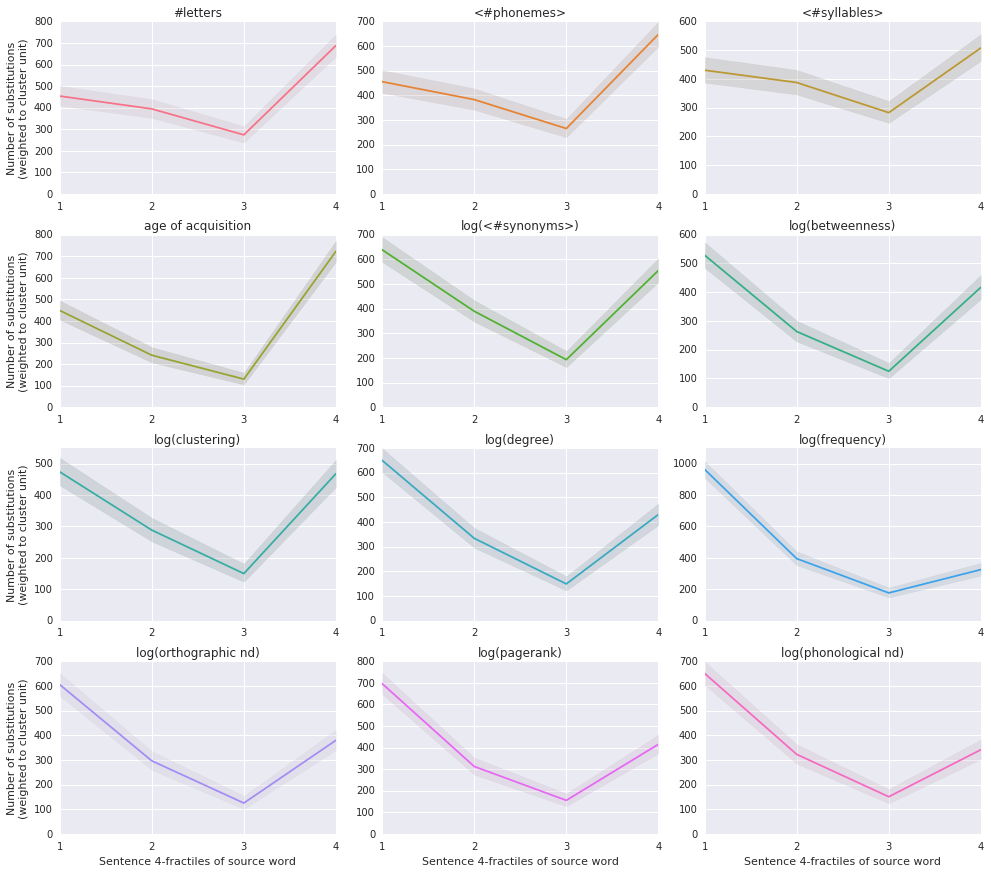

In [20]:
# Now plot.
g = sb.FacetGrid(data=fractiles, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)

**Note on confidence intervals**

Here we're finally in a real multinomial sampling (and it's the only time). So we're going to use multinomial CIs.

### 5.2 Feature susceptibilities, reduced to features we expose in the paper

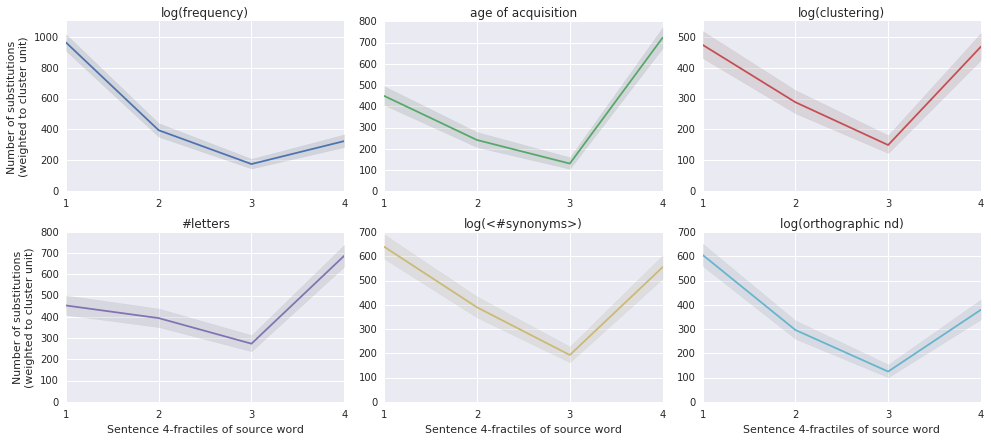

In [21]:
# Now plot.
g = sb.FacetGrid(data=fractiles[fractiles['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_fractile_distribution)
g.set_titles('{col_name}')
g.set_xlabels('Sentence {}-fractiles of source word'.format(BIN_COUNT))
g.set_ylabels('Number of substitutions\n(weighted to cluster unit)')
for ax in g.axes.ravel():
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-fractile_susceptibilities-relative'),
                  bbox_inches='tight', dpi=300)